In [36]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/mcoving/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [112]:
#import pixiedust
int(ceil(n/2))

25

In [115]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=50
x = linspace(0,5000,n)
z = linspace(1,2,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.05, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.05,
            dt_erode=1.,
            xc_n=1500)
ntimes = 500
fd_old=0.
for t in arange(ntimes):
    print('t=',t)
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    #if t>0 and np.abs(fd_new-fd_old)>0.05:
    #    print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.005
    #if t==160:
    #    print(asdf)
    if t % 10 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[int(ceil(n/2))].x ,sim.xcs[int(ceil(n/2))].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(xmid,sim.slopes)
        plot(xmid, abs(sim.dz))
        yscale('log')
        tight_layout()
        savefig('./Slope-'+timestep_str+'.png')
        #figure()
        #loglog(sim.slopes, abs(sim.dz), 'o')
        #ylabel('dz')
        #xlabel('slope')
        #tight_layout()
        #savefig('./Slope_vs_erosion-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
Q residual for 0.2342000087988715  = 1.4273090753746942e-07
norm_fd= 0.2342000087988715   maxdepth= 0.9999994516877171
dwnscrit
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
Q residual for 0.2342000087988715  = 1.4273090753746942e-07
norm_fd= 0.2342000087988715   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
Q residual for 0.23420000879887154  = 1.4273090753053053e-07
norm_fd= 0.23420000

Q residual for 0.23420000879886912  = 1.4273090753053053e-07
norm_fd= 0.23420000879886912   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 27
Q residual for 0.23420000879887365  = 1.4273090753746942e-07
norm_fd= 0.23420000879887365   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 28
Q residual for 0.23420000879886912  = 1.4273090753053053e-07
norm_fd= 0.23420000879886912   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.99999945

CFL= 0.06543080733226671
Plotting timestep:  0
t= 1
xc points= 233  maxdpeth= 1.0046516595769552   max_interp= 0.06240479336851939
xc points= 233  maxdpeth= 1.0046516595769552   max_interp= 0.06240479336851939
xc= 0
Q residual for 0.054911580782089124  = 0.03008164406597109
norm_fd= 0.054911580782089124   maxdepth= 1.0046516595769552
norm
getting width
got L,R
setting fd
done with this xc
xc points= 545  maxdpeth= 1.001333326395858   max_interp= 0.2927500109985894
xc points= 545  maxdpeth= 1.001333326395858   max_interp= 0.2927500109985894
xc= 1
Q residual for 0.20192328608169316  = 2.0131330737138686e-07
norm_fd= 0.20192328608169316   maxdepth= 1.001333326395858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 545  maxdpeth= 1.0013418593211152   max_interp= 0.29275001099858944
xc points= 545  maxdpeth= 1.0013418593211152   max_interp= 0.29275001099858944
xc= 2
Q residual for 0.2329950533966946  = 6.580743489026375e-08
norm_fd= 0.2329950533966946   maxdepth= 1.0013418

CFL= 0.06311727212588016
t= 2
xc points= 243  maxdpeth= 1.0064172852592068   max_interp= 0.0686394759776114
xc points= 243  maxdpeth= 1.0064172852592068   max_interp= 0.0686394759776114
xc= 0
Q residual for 0.06039627809035802  = 0.027294749895962943
norm_fd= 0.06039627809035802   maxdepth= 1.0064172852592068
norm
getting width
got L,R
setting fd
done with this xc
xc points= 501  maxdpeth= 1.0028308738689837   max_interp= 0.25240410760211646
xc points= 501  maxdpeth= 1.0028308738689837   max_interp= 0.25240410760211646
xc= 1
Q residual for 0.1989358808955809  = 1.8756296502053793e-08
norm_fd= 0.1989358808955809   maxdepth= 1.0028308738689837
norm
getting width
got L,R
setting fd
done with this xc
xc points= 543  maxdpeth= 1.002690567753093   max_interp= 0.29124381674586824
xc points= 543  maxdpeth= 1.002690567753093   max_interp= 0.29124381674586824
xc= 2
Q residual for 0.22917520613088696  = 1.9140062039457728e-07
norm_fd= 0.22917520613088696   maxdepth= 1.002690567753093
norm
getting

xc= 28
Q residual for 0.23078373892124276  = 4.1545198337100686e-08
norm_fd= 0.23078373892124276   maxdepth= 1.0032616455715777
norm
getting width
got L,R
setting fd
done with this xc
xc points= 542  maxdpeth= 1.0032915802002433   max_interp= 0.2908160744866709
xc points= 542  maxdpeth= 1.0032915802002433   max_interp= 0.2908160744866709
xc= 29
Q residual for 0.23073081483378746  = 1.4994361153403135e-07
norm_fd= 0.23073081483378746   maxdepth= 1.0032915802002433
norm
getting width
got L,R
setting fd
done with this xc
xc points= 542  maxdpeth= 1.003322503894374   max_interp= 0.2907948142413002
xc points= 542  maxdpeth= 1.003322503894374   max_interp= 0.2907948142413002
xc= 30
Q residual for 0.23068058995363194  = 2.0032659871216385e-07
norm_fd= 0.23068058995363194   maxdepth= 1.003322503894374
norm
getting width
got L,R
setting fd
done with this xc
xc points= 542  maxdpeth= 1.0033544797997407   max_interp= 0.2907718574366241
xc points= 542  maxdpeth= 1.0033544797997407   max_interp= 0.

xc= 27
Q residual for 0.22867249532411665  = 8.045548061108576e-09
norm_fd= 0.22867249532411665   maxdepth= 1.004860604862372
norm
getting width
got L,R
setting fd
done with this xc
xc points= 539  maxdpeth= 1.0049041768706948   max_interp= 0.28847967365155347
xc points= 539  maxdpeth= 1.0049041768706948   max_interp= 0.28847967365155347
xc= 28
Q residual for 0.22857261971851398  = 1.185908630393917e-07
norm_fd= 0.22857261971851398   maxdepth= 1.0049041768706948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 539  maxdpeth= 1.0049487046492498   max_interp= 0.28841351854223435
xc points= 539  maxdpeth= 1.0049487046492498   max_interp= 0.28841351854223435
xc= 29
Q residual for 0.22845801403578428  = 6.324623821885034e-08
norm_fd= 0.22845801403578428   maxdepth= 1.0049487046492498
norm
getting width
got L,R
setting fd
done with this xc
xc points= 539  maxdpeth= 1.0049951149052485   max_interp= 0.28835073744203993
xc points= 539  maxdpeth= 1.0049951149052485   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 535  maxdpeth= 1.0066123091668668   max_interp= 0.28557251754473034
xc points= 535  maxdpeth= 1.0066123091668668   max_interp= 0.28557251754473034
xc= 29
Q residual for 0.22586741618298986  = 2.5774674016626475e-07
norm_fd= 0.22586741618298986   maxdepth= 1.0066123091668668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 535  maxdpeth= 1.0066742468982244   max_interp= 0.28544450383743714
xc points= 535  maxdpeth= 1.0066742468982244   max_interp= 0.28544450383743714
xc= 30
Q residual for 0.226688702464746  = 1.6225420774312882e-07
norm_fd= 0.226688702464746   maxdepth= 1.0066742468982244
norm
getting width
got L,R
setting fd
done with this xc
xc points= 535  maxdpeth= 1.0067383061256217   max_interp= 0.28534075418956334
xc points= 535  maxdpeth= 1.0067383061256217   max_interp= 0.28534075418956334
xc= 31
Q residual for 0.22652751926103296  = 2.831031560568409e-08
norm_fd= 0.22652751926103296   maxdepth

norm
getting width
got L,R
setting fd
done with this xc
xc points= 531  maxdpeth= 1.0082111275219887   max_interp= 0.28259174180189117
xc points= 531  maxdpeth= 1.0082111275219887   max_interp= 0.28259174180189117
xc= 28
Q residual for 0.225192002322173  = 1.7156467680551346e-07
norm_fd= 0.225192002322173   maxdepth= 1.0082111275219887
norm
getting width
got L,R
setting fd
done with this xc
xc points= 531  maxdpeth= 1.0082856851625799   max_interp= 0.2823342702287373
xc points= 531  maxdpeth= 1.0082856851625799   max_interp= 0.2823342702287373
xc= 29
Q residual for 0.22491650593605936  = 1.1510776793538513e-07
norm_fd= 0.22491650593605936   maxdepth= 1.0082856851625799
norm
getting width
got L,R
setting fd
done with this xc
xc points= 532  maxdpeth= 1.008359597066666   max_interp= 0.2833608780809325
xc points= 532  maxdpeth= 1.008359597066666   max_interp= 0.2833608780809325
xc= 30
Q residual for 0.22462799879249185  = 5.9423692980176135e-08
norm_fd= 0.22462799879249185   maxdepth= 1.0

norm
getting width
got L,R
setting fd
done with this xc
xc points= 529  maxdpeth= 1.0098716782150343   max_interp= 0.28149000290271625
xc points= 529  maxdpeth= 1.0098716782150343   max_interp= 0.28149000290271625
xc= 28
Q residual for 0.2230018726738377  = 1.1063621212920038e-07
norm_fd= 0.2230018726738377   maxdepth= 1.0098716782150343
norm
getting width
got L,R
setting fd
done with this xc
xc points= 529  maxdpeth= 1.0099613567923607   max_interp= 0.2811456324200742
xc points= 529  maxdpeth= 1.0099613567923607   max_interp= 0.2811456324200742
xc= 29
Q residual for 0.2226232468529714  = 1.0039542349543629e-07
norm_fd= 0.2226232468529714   maxdepth= 1.0099613567923607
norm
getting width
got L,R
setting fd
done with this xc
xc points= 529  maxdpeth= 1.0100550325910427   max_interp= 0.2807849984906148
xc points= 529  maxdpeth= 1.0100550325910427   max_interp= 0.2807849984906148
xc= 30
Q residual for 0.22325106161108965  = 6.587325499657348e-08
norm_fd= 0.22325106161108965   maxdepth= 1.

xc= 28
Q residual for 0.22153289043017288  = 2.194950143169505e-08
norm_fd= 0.22153289043017288   maxdepth= 1.011542053204562
norm
getting width
got L,R
setting fd
done with this xc
xc points= 525  maxdpeth= 1.011646408494159   max_interp= 0.27827905856621427
xc points= 525  maxdpeth= 1.011646408494159   max_interp= 0.27827905856621427
xc= 29
Q residual for 0.22101787242142285  = 1.977468686020778e-08
norm_fd= 0.22101787242142285   maxdepth= 1.011646408494159
norm
getting width
got L,R
setting fd
done with this xc
xc points= 526  maxdpeth= 1.0117565345514272   max_interp= 0.27906382701386206
xc points= 526  maxdpeth= 1.0117565345514272   max_interp= 0.27906382701386206
xc= 30
Q residual for 0.22058051271983622  = 1.078441500060312e-07
norm_fd= 0.22058051271983622   maxdepth= 1.0117565345514272
norm
getting width
got L,R
setting fd
done with this xc
xc points= 525  maxdpeth= 1.0118689306452024   max_interp= 0.2786557048823832
xc points= 525  maxdpeth= 1.0118689306452024   max_interp= 0.

xc points= 523  maxdpeth= 1.0132188259897534   max_interp= 0.2769161130377161
xc points= 523  maxdpeth= 1.0132188259897534   max_interp= 0.2769161130377161
xc= 28
Q residual for 0.2198305108314685  = 1.508285601345416e-07
norm_fd= 0.2198305108314685   maxdepth= 1.0132188259897534
norm
getting width
got L,R
setting fd
done with this xc
xc points= 522  maxdpeth= 1.01333797216859   max_interp= 0.27627234052677857
xc points= 522  maxdpeth= 1.01333797216859   max_interp= 0.27627234052677857
xc= 29
Q residual for 0.21916493717345736  = 1.897400149011852e-07
norm_fd= 0.21916493717345736   maxdepth= 1.01333797216859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 521  maxdpeth= 1.0134639605922713   max_interp= 0.2757256408997953
xc points= 521  maxdpeth= 1.0134639605922713   max_interp= 0.2757256408997953
xc= 30
Q residual for 0.2186235089046477  = 6.854638676806468e-08
norm_fd= 0.2186235089046477   maxdepth= 1.0134639605922713
norm
getting width
got L,R
setting fd
done with

norm
getting width
got L,R
setting fd
done with this xc
xc points= 519  maxdpeth= 1.0150361056186812   max_interp= 0.2739561714668217
xc points= 519  maxdpeth= 1.0150361056186812   max_interp= 0.2739561714668217
xc= 29
Q residual for 0.21706135276338204  = 1.8973922703835466e-08
norm_fd= 0.21706135276338204   maxdepth= 1.0150361056186812
norm
getting width
got L,R
setting fd
done with this xc
xc points= 518  maxdpeth= 1.015181536438742   max_interp= 0.27327938613080965
xc points= 518  maxdpeth= 1.015181536438742   max_interp= 0.27327938613080965
xc= 30
Q residual for 0.21744819837914525  = 3.617622063023518e-09
norm_fd= 0.21744819837914525   maxdepth= 1.015181536438742
norm
getting width
got L,R
setting fd
done with this xc
xc points= 519  maxdpeth= 1.0153226448632664   max_interp= 0.27374731675650893
xc points= 519  maxdpeth= 1.0153226448632664   max_interp= 0.27374731675650893
xc= 31
Q residual for 0.21750027049220258  = 2.421095558757802e-08
norm_fd= 0.21750027049220258   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 516  maxdpeth= 1.01659144667713   max_interp= 0.2723481958445502
xc points= 516  maxdpeth= 1.01659144667713   max_interp= 0.2723481958445502
xc= 28
Q residual for 0.21568860065293505  = 3.1001034123817606e-07
norm_fd= 0.21568860065293505   maxdepth= 1.01659144667713
norm
getting width
got L,R
setting fd
done with this xc
xc points= 515  maxdpeth= 1.0167444327202642   max_interp= 0.27132669095422757
xc points= 515  maxdpeth= 1.0167444327202642   max_interp= 0.27132669095422757
xc= 29
Q residual for 0.21573309152605635  = 1.7005688666277274e-07
norm_fd= 0.21573309152605635   maxdepth= 1.0167444327202642
norm
getting width
got L,R
setting fd
done with this xc
xc points= 516  maxdpeth= 1.0169010786152863   max_interp= 0.27181024797393155
xc points= 516  maxdpeth= 1.0169010786152863   max_interp= 0.27181024797393155
xc= 30
Q residual for 0.21586042810897538  = 2.3316268617235014e-08
norm_fd= 0.21586042810897538   maxdepth= 1

xc= 20
Q residual for 0.2150132728881151  = 1.0221386223530082e-08
norm_fd= 0.2150132728881151   maxdepth= 1.0171066099597175
norm
getting width
got L,R
setting fd
done with this xc
xc points= 515  maxdpeth= 1.0172382249036351   max_interp= 0.270971647301981
xc points= 515  maxdpeth= 1.0172382249036351   max_interp= 0.270971647301981
xc= 21
Q residual for 0.2154787491532671  = 1.086831808647104e-07
norm_fd= 0.2154787491532671   maxdepth= 1.0172382249036351
norm
getting width
got L,R
setting fd
done with this xc
xc points= 514  maxdpeth= 1.0173817368283407   max_interp= 0.2706801015868231
xc points= 514  maxdpeth= 1.0173817368283407   max_interp= 0.2706801015868231
xc= 22
Q residual for 0.2151702146860229  = 1.537199615167517e-07
norm_fd= 0.2151702146860229   maxdepth= 1.0173817368283407
norm
getting width
got L,R
setting fd
done with this xc
xc points= 515  maxdpeth= 1.0175239656304287   max_interp= 0.27129935894039314
xc points= 515  maxdpeth= 1.0175239656304287   max_interp= 0.271299

norm
getting width
got L,R
setting fd
done with this xc
xc points= 507  maxdpeth= 1.0225102657193605   max_interp= 0.26647228984859955
xc points= 507  maxdpeth= 1.0225102657193605   max_interp= 0.26647228984859955
xc= 46
Q residual for 0.2115668814646426  = 1.7640431482224272e-07
norm_fd= 0.2115668814646426   maxdepth= 1.0225102657193605
norm
getting width
got L,R
setting fd
done with this xc
xc points= 507  maxdpeth= 1.022852403059518   max_interp= 0.26625240346941265
xc points= 507  maxdpeth= 1.022852403059518   max_interp= 0.26625240346941265
xc= 47
Q residual for 0.21115036897913608  = 1.8621865994356002e-07
norm_fd= 0.21115036897913608   maxdepth= 1.022852403059518
norm
getting width
got L,R
setting fd
done with this xc
xc points= 506  maxdpeth= 1.0232024190309927   max_interp= 0.26550522679565175
xc points= 506  maxdpeth= 1.0232024190309927   max_interp= 0.26550522679565175
xc= 48
Q residual for 0.21108237230464283  = 1.1310089625959918e-07
norm_fd= 0.21108237230464283   maxdepth

norm
getting width
got L,R
setting fd
done with this xc
xc points= 506  maxdpeth= 1.0232695296747862   max_interp= 0.2655926310876146
xc points= 506  maxdpeth= 1.0232695296747862   max_interp= 0.2655926310876146
xc= 42
Q residual for 0.2105947341034094  = 4.1865546474006976e-08
norm_fd= 0.2105947341034094   maxdepth= 1.0232695296747862
norm
getting width
got L,R
setting fd
done with this xc
xc points= 505  maxdpeth= 1.0235804277115557   max_interp= 0.26503614038355794
xc points= 505  maxdpeth= 1.0235804277115557   max_interp= 0.26503614038355794
xc= 43
Q residual for 0.2098670335585018  = 3.4207784736783875e-08
norm_fd= 0.2098670335585018   maxdepth= 1.0235804277115557
norm
getting width
got L,R
setting fd
done with this xc
xc points= 505  maxdpeth= 1.0239103655080342   max_interp= 0.26486080797799705
xc points= 505  maxdpeth= 1.0239103655080342   max_interp= 0.26486080797799705
xc= 44
Q residual for 0.21045427497134256  = 2.454560788164861e-07
norm_fd= 0.21045427497134256   maxdepth= 

Q residual for 0.20944935232130146  = 3.869052202232215e-08
norm_fd= 0.20944935232130146   maxdepth= 1.0243247116572116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 503  maxdpeth= 1.024626986547669   max_interp= 0.2633570044411705
xc points= 503  maxdpeth= 1.024626986547669   max_interp= 0.2633570044411705
xc= 40
Q residual for 0.20902745106238907  = 2.3354527792923685e-07
norm_fd= 0.20902745106238907   maxdepth= 1.024626986547669
norm
getting width
got L,R
setting fd
done with this xc
xc points= 502  maxdpeth= 1.0249343611655597   max_interp= 0.2630348496589994
xc points= 502  maxdpeth= 1.0249343611655597   max_interp= 0.2630348496589994
xc= 41
Q residual for 0.20841463877790403  = 2.3961279412010317e-08
norm_fd= 0.20841463877790403   maxdepth= 1.0249343611655597
norm
getting width
got L,R
setting fd
done with this xc
xc points= 502  maxdpeth= 1.0252572680528895   max_interp= 0.26324341762926173
xc points= 502  maxdpeth= 1.0252572680528895   max_interp= 0.2632434

Q residual for 0.20758039920646923  = 7.197158284621974e-08
norm_fd= 0.20758039920646923   maxdepth= 1.0256491863633985
norm
getting width
got L,R
setting fd
done with this xc
xc points= 500  maxdpeth= 1.0259454365373863   max_interp= 0.26199131998251474
xc points= 500  maxdpeth= 1.0259454365373863   max_interp= 0.26199131998251474
xc= 38
Q residual for 0.20808898552281255  = 2.2700705960831957e-08
norm_fd= 0.20808898552281255   maxdepth= 1.0259454365373863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 500  maxdpeth= 1.0262488151213462   max_interp= 0.26181169040162683
xc points= 500  maxdpeth= 1.0262488151213462   max_interp= 0.26181169040162683
xc= 39
Q residual for 0.20760769789259018  = 1.07796686237005e-07
norm_fd= 0.20760769789259018   maxdepth= 1.0262488151213462
norm
getting width
got L,R
setting fd
done with this xc
xc points= 499  maxdpeth= 1.0265726549516803   max_interp= 0.26128431382798634
xc points= 499  maxdpeth= 1.0265726549516803   max_interp= 0.26

norm
getting width
got L,R
setting fd
done with this xc
xc points= 499  maxdpeth= 1.0266570031663507   max_interp= 0.26045168697302035
xc points= 499  maxdpeth= 1.0266570031663507   max_interp= 0.26045168697302035
xc= 34
Q residual for 0.2067779322567239  = 2.3964534946741e-08
norm_fd= 0.2067779322567239   maxdepth= 1.0266570031663507
norm
getting width
got L,R
setting fd
done with this xc
xc points= 498  maxdpeth= 1.0269405014781146   max_interp= 0.2599279287121208
xc points= 498  maxdpeth= 1.0269405014781146   max_interp= 0.2599279287121208
xc= 35
Q residual for 0.20695851109340724  = 1.6046366794336686e-07
norm_fd= 0.20695851109340724   maxdepth= 1.0269405014781146
norm
getting width
got L,R
setting fd
done with this xc
xc points= 498  maxdpeth= 1.0272330643905219   max_interp= 0.2604648760528169
xc points= 498  maxdpeth= 1.0272330643905219   max_interp= 0.2604648760528169
xc= 36
Q residual for 0.2061602361619345  = 2.2049413184177524e-08
norm_fd= 0.2061602361619345   maxdepth= 1.02

Q residual for 0.20596433681634943  = 1.2533972737482912e-07
norm_fd= 0.20596433681634943   maxdepth= 1.0273762805225282
norm
getting width
got L,R
setting fd
done with this xc
xc points= 497  maxdpeth= 1.0276358347525716   max_interp= 0.2590405247366343
xc points= 497  maxdpeth= 1.0276358347525716   max_interp= 0.2590405247366343
xc= 31
Q residual for 0.20611268323427268  = 3.9179433204694636e-08
norm_fd= 0.20611268323427268   maxdepth= 1.0276358347525716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 497  maxdpeth= 1.027909963045844   max_interp= 0.25907676446031985
xc points= 497  maxdpeth= 1.027909963045844   max_interp= 0.25907676446031985
xc= 32
Q residual for 0.20595220674220813  = 4.033647253015582e-08
norm_fd= 0.20595220674220813   maxdepth= 1.027909963045844
norm
getting width
got L,R
setting fd
done with this xc
xc points= 496  maxdpeth= 1.028193849569217   max_interp= 0.25867874472906344
xc points= 496  maxdpeth= 1.028193849569217   max_interp= 0.2586787

xc points= 495  maxdpeth= 1.0286106534577022   max_interp= 0.2580110824640374
xc= 28
Q residual for 0.20499817329579326  = 1.7295016752072456e-07
norm_fd= 0.20499817329579326   maxdepth= 1.0286106534577022
norm
getting width
got L,R
setting fd
done with this xc
xc points= 495  maxdpeth= 1.0288732788425876   max_interp= 0.2576875807717076
xc points= 495  maxdpeth= 1.0288732788425876   max_interp= 0.2576875807717076
xc= 29
Q residual for 0.20445513435345494  = 2.6688702595145664e-08
norm_fd= 0.20445513435345494   maxdepth= 1.0288732788425876
norm
getting width
got L,R
setting fd
done with this xc
xc points= 495  maxdpeth= 1.0291443525627448   max_interp= 0.2574554210204368
xc points= 495  maxdpeth= 1.0291443525627448   max_interp= 0.2574554210204368
xc= 30
Q residual for 0.2040034541317267  = 7.956061155028893e-08
norm_fd= 0.2040034541317267   maxdepth= 1.0291443525627448
norm
getting width
got L,R
setting fd
done with this xc
xc points= 495  maxdpeth= 1.0294205865517123   max_interp= 0.

Q residual for 0.20340728360690086  = 2.2416970738015074e-08
norm_fd= 0.20340728360690086   maxdepth= 1.0303537962092735
norm
getting width
got L,R
setting fd
done with this xc
xc points= 492  maxdpeth= 1.030631700192456   max_interp= 0.2555689179418187
xc points= 492  maxdpeth= 1.030631700192456   max_interp= 0.2555689179418187
xc= 29
Q residual for 0.20262466128740317  = 1.0678127033980633e-07
norm_fd= 0.20262466128740317   maxdepth= 1.030631700192456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 491  maxdpeth= 1.0309229445122878   max_interp= 0.25500431766465836
xc points= 491  maxdpeth= 1.0309229445122878   max_interp= 0.25500431766465836
xc= 30
Q residual for 0.20286848819482178  = 3.951213674996401e-08
norm_fd= 0.20286848819482178   maxdepth= 1.0309229445122878
norm
getting width
got L,R
setting fd
done with this xc
xc points= 491  maxdpeth= 1.0312158632039377   max_interp= 0.2548250423175528
xc points= 491  maxdpeth= 1.0312158632039377   max_interp= 0.254825

xc= 27
Q residual for 0.201794268275111  = 4.2233636879385195e-08
norm_fd= 0.201794268275111   maxdepth= 1.0318177691322405
norm
getting width
got L,R
setting fd
done with this xc
xc points= 491  maxdpeth= 1.0321031942608916   max_interp= 0.2542591045086261
xc points= 491  maxdpeth= 1.0321031942608916   max_interp= 0.2542591045086261
xc= 28
Q residual for 0.20171416025784789  = 6.758044214516534e-09
norm_fd= 0.20171416025784789   maxdepth= 1.0321031942608916
norm
getting width
got L,R
setting fd
done with this xc
xc points= 489  maxdpeth= 1.032400703729262   max_interp= 0.25328082660925394
xc points= 489  maxdpeth= 1.032400703729262   max_interp= 0.25328082660925394
xc= 29
Q residual for 0.20162707134457927  = 3.346274404791849e-07
norm_fd= 0.20162707134457927   maxdepth= 1.032400703729262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 489  maxdpeth= 1.032703003066226   max_interp= 0.2535856102435272
xc points= 489  maxdpeth= 1.032703003066226   max_interp= 0.253585

norm
getting width
got L,R
setting fd
done with this xc
xc points= 488  maxdpeth= 1.0338586662273355   max_interp= 0.25214270032230984
xc points= 488  maxdpeth= 1.0338586662273355   max_interp= 0.25214270032230984
xc= 28
Q residual for 0.19994354290795763  = 8.518529612949743e-08
norm_fd= 0.19994354290795763   maxdepth= 1.0338586662273355
norm
getting width
got L,R
setting fd
done with this xc
xc points= 487  maxdpeth= 1.0341710986610626   max_interp= 0.2520338391807241
xc points= 487  maxdpeth= 1.0341710986610626   max_interp= 0.2520338391807241
xc= 29
Q residual for 0.20056131580333406  = 3.3118033759826915e-08
norm_fd= 0.20056131580333406   maxdepth= 1.0341710986610626
norm
getting width
got L,R
setting fd
done with this xc
xc points= 487  maxdpeth= 1.0344895474634235   max_interp= 0.25196642289463494
xc points= 487  maxdpeth= 1.0344895474634235   max_interp= 0.25196642289463494
xc= 30
Q residual for 0.20015538351679044  = 1.8384763704470952e-07
norm_fd= 0.20015538351679044   maxdep

Q residual for 0.20040273440293865  = 1.3336508140199266e-07
norm_fd= 0.20040273440293865   maxdepth= 1.0335780343297816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 487  maxdpeth= 1.0338476498006417   max_interp= 0.25181961337129066
xc points= 487  maxdpeth= 1.0338476498006417   max_interp= 0.25181961337129066
xc= 22
Q residual for 0.20035152301526543  = 6.554418403859064e-08
norm_fd= 0.20035152301526543   maxdepth= 1.0338476498006417
norm
getting width
got L,R
setting fd
done with this xc
xc points= 487  maxdpeth= 1.0341242717180847   max_interp= 0.2522401117801668
xc points= 487  maxdpeth= 1.0341242717180847   max_interp= 0.2522401117801668
xc= 23
Q residual for 0.19943331707392364  = 1.3554940267446192e-08
norm_fd= 0.19943331707392364   maxdepth= 1.0341242717180847
norm
getting width
got L,R
setting fd
done with this xc
xc points= 486  maxdpeth= 1.0344047290405758   max_interp= 0.2510231346942098
xc points= 486  maxdpeth= 1.0344047290405758   max_interp= 0.251

CFL= 0.04667543849512392
t= 22
xc points= 265  maxdpeth= 1.0559417655730914   max_interp= 0.1064770338843795
xc points= 265  maxdpeth= 1.0559417655730914   max_interp= 0.1064770338843795
xc= 0
Q residual for 0.08478657675788714  = 1.8449359195926718e-07
norm_fd= 0.08478657675788714   maxdepth= 1.0559417655730914
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.0392998794258101   max_interp= 0.1519298305379925
xc points= 363  maxdpeth= 1.0392998794258101   max_interp= 0.1519298305379925
xc= 1
Q residual for 0.11819367765362862  = 5.0007087817882656e-08
norm_fd= 0.11819367765362862   maxdepth= 1.0392998794258101
norm
getting width
got L,R
setting fd
done with this xc
xc points= 433  maxdpeth= 1.033357935195934   max_interp= 0.2024190576325407
xc points= 433  maxdpeth= 1.033357935195934   max_interp= 0.2024190576325407
xc= 2
Q residual for 0.158725814281695  = 1.584058690468071e-08
norm_fd= 0.158725814281695   maxdepth= 1.033357935195934
norm
getting wid

Q residual for 0.1980849587205197  = 1.3965776798907648e-09
norm_fd= 0.1980849587205197   maxdepth= 1.0370577063696482
norm
getting width
got L,R
setting fd
done with this xc
xc points= 483  maxdpeth= 1.0373881549418682   max_interp= 0.2487399389491452
xc points= 483  maxdpeth= 1.0373881549418682   max_interp= 0.2487399389491452
xc= 28
Q residual for 0.19707958927018984  = 2.645188010089172e-07
norm_fd= 0.19707958927018984   maxdepth= 1.0373881549418682
norm
getting width
got L,R
setting fd
done with this xc
xc points= 482  maxdpeth= 1.0377351243346444   max_interp= 0.24802556688861496
xc points= 482  maxdpeth= 1.0377351243346444   max_interp= 0.24802556688861496
xc= 29
Q residual for 0.19717558221013606  = 3.956165935820044e-07
norm_fd= 0.19717558221013606   maxdepth= 1.0377351243346444
norm
getting width
got L,R
setting fd
done with this xc
xc points= 482  maxdpeth= 1.0380862431405535   max_interp= 0.24829316963804662
xc points= 482  maxdpeth= 1.0380862431405535   max_interp= 0.24829

xc= 29
Q residual for 0.19587277464871547  = 1.7839929530860665e-07
norm_fd= 0.19587277464871547   maxdepth= 1.0395288788774555
norm
getting width
got L,R
setting fd
done with this xc
xc points= 479  maxdpeth= 1.0398964077947421   max_interp= 0.2462787360190435
xc points= 479  maxdpeth= 1.0398964077947421   max_interp= 0.2462787360190435
xc= 30
Q residual for 0.19631213729646288  = 1.1334890443609469e-07
norm_fd= 0.19631213729646288   maxdepth= 1.0398964077947421
norm
getting width
got L,R
setting fd
done with this xc
xc points= 480  maxdpeth= 1.040280804878488   max_interp= 0.24658536778331558
xc points= 480  maxdpeth= 1.040280804878488   max_interp= 0.24658536778331558
xc= 31
Q residual for 0.195311507521886  = 1.951728403892794e-08
norm_fd= 0.195311507521886   maxdepth= 1.040280804878488
norm
getting width
got L,R
setting fd
done with this xc
xc points= 479  maxdpeth= 1.0406750713033148   max_interp= 0.2455012788086462
xc points= 479  maxdpeth= 1.0406750713033148   max_interp= 0.245

Q residual for 0.1953916797868806  = 1.8833280980568023e-07
norm_fd= 0.1953916797868806   maxdepth= 1.0402332312655593
norm
getting width
got L,R
setting fd
done with this xc
xc points= 479  maxdpeth= 1.0405823142773227   max_interp= 0.24553692556850792
xc points= 479  maxdpeth= 1.0405823142773227   max_interp= 0.24553692556850792
xc= 27
Q residual for 0.19474823587226303  = 1.167784461908461e-07
norm_fd= 0.19474823587226303   maxdepth= 1.0405823142773227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 478  maxdpeth= 1.040946640760923   max_interp= 0.24506999339024158
xc points= 478  maxdpeth= 1.040946640760923   max_interp= 0.24506999339024158
xc= 28
Q residual for 0.1950113062840664  = 7.075772777420664e-08
norm_fd= 0.1950113062840664   maxdepth= 1.040946640760923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 477  maxdpeth= 1.0413290469707952   max_interp= 0.24484096831089433
xc points= 477  maxdpeth= 1.0413290469707952   max_interp= 0.24484096

xc= 28
Q residual for 0.19394446281305314  = 6.261967925441647e-08
norm_fd= 0.19394446281305314   maxdepth= 1.042732686773483
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.0431353705288438   max_interp= 0.24325816809166123
xc points= 475  maxdpeth= 1.0431353705288438   max_interp= 0.24325816809166123
xc= 29
Q residual for 0.19335154293753085  = 4.159596576902569e-08
norm_fd= 0.19335154293753085   maxdepth= 1.0431353705288438
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.0435306032889238   max_interp= 0.24311027582777606
xc points= 475  maxdpeth= 1.0435306032889238   max_interp= 0.24311027582777606
xc= 30
Q residual for 0.1926450523335616  = 7.613828505170783e-09
norm_fd= 0.1926450523335616   maxdepth= 1.0435306032889238
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.043951948106939   max_interp= 0.2428321654559834
xc points= 475  maxdpeth= 1.043951948106939   max_interp= 0.2

norm
getting width
got L,R
setting fd
done with this xc
xc points= 476  maxdpeth= 1.0423095452057758   max_interp= 0.2438560980790242
xc points= 476  maxdpeth= 1.0423095452057758   max_interp= 0.2438560980790242
xc= 22
Q residual for 0.19316816225634403  = 2.796453193384951e-07
norm_fd= 0.19316816225634403   maxdepth= 1.0423095452057758
norm
getting width
got L,R
setting fd
done with this xc
xc points= 476  maxdpeth= 1.0426557007244819   max_interp= 0.243721481372435
xc points= 476  maxdpeth= 1.0426557007244819   max_interp= 0.243721481372435
xc= 23
Q residual for 0.19276100797269968  = 1.7442922152499651e-07
norm_fd= 0.19276100797269968   maxdepth= 1.0426557007244819
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.0430146744545201   max_interp= 0.24275685247905435
xc points= 475  maxdpeth= 1.0430146744545201   max_interp= 0.24275685247905435
xc= 24
Q residual for 0.19356175965653094  = 1.4286207236646753e-07
norm_fd= 0.19356175965653094   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 477  maxdpeth= 1.0411509930104887   max_interp= 0.24387842291928866
xc points= 477  maxdpeth= 1.0411509930104887   max_interp= 0.24387842291928866
xc= 13
Q residual for 0.19412415947266626  = 5.9069172268777503e-08
norm_fd= 0.19412415947266626   maxdepth= 1.0411509930104887
norm
getting width
got L,R
setting fd
done with this xc
xc points= 476  maxdpeth= 1.0414426715556129   max_interp= 0.24374343017792577
xc points= 476  maxdpeth= 1.0414426715556129   max_interp= 0.24374343017792577
xc= 14
Q residual for 0.19369616979729873  = 1.8576602645731244e-07
norm_fd= 0.19369616979729873   maxdepth= 1.0414426715556129
norm
getting width
got L,R
setting fd
done with this xc
xc points= 475  maxdpeth= 1.0417403349619672   max_interp= 0.24297015093765112
xc points= 475  maxdpeth= 1.0417403349619672   max_interp= 0.24297015093765112
xc= 15
Q residual for 0.19362084758221665  = 1.9662882660281822e-07
norm_fd= 0.19362084758221665   max

Q residual for 0.1884254570399132  = 1.3392889464114432e-07
norm_fd= 0.1884254570399132   maxdepth= 1.0507120048297331
norm
getting width
got L,R
setting fd
done with this xc
xc points= 467  maxdpeth= 1.051293294548336   max_interp= 0.23783977401751072
xc points= 467  maxdpeth= 1.051293294548336   max_interp= 0.23783977401751072
xc= 38
Q residual for 0.18813900361495897  = 1.1742068910941539e-07
norm_fd= 0.18813900361495897   maxdepth= 1.051293294548336
norm
getting width
got L,R
setting fd
done with this xc
xc points= 466  maxdpeth= 1.0519125516680274   max_interp= 0.23691075560548833
xc points= 466  maxdpeth= 1.0519125516680274   max_interp= 0.23691075560548833
xc= 39
Q residual for 0.18891659764434582  = 6.23484639958316e-08
norm_fd= 0.18891659764434582   maxdepth= 1.0519125516680274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 465  maxdpeth= 1.0525371440093978   max_interp= 0.2367520953626652
xc points= 465  maxdpeth= 1.0525371440093978   max_interp= 0.2367520

Q residual for 0.1885140533977745  = 7.011606155404859e-08
norm_fd= 0.1885140533977745   maxdepth= 1.0515570383354698
norm
getting width
got L,R
setting fd
done with this xc
xc points= 465  maxdpeth= 1.0521145006434995   max_interp= 0.23655929843926074
xc points= 465  maxdpeth= 1.0521145006434995   max_interp= 0.23655929843926074
xc= 36
Q residual for 0.18783115679885545  = 1.5640069681022162e-07
norm_fd= 0.18783115679885545   maxdepth= 1.0521145006434995
norm
getting width
got L,R
setting fd
done with this xc
xc points= 464  maxdpeth= 1.052690437469964   max_interp= 0.2355318212998915
xc points= 464  maxdpeth= 1.052690437469964   max_interp= 0.2355318212998915
xc= 37
Q residual for 0.18748637539934504  = 1.973648072681189e-07
norm_fd= 0.18748637539934504   maxdepth= 1.052690437469964
norm
getting width
got L,R
setting fd
done with this xc
xc points= 463  maxdpeth= 1.0532923425919765   max_interp= 0.2351737545186987
xc points= 463  maxdpeth= 1.0532923425919765   max_interp= 0.235173754

Q residual for 0.18682856298138578  = 1.613486779114548e-07
norm_fd= 0.18682856298138578   maxdepth= 1.0529386746987703
norm
getting width
got L,R
setting fd
done with this xc
xc points= 464  maxdpeth= 1.0534973705223503   max_interp= 0.23564256674721812
xc points= 464  maxdpeth= 1.0534973705223503   max_interp= 0.23564256674721812
xc= 35
Q residual for 0.18657870241721425  = 4.4525537333528487e-08
norm_fd= 0.18657870241721425   maxdepth= 1.0534973705223503
norm
getting width
got L,R
setting fd
done with this xc
xc points= 463  maxdpeth= 1.0540737573543808   max_interp= 0.2347889459985693
xc points= 463  maxdpeth= 1.0540737573543808   max_interp= 0.2347889459985693
xc= 36
Q residual for 0.18637022863710997  = 3.45033013965379e-09
norm_fd= 0.18637022863710997   maxdepth= 1.0540737573543808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 462  maxdpeth= 1.0546693351737972   max_interp= 0.23435796924918129
xc points= 462  maxdpeth= 1.0546693351737972   max_interp= 0.2343

xc= 33
Q residual for 0.1858817412212602  = 1.8995295086865482e-08
norm_fd= 0.1858817412212602   maxdepth= 1.0542948390069746
norm
getting width
got L,R
setting fd
done with this xc
xc points= 461  maxdpeth= 1.0548655397288116   max_interp= 0.2335357037267322
xc points= 461  maxdpeth= 1.0548655397288116   max_interp= 0.2335357037267322
xc= 34
Q residual for 0.18634374517499544  = 1.468812311014589e-07
norm_fd= 0.18634374517499544   maxdepth= 1.0548655397288116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 460  maxdpeth= 1.0554430590819996   max_interp= 0.23322337802151782
xc points= 460  maxdpeth= 1.0554430590819996   max_interp= 0.23322337802151782
xc= 35
Q residual for 0.1855762246327883  = 3.185630987473376e-08
norm_fd= 0.1855762246327883   maxdepth= 1.0554430590819996
norm
getting width
got L,R
setting fd
done with this xc
xc points= 460  maxdpeth= 1.0560390660706402   max_interp= 0.23296278579638746
xc points= 460  maxdpeth= 1.0560390660706402   max_interp= 0.

xc= 23
Q residual for 0.18734610427361809  = 1.7471909912608607e-07
norm_fd= 0.18734610427361809   maxdepth= 1.0513437763599809
norm
getting width
got L,R
setting fd
done with this xc
xc points= 464  maxdpeth= 1.0517653689405002   max_interp= 0.23569323404477652
xc points= 464  maxdpeth= 1.0517653689405002   max_interp= 0.23569323404477652
xc= 24
Q residual for 0.18719958868920272  = 1.680432535344778e-07
norm_fd= 0.18719958868920272   maxdepth= 1.0517653689405002
norm
getting width
got L,R
setting fd
done with this xc
xc points= 464  maxdpeth= 1.0522037131649222   max_interp= 0.23555053527026265
xc points= 464  maxdpeth= 1.0522037131649222   max_interp= 0.23555053527026265
xc= 25
Q residual for 0.18676680989821592  = 1.0590046566755218e-07
norm_fd= 0.18676680989821592   maxdepth= 1.0522037131649222
norm
getting width
got L,R
setting fd
done with this xc
xc points= 463  maxdpeth= 1.0526587823659783   max_interp= 0.23500112614820934
xc points= 463  maxdpeth= 1.0526587823659783   max_int

CFL= 0.039886991351628064
t= 32
xc points= 225  maxdpeth= 1.0889451181412382   max_interp= 0.1024897531663583
xc points= 225  maxdpeth= 1.0889451181412382   max_interp= 0.1024897531663583
xc= 0
Q residual for 0.08231067188981397  = 6.757753829161883e-07
norm_fd= 0.08231067188981397   maxdepth= 1.0889451181412382
norm
getting width
got L,R
setting fd
done with this xc
xc points= 307  maxdpeth= 1.0638196540780127   max_interp= 0.12465557354157998
xc points= 307  maxdpeth= 1.0638196540780127   max_interp= 0.12465557354157998
xc= 1
Q residual for 0.09921893752029527  = 1.9710846156650863e-08
norm_fd= 0.09921893752029527   maxdepth= 1.0638196540780127
norm
getting width
got L,R
setting fd
done with this xc
xc points= 376  maxdpeth= 1.052621646282033   max_interp= 0.16347583917931102
xc points= 376  maxdpeth= 1.052621646282033   max_interp= 0.16347583917931102
xc= 2
Q residual for 0.12844401299532057  = 2.834266151496845e-07
norm_fd= 0.12844401299532057   maxdepth= 1.052621646282033
norm
get

norm
getting width
got L,R
setting fd
done with this xc
xc points= 459  maxdpeth= 1.0559381535422987   max_interp= 0.23233348979224908
xc points= 459  maxdpeth= 1.0559381535422987   max_interp= 0.23233348979224908
xc= 29
Q residual for 0.1847839250797103  = 1.3609229069372342e-07
norm_fd= 0.1847839250797103   maxdepth= 1.0559381535422987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 458  maxdpeth= 1.056455344901177   max_interp= 0.23161121118034783
xc points= 458  maxdpeth= 1.056455344901177   max_interp= 0.23161121118034783
xc= 30
Q residual for 0.18448230089563705  = 1.8793091352553581e-07
norm_fd= 0.18448230089563705   maxdepth= 1.056455344901177
norm
getting width
got L,R
setting fd
done with this xc
xc points= 459  maxdpeth= 1.0569999947225555   max_interp= 0.2323445602764299
xc points= 459  maxdpeth= 1.0569999947225555   max_interp= 0.2323445602764299
xc= 31
Q residual for 0.18474322216360964  = 1.7627872321568372e-07
norm_fd= 0.18474322216360964   maxdepth= 

xc= 27
Q residual for 0.18401134265561042  = 6.7887698448898526e-09
norm_fd= 0.18401134265561042   maxdepth= 1.0567464391223094
norm
getting width
got L,R
setting fd
done with this xc
xc points= 458  maxdpeth= 1.057250498119732   max_interp= 0.23127103674637078
xc points= 458  maxdpeth= 1.057250498119732   max_interp= 0.23127103674637078
xc= 28
Q residual for 0.18416531466178548  = 1.3517650322703023e-07
norm_fd= 0.18416531466178548   maxdepth= 1.057250498119732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 457  maxdpeth= 1.0577922924001046   max_interp= 0.2309799063496379
xc points= 457  maxdpeth= 1.0577922924001046   max_interp= 0.2309799063496379
xc= 29
Q residual for 0.18378934345972972  = 1.9167724486096605e-07
norm_fd= 0.18378934345972972   maxdepth= 1.0577922924001046
norm
getting width
got L,R
setting fd
done with this xc
xc points= 457  maxdpeth= 1.0583265646348714   max_interp= 0.23060287611954633
xc points= 457  maxdpeth= 1.0583265646348714   max_interp=

xc= 28
Q residual for 0.18249785642719843  = 2.3212781927878234e-07
norm_fd= 0.18249785642719843   maxdepth= 1.0590914385410395
norm
getting width
got L,R
setting fd
done with this xc
xc points= 455  maxdpeth= 1.0596474760500247   max_interp= 0.22973667932466216
xc points= 455  maxdpeth= 1.0596474760500247   max_interp= 0.22973667932466216
xc= 29
Q residual for 0.18278126492530686  = 4.256892759540998e-07
norm_fd= 0.18278126492530686   maxdepth= 1.0596474760500247
norm
getting width
got L,R
setting fd
done with this xc
xc points= 455  maxdpeth= 1.0601993315613032   max_interp= 0.22960582497952534
xc points= 455  maxdpeth= 1.0601993315613032   max_interp= 0.22960582497952534
xc= 30
Q residual for 0.18206026469806683  = 2.4981691215675284e-08
norm_fd= 0.18206026469806683   maxdepth= 1.0601993315613032
norm
getting width
got L,R
setting fd
done with this xc
xc points= 453  maxdpeth= 1.0607816725132466   max_interp= 0.22848952596188257
xc points= 453  maxdpeth= 1.0607816725132466   max_int

norm
getting width
got L,R
setting fd
done with this xc
xc points= 453  maxdpeth= 1.0609383562675836   max_interp= 0.22812232053399803
xc points= 453  maxdpeth= 1.0609383562675836   max_interp= 0.22812232053399803
xc= 28
Q residual for 0.1817807280083615  = 1.6747565766139783e-07
norm_fd= 0.1817807280083615   maxdepth= 1.0609383562675836
norm
getting width
got L,R
setting fd
done with this xc
xc points= 453  maxdpeth= 1.0615085657928427   max_interp= 0.22847658115663358
xc points= 453  maxdpeth= 1.0615085657928427   max_interp= 0.22847658115663358
xc= 29
Q residual for 0.1818595463700395  = 8.977928160625037e-08
norm_fd= 0.1818595463700395   maxdepth= 1.0615085657928427
norm
getting width
got L,R
setting fd
done with this xc
xc points= 452  maxdpeth= 1.062082860983427   max_interp= 0.22757533087258353
xc points= 452  maxdpeth= 1.062082860983427   max_interp= 0.22757533087258353
xc= 30
Q residual for 0.18144030511003365  = 5.022956467426454e-09
norm_fd= 0.18144030511003365   maxdepth= 1

xc= 27
Q residual for 0.18059500550894794  = 1.1064411790245865e-07
norm_fd= 0.18059500550894794   maxdepth= 1.0622425053604825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 451  maxdpeth= 1.0627911575882294   max_interp= 0.2272259100104519
xc points= 451  maxdpeth= 1.0627911575882294   max_interp= 0.2272259100104519
xc= 28
Q residual for 0.18031704976085158  = 2.004584064851933e-07
norm_fd= 0.18031704976085158   maxdepth= 1.0627911575882294
norm
getting width
got L,R
setting fd
done with this xc
xc points= 451  maxdpeth= 1.0633758550313521   max_interp= 0.2273244329625494
xc points= 451  maxdpeth= 1.0633758550313521   max_interp= 0.2273244329625494
xc= 29
Q residual for 0.18015630667855256  = 6.034111228736538e-08
norm_fd= 0.18015630667855256   maxdepth= 1.0633758550313521
norm
getting width
got L,R
setting fd
done with this xc
xc points= 451  maxdpeth= 1.0639667069997822   max_interp= 0.22680038138754205
xc points= 451  maxdpeth= 1.0639667069997822   max_interp= 

Q residual for 0.17973952606889243  = 2.4532890191553136e-08
norm_fd= 0.17973952606889243   maxdepth= 1.06408593667412
norm
getting width
got L,R
setting fd
done with this xc
xc points= 449  maxdpeth= 1.064649867559049   max_interp= 0.22539631220106449
xc points= 449  maxdpeth= 1.064649867559049   max_interp= 0.22539631220106449
xc= 28
Q residual for 0.17897494826733645  = 9.383879145952179e-09
norm_fd= 0.17897494826733645   maxdepth= 1.064649867559049
norm
getting width
got L,R
setting fd
done with this xc
xc points= 448  maxdpeth= 1.0652491235482269   max_interp= 0.2251953833481907
xc points= 448  maxdpeth= 1.0652491235482269   max_interp= 0.2251953833481907
xc= 29
Q residual for 0.17948633187392246  = 1.0185251161226594e-07
norm_fd= 0.17948633187392246   maxdepth= 1.0652491235482269
norm
getting width
got L,R
setting fd
done with this xc
xc points= 448  maxdpeth= 1.0658613215441752   max_interp= 0.2250639987044686
xc points= 448  maxdpeth= 1.0658613215441752   max_interp= 0.22506399

got L,R
setting fd
done with this xc
xc points= 447  maxdpeth= 1.0659355570980171   max_interp= 0.22467440758611554
xc points= 447  maxdpeth= 1.0659355570980171   max_interp= 0.22467440758611554
xc= 27
Q residual for 0.17900104066072556  = 1.1290494451171584e-07
norm_fd= 0.17900104066072556   maxdepth= 1.0659355570980171
norm
getting width
got L,R
setting fd
done with this xc
xc points= 446  maxdpeth= 1.066514352361839   max_interp= 0.22371868533417055
xc points= 446  maxdpeth= 1.066514352361839   max_interp= 0.22371868533417055
xc= 28
Q residual for 0.17858000605800065  = 6.143037824257735e-08
norm_fd= 0.17858000605800065   maxdepth= 1.066514352361839
norm
getting width
got L,R
setting fd
done with this xc
xc points= 446  maxdpeth= 1.0671282445984702   max_interp= 0.22435791484240308
xc points= 446  maxdpeth= 1.0671282445984702   max_interp= 0.22435791484240308
xc= 29
Q residual for 0.17799353059612663  = 1.0578360655488783e-07
norm_fd= 0.17799353059612663   maxdepth= 1.06712824459847

xc points= 445  maxdpeth= 1.0683852038058308   max_interp= 0.2232250075725008
xc= 28
Q residual for 0.17751477959580775  = 2.120128795093934e-07
norm_fd= 0.17751477959580775   maxdepth= 1.0683852038058308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 444  maxdpeth= 1.0690133117515834   max_interp= 0.2224919132451583
xc points= 444  maxdpeth= 1.0690133117515834   max_interp= 0.2224919132451583
xc= 29
Q residual for 0.17745187765237946  = 2.2005505756483856e-07
norm_fd= 0.17745187765237946   maxdepth= 1.0690133117515834
norm
getting width
got L,R
setting fd
done with this xc
xc points= 443  maxdpeth= 1.069668024815324   max_interp= 0.22223339574113177
xc points= 443  maxdpeth= 1.069668024815324   max_interp= 0.22223339574113177
xc= 30
Q residual for 0.17692196215098824  = 2.044120397254323e-08
norm_fd= 0.17692196215098824   maxdepth= 1.069668024815324
norm
getting width
got L,R
setting fd
done with this xc
xc points= 443  maxdpeth= 1.0703310719205372   max_interp= 0.

Q residual for 0.17620491140296723  = 8.249188966635845e-08
norm_fd= 0.17620491140296723   maxdepth= 1.0709039682732815
norm
getting width
got L,R
setting fd
done with this xc
xc points= 441  maxdpeth= 1.071574070712666   max_interp= 0.2211524526887353
xc points= 441  maxdpeth= 1.071574070712666   max_interp= 0.2211524526887353
xc= 30
Q residual for 0.1761865612276582  = 3.9071355067976654e-08
norm_fd= 0.1761865612276582   maxdepth= 1.071574070712666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 442  maxdpeth= 1.072254502720162   max_interp= 0.22139740700171623
xc points= 442  maxdpeth= 1.072254502720162   max_interp= 0.22139740700171623
xc= 31
Q residual for 0.1757563897333637  = 2.248360798026705e-07
norm_fd= 0.1757563897333637   maxdepth= 1.072254502720162
norm
getting width
got L,R
setting fd
done with this xc
xc points= 440  maxdpeth= 1.0729532374746467   max_interp= 0.22000819588036813
xc points= 440  maxdpeth= 1.0729532374746467   max_interp= 0.2200081958803

got L,R
setting fd
done with this xc
xc points= 443  maxdpeth= 1.0691330610238725   max_interp= 0.22214420343138247
xc points= 443  maxdpeth= 1.0691330610238725   max_interp= 0.22214420343138247
xc= 23
Q residual for 0.17655061309207573  = 2.6708780256207154e-07
norm_fd= 0.17655061309207573   maxdepth= 1.0691330610238725
norm
getting width
got L,R
setting fd
done with this xc
xc points= 443  maxdpeth= 1.069700938984378   max_interp= 0.22152800560714891
xc points= 443  maxdpeth= 1.069700938984378   max_interp= 0.22152800560714891
xc= 24
Q residual for 0.17648541177945765  = 1.0030311524411584e-07
norm_fd= 0.17648541177945765   maxdepth= 1.069700938984378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 443  maxdpeth= 1.0702840536212954   max_interp= 0.2216981797657282
xc points= 443  maxdpeth= 1.0702840536212954   max_interp= 0.2216981797657282
xc= 25
Q residual for 0.17615704156170361  = 3.989554517788707e-07
norm_fd= 0.17615704156170361   maxdepth= 1.0702840536212954

CFL= 0.03521500281660454
t= 42
xc points= 194  maxdpeth= 1.1234753847149717   max_interp= 0.0995543288948326
xc points= 194  maxdpeth= 1.1234753847149717   max_interp= 0.0995543288948326
xc= 0
Q residual for 0.08008692023268615  = 8.15418391433842e-07
norm_fd= 0.08008692023268615   maxdepth= 1.1234753847149717
norm
getting width
got L,R
setting fd
done with this xc
xc points= 272  maxdpeth= 1.0912480961929927   max_interp= 0.11631616156971339
xc points= 272  maxdpeth= 1.0912480961929927   max_interp= 0.11631616156971339
xc= 1
Q residual for 0.09199266488715065  = 4.6568163281079933e-07
norm_fd= 0.09199266488715065   maxdepth= 1.0912480961929927
norm
getting width
got L,R
setting fd
done with this xc
xc points= 330  maxdpeth= 1.0749659852089315   max_interp= 0.1401554450250755
xc points= 330  maxdpeth= 1.0749659852089315   max_interp= 0.1401554450250755
xc= 2
Q residual for 0.11017879126356184  = 1.6887628730838378e-07
norm_fd= 0.11017879126356184   maxdepth= 1.0749659852089315
norm
get

Q residual for 0.17417760554238484  = 1.244711134648635e-07
norm_fd= 0.17417760554238484   maxdepth= 1.0747027998440313
norm
getting width
got L,R
setting fd
done with this xc
xc points= 437  maxdpeth= 1.075403696126606   max_interp= 0.21833172636486362
xc points= 437  maxdpeth= 1.075403696126606   max_interp= 0.21833172636486362
xc= 30
Q residual for 0.17417544374685837  = 8.461658805580807e-08
norm_fd= 0.17417544374685837   maxdepth= 1.075403696126606
norm
getting width
got L,R
setting fd
done with this xc
xc points= 437  maxdpeth= 1.0761286026802113   max_interp= 0.21823880785920463
xc points= 437  maxdpeth= 1.0761286026802113   max_interp= 0.21823880785920463
xc= 31
Q residual for 0.17364056231513517  = 2.618388370012603e-08
norm_fd= 0.17364056231513517   maxdepth= 1.0761286026802113
norm
getting width
got L,R
setting fd
done with this xc
xc points= 436  maxdpeth= 1.076860880900978   max_interp= 0.217882377185611
xc points= 436  maxdpeth= 1.076860880900978   max_interp= 0.217882377

xc points= 436  maxdpeth= 1.0766108120565994   max_interp= 0.21772200692798105
xc= 29
Q residual for 0.17342307560757322  = 2.8741771879170486e-09
norm_fd= 0.17342307560757322   maxdepth= 1.0766108120565994
norm
getting width
got L,R
setting fd
done with this xc
xc points= 435  maxdpeth= 1.0773268962286981   max_interp= 0.21771930468357295
xc points= 435  maxdpeth= 1.0773268962286981   max_interp= 0.21771930468357295
xc= 30
Q residual for 0.17296346276168292  = 1.6780784383579883e-07
norm_fd= 0.17296346276168292   maxdepth= 1.0773268962286981
norm
getting width
got L,R
setting fd
done with this xc
xc points= 435  maxdpeth= 1.0780679775840527   max_interp= 0.21705070289391895
xc points= 435  maxdpeth= 1.0780679775840527   max_interp= 0.21705070289391895
xc= 31
Q residual for 0.1728338309792129  = 1.9069785060776834e-07
norm_fd= 0.1728338309792129   maxdepth= 1.0780679775840527
norm
getting width
got L,R
setting fd
done with this xc
xc points= 434  maxdpeth= 1.0788238985495027   max_inte

xc points= 435  maxdpeth= 1.0778129808969439   max_interp= 0.21749642343096257
xc= 28
Q residual for 0.17293428053393983  = 2.3825313005820803e-07
norm_fd= 0.17293428053393983   maxdepth= 1.0778129808969439
norm
getting width
got L,R
setting fd
done with this xc
xc points= 434  maxdpeth= 1.078525069783627   max_interp= 0.21677884450946652
xc points= 434  maxdpeth= 1.078525069783627   max_interp= 0.21677884450946652
xc= 29
Q residual for 0.17291217243468515  = 3.72143225263466e-09
norm_fd= 0.17291217243468515   maxdepth= 1.078525069783627
norm
getting width
got L,R
setting fd
done with this xc
xc points= 433  maxdpeth= 1.0792557046780156   max_interp= 0.21620432845210366
xc points= 433  maxdpeth= 1.0792557046780156   max_interp= 0.21620432845210366
xc= 30
Q residual for 0.1719138015299169  = 3.3086331385767664e-07
norm_fd= 0.1719138015299169   maxdepth= 1.0792557046780156
norm
getting width
got L,R
setting fd
done with this xc
xc points= 433  maxdpeth= 1.0800128653114909   max_interp= 0

xc points= 433  maxdpeth= 1.0783367081632347   max_interp= 0.21599314518625784
xc= 26
Q residual for 0.17209721847433337  = 1.5421416634658902e-07
norm_fd= 0.17209721847433337   maxdepth= 1.0783367081632347
norm
getting width
got L,R
setting fd
done with this xc
xc points= 432  maxdpeth= 1.0790120506651917   max_interp= 0.21550015469685893
xc points= 432  maxdpeth= 1.0790120506651917   max_interp= 0.21550015469685893
xc= 27
Q residual for 0.1719782736807466  = 1.6633557832490542e-07
norm_fd= 0.1719782736807466   maxdepth= 1.0790120506651917
norm
getting width
got L,R
setting fd
done with this xc
xc points= 433  maxdpeth= 1.0797114387780808   max_interp= 0.21616785066742478
xc points= 433  maxdpeth= 1.0797114387780808   max_interp= 0.21616785066742478
xc= 28
Q residual for 0.17212011661983678  = 1.7120881921905973e-07
norm_fd= 0.17212011661983678   maxdepth= 1.0797114387780808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 432  maxdpeth= 1.080438779314733   max_inter

Q residual for 0.17089550142965956  = 2.666439662332709e-07
norm_fd= 0.17089550142965956   maxdepth= 1.0809015741683943
norm
getting width
got L,R
setting fd
done with this xc
xc points= 431  maxdpeth= 1.0816157132966215   max_interp= 0.21515014577479596
xc points= 431  maxdpeth= 1.0816157132966215   max_interp= 0.21515014577479596
xc= 28
Q residual for 0.17059194399696648  = 1.663360540346548e-07
norm_fd= 0.17059194399696648   maxdepth= 1.0816157132966215
norm
getting width
got L,R
setting fd
done with this xc
xc points= 430  maxdpeth= 1.082363090723217   max_interp= 0.21454528587803948
xc points= 430  maxdpeth= 1.082363090723217   max_interp= 0.21454528587803948
xc= 29
Q residual for 0.17060919048274495  = 7.896791663630776e-08
norm_fd= 0.17060919048274495   maxdepth= 1.082363090723217
norm
getting width
got L,R
setting fd
done with this xc
xc points= 429  maxdpeth= 1.083129531937657   max_interp= 0.21387152061160128
xc points= 429  maxdpeth= 1.083129531937657   max_interp= 0.2138715

xc points= 428  maxdpeth= 1.0842929214310486   max_interp= 0.21326148810343118
xc= 29
Q residual for 0.16985237549311072  = 1.3944853701625126e-07
norm_fd= 0.16985237549311072   maxdepth= 1.0842929214310486
norm
getting width
got L,R
setting fd
done with this xc
xc points= 427  maxdpeth= 1.0850752185756662   max_interp= 0.21308491349541298
xc points= 427  maxdpeth= 1.0850752185756662   max_interp= 0.21308491349541298
xc= 30
Q residual for 0.17002924799779606  = 1.2486463783767388e-07
norm_fd= 0.17002924799779606   maxdepth= 1.0850752185756662
norm
getting width
got L,R
setting fd
done with this xc
xc points= 427  maxdpeth= 1.085881516587689   max_interp= 0.21327952507479542
xc points= 427  maxdpeth= 1.085881516587689   max_interp= 0.21327952507479542
xc= 31
Q residual for 0.16963982349692697  = 1.4140407546270328e-07
norm_fd= 0.16963982349692697   maxdepth= 1.085881516587689
norm
getting width
got L,R
setting fd
done with this xc
xc points= 426  maxdpeth= 1.0867106051201114   max_inter

xc= 29
Q residual for 0.1692939280826111  = 3.959759146965336e-08
norm_fd= 0.1692939280826111   maxdepth= 1.0862222524394474
norm
getting width
got L,R
setting fd
done with this xc
xc points= 426  maxdpeth= 1.087020979968381   max_interp= 0.21253655999724508
xc points= 426  maxdpeth= 1.087020979968381   max_interp= 0.21253655999724508
xc= 30
Q residual for 0.168895631295648  = 1.046117542938263e-07
norm_fd= 0.168895631295648   maxdepth= 1.087020979968381
norm
getting width
got L,R
setting fd
done with this xc
xc points= 425  maxdpeth= 1.0878496414354117   max_interp= 0.2120497793711587
xc points= 425  maxdpeth= 1.0878496414354117   max_interp= 0.2120497793711587
xc= 31
Q residual for 0.16897578851821726  = 1.7101045274303672e-08
norm_fd= 0.16897578851821726   maxdepth= 1.0878496414354117
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.0886942944981008   max_interp= 0.2110042350601561
xc points= 423  maxdpeth= 1.0886942944981008   max_interp= 0.211004

Q residual for 0.16818242951962498  = 1.0005946898816731e-07
norm_fd= 0.16818242951962498   maxdepth= 1.0873613889359484
norm
getting width
got L,R
setting fd
done with this xc
xc points= 424  maxdpeth= 1.0881568629531708   max_interp= 0.21161741010326388
xc points= 424  maxdpeth= 1.0881568629531708   max_interp= 0.21161741010326388
xc= 29
Q residual for 0.16810161154904807  = 7.166740238068181e-08
norm_fd= 0.16810161154904807   maxdepth= 1.0881568629531708
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.0889719603197112   max_interp= 0.21111953911956
xc points= 423  maxdpeth= 1.0889719603197112   max_interp= 0.21111953911956
xc= 30
Q residual for 0.16798592931920275  = 4.889067505703393e-08
norm_fd= 0.16798592931920275   maxdepth= 1.0889719603197112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.0898166949349708   max_interp= 0.21121973564777158
xc points= 423  maxdpeth= 1.0898166949349708   max_interp= 0.2112197

norm
getting width
got L,R
setting fd
done with this xc
xc points= 422  maxdpeth= 1.0900969233871112   max_interp= 0.2101270144363101
xc points= 422  maxdpeth= 1.0900969233871112   max_interp= 0.2101270144363101
xc= 29
Q residual for 0.16714554686903862  = 1.2259160551975068e-07
norm_fd= 0.16714554686903862   maxdepth= 1.0900969233871112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 421  maxdpeth= 1.0909281960648234   max_interp= 0.20998241164900344
xc points= 421  maxdpeth= 1.0909281960648234   max_interp= 0.20998241164900344
xc= 30
Q residual for 0.16728879565290844  = 9.965979209936027e-08
norm_fd= 0.16728879565290844   maxdepth= 1.0909281960648234
norm
getting width
got L,R
setting fd
done with this xc
xc points= 421  maxdpeth= 1.0917941862818077   max_interp= 0.20946847697067433
xc points= 421  maxdpeth= 1.0917941862818077   max_interp= 0.20946847697067433
xc= 31
Q residual for 0.16736604164304836  = 1.3921113162923549e-07
norm_fd= 0.16736604164304836   maxdep

norm
getting width
got L,R
setting fd
done with this xc
xc points= 424  maxdpeth= 1.0881496798142165   max_interp= 0.21106149327059076
xc points= 424  maxdpeth= 1.0881496798142165   max_interp= 0.21106149327059076
xc= 24
Q residual for 0.16778949879000424  = 2.745312441265746e-08
norm_fd= 0.16778949879000424   maxdepth= 1.0881496798142165
norm
getting width
got L,R
setting fd
done with this xc
xc points= 423  maxdpeth= 1.0888849072226976   max_interp= 0.21037203561560439
xc points= 423  maxdpeth= 1.0888849072226976   max_interp= 0.21037203561560439
xc= 25
Q residual for 0.16772293260086404  = 2.081251944674456e-07
norm_fd= 0.16772293260086404   maxdepth= 1.0888849072226976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 422  maxdpeth= 1.0896436794342947   max_interp= 0.2097183939074435
xc points= 422  maxdpeth= 1.0896436794342947   max_interp= 0.2097183939074435
xc= 26
Q residual for 0.16771040138199558  = 2.056864795776936e-07
norm_fd= 0.16771040138199558   maxdepth

norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16043745226509076  m^3/s
CFL= 0.0334468572218126
t= 52
xc points= 167  maxdpeth= 1.1602097512398788   max_interp= 0.08988586946637504
xc points= 167  maxdpeth= 1.1602097512398788   max_interp= 0.08988586946637504
xc= 0
Q residual for 0.07036202936566147  = 1.7352223581623694e-08
norm_fd= 0.07036202936566147   maxdepth= 1.1602097512398788
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.120297438638471   max_interp= 0.11257875695296411
xc points= 242  maxdpeth= 1.120297438638471   max_interp= 0.11257875695296411
xc= 1
Q residual for 0.0891994007182106  = 5.002527766334586e-08
norm_fd= 0.0891994007182106   maxdepth= 1.120297438638471
norm
getting width
got L,R
setting fd
done with this xc
xc points= 296  maxdpeth= 1.099565272620702   max_interp= 0.12898906614985178
xc points= 296  maxdpeth= 1.099565272620702   max_interp= 0.12898906614985178
xc= 2
Q residual for 0.10233107733576

Q residual for 0.16137094968959312  = 1.7863005942475585e-08
norm_fd= 0.16137094968959312   maxdepth= 1.116863440496258
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16085642129852026  m^3/s
CFL= 0.03338715027912201
t= 53
xc points= 163  maxdpeth= 1.1640558335398075   max_interp= 0.08795253670707684
xc points= 163  maxdpeth= 1.1640558335398075   max_interp= 0.08795253670707684
xc= 0
Q residual for 0.06964509942958398  = 4.4111891349396526e-07
norm_fd= 0.06964509942958398   maxdepth= 1.1640558335398075
norm
getting width
got L,R
setting fd
done with this xc
xc points= 239  maxdpeth= 1.123273869035386   max_interp= 0.11149925089776325
xc points= 239  maxdpeth= 1.123273869035386   max_interp= 0.11149925089776325
xc= 1
Q residual for 0.08923068748897915  = 1.4695705014694527e-07
norm_fd= 0.08923068748897915   maxdepth= 1.123273869035386
norm
getting width
got L,R
setting fd
done with this xc
xc points= 293  maxdpeth= 1.1021154198847367   max_interp= 0.12791384

norm
getting width
got L,R
setting fd
done with this xc
xc points= 401  maxdpeth= 1.1192466963188894   max_interp= 0.2017136871119914
xc points= 401  maxdpeth= 1.1192466963188894   max_interp= 0.2017136871119914
xc= 48
Q residual for 0.16079283945720851  = 8.331724082183412e-08
norm_fd= 0.16079283945720851   maxdepth= 1.1192466963188894
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.1612959045940767  m^3/s
CFL= 0.03334451110853337
t= 54
xc points= 161  maxdpeth= 1.1679354807788014   max_interp= 0.08705637428697997
xc points= 161  maxdpeth= 1.1679354807788014   max_interp= 0.08705637428697997
xc= 0
Q residual for 0.06884659147795359  = 7.614295487942679e-07
norm_fd= 0.06884659147795359   maxdepth= 1.1679354807788014
norm
getting width
got L,R
setting fd
done with this xc
xc points= 236  maxdpeth= 1.1262632305976896   max_interp= 0.11153835936122394
xc points= 236  maxdpeth= 1.1262632305976896   max_interp= 0.11153835936122394
xc= 1
Q residual for 0.088823099

xc= 48
Q residual for 0.16045552068366326  = 2.7535253785404556e-08
norm_fd= 0.16045552068366326   maxdepth= 1.1216328496542065
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16168623674845592  m^3/s
CFL= 0.03330675014550619
t= 55
xc points= 159  maxdpeth= 1.1718480498240902   max_interp= 0.08605823934744199
xc points= 159  maxdpeth= 1.1718480498240902   max_interp= 0.08605823934744199
xc= 0
Q residual for 0.06801387995513258  = 2.509016127916208e-07
norm_fd= 0.06801387995513258   maxdepth= 1.1718480498240902
norm
getting width
got L,R
setting fd
done with this xc
xc points= 233  maxdpeth= 1.1292759244642536   max_interp= 0.11102887478970244
xc points= 233  maxdpeth= 1.1292759244642536   max_interp= 0.11102887478970244
xc= 1
Q residual for 0.08802226972666112  = 4.879553303291373e-07
norm_fd= 0.08802226972666112   maxdepth= 1.1292759244642536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 287  maxdpeth= 1.1072644335251247   max_interp= 0

got L,R
setting fd
done with this xc
xc points= 398  maxdpeth= 1.124014362220053   max_interp= 0.20056940085457908
xc points= 398  maxdpeth= 1.124014362220053   max_interp= 0.20056940085457908
xc= 48
Q residual for 0.16013987242050554  = 8.52996861269717e-08
norm_fd= 0.16013987242050554   maxdepth= 1.124014362220053
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16210206550308576  m^3/s
CFL= 0.03328281179584675
t= 56
xc points= 157  maxdpeth= 1.1757939995732072   max_interp= 0.08501734994391573
xc points= 157  maxdpeth= 1.1757939995732072   max_interp= 0.08501734994391573
xc= 0
Q residual for 0.06718739454280787  = 2.9027372452916644e-07
norm_fd= 0.06718739454280787   maxdepth= 1.1757939995732072
norm
getting width
got L,R
setting fd
done with this xc
xc points= 229  maxdpeth= 1.132296712584702   max_interp= 0.1100278371583264
xc points= 229  maxdpeth= 1.132296712584702   max_interp= 0.1100278371583264
xc= 1
Q residual for 0.08811229513947053  = 4.670691156

Q residual for 0.15920294684318798  = 1.8721120418480064e-07
norm_fd= 0.15920294684318798   maxdepth= 1.1264004896038255
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16251426401779054  m^3/s
CFL= 0.033264346487656325
t= 57
xc points= 155  maxdpeth= 1.1797728224016653   max_interp= 0.08398424317850983
xc points= 155  maxdpeth= 1.1797728224016653   max_interp= 0.08398424317850983
xc= 0
Q residual for 0.06641578582891829  = 2.7846816808702046e-07
norm_fd= 0.06641578582891829   maxdepth= 1.1797728224016653
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.1353312884813822   max_interp= 0.11014036892433815
xc points= 227  maxdpeth= 1.1353312884813822   max_interp= 0.11014036892433815
xc= 1
Q residual for 0.08782767212715362  = 4.2759765712246933e-07
norm_fd= 0.08782767212715362   maxdepth= 1.1353312884813822
norm
getting width
got L,R
setting fd
done with this xc
xc points= 281  maxdpeth= 1.112452891038193   max_interp= 0.1256

norm
getting width
got L,R
setting fd
done with this xc
xc points= 394  maxdpeth= 1.1287908069333978   max_interp= 0.19900368355398496
xc points= 394  maxdpeth= 1.1287908069333978   max_interp= 0.19900368355398496
xc= 48
Q residual for 0.15850727044440646  = 3.4371597779775387e-07
norm_fd= 0.15850727044440646   maxdepth= 1.1287908069333978
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.1629293964643033  m^3/s
CFL= 0.03325424583313333
t= 58
xc points= 153  maxdpeth= 1.183784395544963   max_interp= 0.08301973228614785
xc points= 153  maxdpeth= 1.183784395544963   max_interp= 0.08301973228614785
xc= 0
Q residual for 0.06569414532063887  = 8.568675249898128e-08
norm_fd= 0.06569414532063887   maxdepth= 1.183784395544963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.1383917718818655   max_interp= 0.10978459015894201
xc points= 225  maxdpeth= 1.1383917718818655   max_interp= 0.10978459015894201
xc= 1
Q residual for 0.087215742

Q residual for 0.15811304669991527  = 8.600042129824903e-08
norm_fd= 0.15811304669991527   maxdepth= 1.1311837182245539
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16334704661318522  m^3/s
CFL= 0.033249456403007416
t= 59
xc points= 151  maxdpeth= 1.1878282555786417   max_interp= 0.0821176816507986
xc points= 151  maxdpeth= 1.1878282555786417   max_interp= 0.0821176816507986
xc= 0
Q residual for 0.06512686892065439  = 4.235648318196006e-07
norm_fd= 0.06512686892065439   maxdepth= 1.1878282555786417
norm
getting width
got L,R
setting fd
done with this xc
xc points= 221  maxdpeth= 1.1414620057787155   max_interp= 0.10901967855705448
xc points= 221  maxdpeth= 1.1414620057787155   max_interp= 0.10901967855705448
xc= 1
Q residual for 0.08621794020013623  = 1.2597465074565273e-07
norm_fd= 0.08621794020013623   maxdepth= 1.1414620057787155
norm
getting width
got L,R
setting fd
done with this xc
xc points= 276  maxdpeth= 1.1176885542779271   max_interp= 0.1245024

Q residual for 0.15711563433068837  = 2.720087838511964e-07
norm_fd= 0.15711563433068837   maxdepth= 1.1335795909868651
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.16374228448841188  m^3/s
CFL= 0.03324643283113131
t= 60
xc points= 149  maxdpeth= 1.1919035361231158   max_interp= 0.08140858615081799
xc points= 149  maxdpeth= 1.1919035361231158   max_interp= 0.08140858615081799
xc= 0
Q residual for 0.06396362729653368  = 6.33877465107402e-07
norm_fd= 0.06396362729653368   maxdepth= 1.1919035361231158
norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.144559995476631   max_interp= 0.10777242525017029
xc points= 218  maxdpeth= 1.144559995476631   max_interp= 0.10777242525017029
xc= 1
Q residual for 0.08635252673617791  = 3.383809316775954e-07
norm_fd= 0.08635252673617791   maxdepth= 1.144559995476631
norm
getting width
got L,R
setting fd
done with this xc
xc points= 273  maxdpeth= 1.1203240962961507   max_interp= 0.12411907742

CFL= 0.03324718634241451
Plotting timestep:  60
t= 61
xc points= 146  maxdpeth= 1.1960096533515328   max_interp= 0.07995453412066711
xc points= 146  maxdpeth= 1.1960096533515328   max_interp= 0.07995453412066711
xc= 0
Q residual for 0.0638343335220797  = 3.4100517911500594e-07
norm_fd= 0.0638343335220797   maxdepth= 1.1960096533515328
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.1476599967767362   max_interp= 0.10794065842022238
xc points= 216  maxdpeth= 1.1476599967767362   max_interp= 0.10794065842022238
xc= 1
Q residual for 0.08601899865341897  = 4.286429363606348e-07
norm_fd= 0.08601899865341897   maxdepth= 1.1476599967767362
norm
getting width
got L,R
setting fd
done with this xc
xc points= 270  maxdpeth= 1.122978970956696   max_interp= 0.1233398753268081
xc points= 270  maxdpeth= 1.122978970956696   max_interp= 0.1233398753268081
xc= 2
Q residual for 0.09835544194304643  = 4.3934780669108164e-07
norm_fd= 0.09835544194304643   maxdepth= 1.122

xc= 24
Q residual for 0.16119400174974027  = 2.9408925279056364e-07
norm_fd= 0.16119400174974027   maxdepth= 1.1070481094735247
norm
getting width
got L,R
setting fd
done with this xc
xc points= 405  maxdpeth= 1.1079312316818943   max_interp= 0.20174879992750833
xc points= 405  maxdpeth= 1.1079312316818943   max_interp= 0.20174879992750833
xc= 25
Q residual for 0.16056307096472863  = 1.4595207056128379e-07
norm_fd= 0.16056307096472863   maxdepth= 1.1079312316818943
norm
getting width
got L,R
setting fd
done with this xc
xc points= 404  maxdpeth= 1.1088386396727268   max_interp= 0.20153250054363242
xc points= 404  maxdpeth= 1.1088386396727268   max_interp= 0.20153250054363242
xc= 26
Q residual for 0.1599561710437807  = 1.0842856952575364e-07
norm_fd= 0.1599561710437807   maxdepth= 1.1088386396727268
norm
getting width
got L,R
setting fd
done with this xc
xc points= 403  maxdpeth= 1.1097796344697923   max_interp= 0.2010562505813132
xc points= 403  maxdpeth= 1.1097796344697923   max_inter

CFL= 0.03330234905363824
t= 62
xc points= 145  maxdpeth= 1.2001523517197106   max_interp= 0.07979291690259963
xc points= 145  maxdpeth= 1.2001523517197106   max_interp= 0.07979291690259963
xc= 0
Q residual for 0.06237733523393017  = 5.248563938048401e-07
norm_fd= 0.06237733523393017   maxdepth= 1.2001523517197106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 213  maxdpeth= 1.150789869393065   max_interp= 0.10752374831677372
xc points= 213  maxdpeth= 1.150789869393065   max_interp= 0.10752374831677372
xc= 1
Q residual for 0.08536595573511886  = 1.9771412252539422e-07
norm_fd= 0.08536595573511886   maxdepth= 1.150789869393065
norm
getting width
got L,R
setting fd
done with this xc
xc points= 267  maxdpeth= 1.125639500101479   max_interp= 0.12294430242880805
xc points= 267  maxdpeth= 1.125639500101479   max_interp= 0.12294430242880805
xc= 2
Q residual for 0.09778719654060912  = 1.6334767632270042e-07
norm_fd= 0.09778719654060912   maxdepth= 1.125639500101479
norm
gett

norm
getting width
got L,R
setting fd
done with this xc
xc points= 399  maxdpeth= 1.1147504572830191   max_interp= 0.1992632477307053
xc points= 399  maxdpeth= 1.1147504572830191   max_interp= 0.1992632477307053
xc= 30
Q residual for 0.15897644619818688  = 2.076602330300381e-07
norm_fd= 0.15897644619818688   maxdepth= 1.1147504572830191
norm
getting width
got L,R
setting fd
done with this xc
xc points= 399  maxdpeth= 1.1158153798782358   max_interp= 0.19906105790449596
xc points= 399  maxdpeth= 1.1158153798782358   max_interp= 0.19906105790449596
xc= 31
Q residual for 0.15908827277081425  = 4.731785629985552e-08
norm_fd= 0.15908827277081425   maxdepth= 1.1158153798782358
norm
getting width
got L,R
setting fd
done with this xc
xc points= 399  maxdpeth= 1.116917517388182   max_interp= 0.19951931356403416
xc points= 399  maxdpeth= 1.116917517388182   max_interp= 0.19951931356403416
xc= 32
Q residual for 0.15890469355253417  = 3.536208683513342e-08
norm_fd= 0.15890469355253417   maxdepth= 

Q residual for 0.15885590290353055  = 1.8306230005482593e-07
norm_fd= 0.15885590290353055   maxdepth= 1.1157088148610432
norm
getting width
got L,R
setting fd
done with this xc
xc points= 398  maxdpeth= 1.1167580663256476   max_interp= 0.1987205577477336
xc points= 398  maxdpeth= 1.1167580663256476   max_interp= 0.1987205577477336
xc= 30
Q residual for 0.15888307976707905  = 1.812090476283057e-07
norm_fd= 0.15888307976707905   maxdepth= 1.1167580663256476
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.117838891618816   max_interp= 0.19886034096351782
xc points= 397  maxdpeth= 1.117838891618816   max_interp= 0.19886034096351782
xc= 31
Q residual for 0.15850088804887533  = 1.8746087605131523e-07
norm_fd= 0.15850088804887533   maxdepth= 1.117838891618816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.1189630329940217   max_interp= 0.19863086694066773
xc points= 397  maxdpeth= 1.1189630329940217   max_interp= 0.19863

Q residual for 0.15793139972423303  = 1.017977111703039e-07
norm_fd= 0.15793139972423303   maxdepth= 1.1166615202480399
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.1177005440732166   max_interp= 0.1985698786294132
xc points= 397  maxdpeth= 1.1177005440732166   max_interp= 0.1985698786294132
xc= 29
Q residual for 0.15797364810611517  = 1.9082721479379838e-08
norm_fd= 0.15797364810611517   maxdepth= 1.1177005440732166
norm
getting width
got L,R
setting fd
done with this xc
xc points= 397  maxdpeth= 1.1187708582390927   max_interp= 0.1986038497088488
xc points= 397  maxdpeth= 1.1187708582390927   max_interp= 0.1986038497088488
xc= 30
Q residual for 0.1582949290280088  = 1.3884143140741045e-10
norm_fd= 0.1582949290280088   maxdepth= 1.1187708582390927
norm
getting width
got L,R
setting fd
done with this xc
xc points= 396  maxdpeth= 1.1198665099236784   max_interp= 0.19812611006109415
xc points= 396  maxdpeth= 1.1198665099236784   max_interp= 0.198126

norm
getting width
got L,R
setting fd
done with this xc
xc points= 395  maxdpeth= 1.12078233700657   max_interp= 0.197868661285011
xc points= 395  maxdpeth= 1.12078233700657   max_interp= 0.197868661285011
xc= 30
Q residual for 0.15720892985290041  = 1.7369906086389664e-07
norm_fd= 0.15720892985290041   maxdepth= 1.12078233700657
norm
getting width
got L,R
setting fd
done with this xc
xc points= 393  maxdpeth= 1.1218987575182378   max_interp= 0.1966274033244491
xc points= 393  maxdpeth= 1.1218987575182378   max_interp= 0.1966274033244491
xc= 31
Q residual for 0.15734333679859114  = 1.9112924447978186e-07
norm_fd= 0.15734333679859114   maxdepth= 1.1218987575182378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 393  maxdpeth= 1.1230532725767612   max_interp= 0.1971780113993513
xc points= 393  maxdpeth= 1.1230532725767612   max_interp= 0.1971780113993513
xc= 32
Q residual for 0.15723928643067894  = 1.1496505165214943e-07
norm_fd= 0.15723928643067894   maxdepth= 1.12305

Q residual for 0.15655514257077305  = 2.438900044768322e-07
norm_fd= 0.15655514257077305   maxdepth= 1.1228034357470877
norm
getting width
got L,R
setting fd
done with this xc
xc points= 392  maxdpeth= 1.1239353801746255   max_interp= 0.19667917099823892
xc points= 392  maxdpeth= 1.1239353801746255   max_interp= 0.19667917099823892
xc= 31
Q residual for 0.15689857384703848  = 8.01752469692385e-08
norm_fd= 0.15689857384703848   maxdepth= 1.1239353801746255
norm
getting width
got L,R
setting fd
done with this xc
xc points= 392  maxdpeth= 1.125105545249707   max_interp= 0.19654910803834869
xc points= 392  maxdpeth= 1.125105545249707   max_interp= 0.19654910803834869
xc= 32
Q residual for 0.15623958067760385  = 1.6612079957456505e-07
norm_fd= 0.15623958067760385   maxdepth= 1.125105545249707
norm
getting width
got L,R
setting fd
done with this xc
xc points= 390  maxdpeth= 1.1263149111848754   max_interp= 0.19566156404690876
xc points= 390  maxdpeth= 1.1263149111848754   max_interp= 0.19566

Q residual for 0.15604184947014277  = 1.92594885310704e-07
norm_fd= 0.15604184947014277   maxdepth= 1.1259705858005618
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.12716125021544   max_interp= 0.1952994758470048
xc points= 389  maxdpeth= 1.12716125021544   max_interp= 0.1952994758470048
xc= 32
Q residual for 0.15569010660299598  = 3.108787222094733e-08
norm_fd= 0.15569010660299598   maxdepth= 1.12716125021544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.1283876543432299   max_interp= 0.1958470504717898
xc points= 389  maxdpeth= 1.1283876543432299   max_interp= 0.1958470504717898
xc= 33
Q residual for 0.15547064202384026  = 4.0794319510623067e-07
norm_fd= 0.15547064202384026   maxdepth= 1.1283876543432299
norm
getting width
got L,R
setting fd
done with this xc
xc points= 388  maxdpeth= 1.1296584532356633   max_interp= 0.19500866523753294
xc points= 388  maxdpeth= 1.1296584532356633   max_interp= 0.195008665237

xc= 28
Q residual for 0.1560930907490027  = 7.98402665994069e-08
norm_fd= 0.1560930907490027   maxdepth= 1.1246064448236075
norm
getting width
got L,R
setting fd
done with this xc
xc points= 390  maxdpeth= 1.1257071175655629   max_interp= 0.19599316112609497
xc points= 390  maxdpeth= 1.1257071175655629   max_interp= 0.19599316112609497
xc= 29
Q residual for 0.15575649035343533  = 6.277971961732298e-08
norm_fd= 0.15575649035343533   maxdepth= 1.1257071175655629
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.1268468478768936   max_interp= 0.1953761056716459
xc points= 389  maxdpeth= 1.1268468478768936   max_interp= 0.1953761056716459
xc= 30
Q residual for 0.15560756688531735  = 2.7173684284675925e-07
norm_fd= 0.15560756688531735   maxdepth= 1.1268468478768936
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.1280100938402313   max_interp= 0.19505231183767846
xc points= 389  maxdpeth= 1.1280100938402313   max_interp= 0

Q residual for 0.1551754404242004  = 7.99412112895137e-10
norm_fd= 0.1551754404242004   maxdepth= 1.1277207137912566
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.1288756095386452   max_interp= 0.1945094586066467
xc points= 387  maxdpeth= 1.1288756095386452   max_interp= 0.1945094586066467
xc= 30
Q residual for 0.15544342378129977  = 2.0002304883248723e-07
norm_fd= 0.15544342378129977   maxdepth= 1.1288756095386452
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.130053324967755   max_interp= 0.19450489946978305
xc points= 387  maxdpeth= 1.130053324967755   max_interp= 0.19450489946978305
xc= 31
Q residual for 0.15464085324130192  = 2.241170136002557e-07
norm_fd= 0.15464085324130192   maxdepth= 1.130053324967755
norm
getting width
got L,R
setting fd
done with this xc
xc points= 386  maxdpeth= 1.131279745491803   max_interp= 0.1944328125445678
xc points= 386  maxdpeth= 1.131279745491803   max_interp= 0.194432812544

xc points= 385  maxdpeth= 1.1321007303830322   max_interp= 0.1933010665516274
xc= 31
Q residual for 0.15493486547378343  = 2.684393354823733e-07
norm_fd= 0.15493486547378343   maxdepth= 1.1321007303830322
norm
getting width
got L,R
setting fd
done with this xc
xc points= 385  maxdpeth= 1.133341894530962   max_interp= 0.193792441676709
xc points= 385  maxdpeth= 1.133341894530962   max_interp= 0.193792441676709
xc= 32
Q residual for 0.15479350589901755  = 2.3007541411629306e-07
norm_fd= 0.15479350589901755   maxdepth= 1.133341894530962
norm
getting width
got L,R
setting fd
done with this xc
xc points= 384  maxdpeth= 1.1346219152004122   max_interp= 0.19387633787051162
xc points= 384  maxdpeth= 1.1346219152004122   max_interp= 0.19387633787051162
xc= 33
Q residual for 0.15433739306671101  = 1.918964909267129e-07
norm_fd= 0.15433739306671101   maxdepth= 1.1346219152004122
norm
getting width
got L,R
setting fd
done with this xc
xc points= 383  maxdpeth= 1.1359455958928604   max_interp= 0.19

got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.1253030174270593   max_interp= 0.19476546038673015
xc points= 389  maxdpeth= 1.1253030174270593   max_interp= 0.19476546038673015
xc= 23
Q residual for 0.15508169727575336  = 1.9299099937586384e-07
norm_fd= 0.15508169727575336   maxdepth= 1.1253030174270593
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.1263023042076155   max_interp= 0.1947697467146509
xc points= 389  maxdpeth= 1.1263023042076155   max_interp= 0.1947697467146509
xc= 24
Q residual for 0.15547141242492546  = 2.201398851264802e-07
norm_fd= 0.15547141242492546   maxdepth= 1.1263023042076155
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.1273357073400652   max_interp= 0.1942313516257094
xc points= 387  maxdpeth= 1.1273357073400652   max_interp= 0.1942313516257094
xc= 25
Q residual for 0.15526238420930605  = 2.331330999777448e-08
norm_fd= 0.15526238420930605   maxdepth= 1.1273357073400652

CFL= 0.03284287790037139
t= 72
xc points= 128  maxdpeth= 1.2427424347474472   max_interp= 0.07321189587320032
xc points= 128  maxdpeth= 1.2427424347474472   max_interp= 0.07321189587320032
xc= 0
Q residual for 0.058123745944635166  = 5.17617570097717e-07
norm_fd= 0.058123745944635166   maxdepth= 1.2427424347474472
norm
getting width
got L,R
setting fd
done with this xc
xc points= 187  maxdpeth= 1.183211851934941   max_interp= 0.09907864646316922
xc points= 187  maxdpeth= 1.183211851934941   max_interp= 0.09907864646316922
xc= 1
Q residual for 0.07744377156419936  = 8.769179819789752e-09
norm_fd= 0.07744377156419936   maxdepth= 1.183211851934941
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.1528452167757428   max_interp= 0.1182617095681423
xc points= 242  maxdpeth= 1.1528452167757428   max_interp= 0.1182617095681423
xc= 2
Q residual for 0.0943336332348947  = 3.1370548230630346e-07
norm_fd= 0.0943336332348947   maxdepth= 1.1528452167757428
norm
getti

got L,R
setting fd
done with this xc
xc points= 386  maxdpeth= 1.130365225778596   max_interp= 0.1940183266923187
xc points= 386  maxdpeth= 1.130365225778596   max_interp= 0.1940183266923187
xc= 26
Q residual for 0.15423537951084948  = 6.151792202729878e-08
norm_fd= 0.15423537951084948   maxdepth= 1.130365225778596
norm
getting width
got L,R
setting fd
done with this xc
xc points= 385  maxdpeth= 1.1314756309492784   max_interp= 0.1937016658207925
xc points= 385  maxdpeth= 1.1314756309492784   max_interp= 0.1937016658207925
xc= 27
Q residual for 0.15434659345973065  = 9.504227668072351e-08
norm_fd= 0.15434659345973065   maxdepth= 1.1314756309492784
norm
getting width
got L,R
setting fd
done with this xc
xc points= 384  maxdpeth= 1.1325979448092767   max_interp= 0.19305623556028786
xc points= 384  maxdpeth= 1.1325979448092767   max_interp= 0.19305623556028786
xc= 28
Q residual for 0.15398855094611513  = 9.583865118872881e-08
norm_fd= 0.15398855094611513   maxdepth= 1.1325979448092767
nor

norm
getting width
got L,R
setting fd
done with this xc
xc points= 383  maxdpeth= 1.1334675321930316   max_interp= 0.19293324182466332
xc points= 383  maxdpeth= 1.1334675321930316   max_interp= 0.19293324182466332
xc= 27
Q residual for 0.15407798296098388  = 1.9484088463472826e-07
norm_fd= 0.15407798296098388   maxdepth= 1.1334675321930316
norm
getting width
got L,R
setting fd
done with this xc
xc points= 382  maxdpeth= 1.1346035571737147   max_interp= 0.19248568868264393
xc points= 382  maxdpeth= 1.1346035571737147   max_interp= 0.19248568868264393
xc= 28
Q residual for 0.1538384390011617  = 9.824452628509617e-08
norm_fd= 0.1538384390011617   maxdepth= 1.1346035571737147
norm
getting width
got L,R
setting fd
done with this xc
xc points= 381  maxdpeth= 1.1357946568832678   max_interp= 0.1921165067069574
xc points= 381  maxdpeth= 1.1357946568832678   max_interp= 0.1921165067069574
xc= 29
Q residual for 0.1540146858588579  = 6.466129832266576e-08
norm_fd= 0.1540146858588579   maxdepth= 1

got L,R
setting fd
done with this xc
xc points= 382  maxdpeth= 1.134319506814129   max_interp= 0.1921508390488029
xc points= 382  maxdpeth= 1.134319506814129   max_interp= 0.1921508390488029
xc= 26
Q residual for 0.1538042343087262  = 1.735358741775106e-07
norm_fd= 0.1538042343087262   maxdepth= 1.134319506814129
norm
getting width
got L,R
setting fd
done with this xc
xc points= 382  maxdpeth= 1.1354570142313756   max_interp= 0.19259747870122984
xc points= 382  maxdpeth= 1.1354570142313756   max_interp= 0.19259747870122984
xc= 27
Q residual for 0.15350759199354058  = 1.5389203827931297e-08
norm_fd= 0.15350759199354058   maxdepth= 1.1354570142313756
norm
getting width
got L,R
setting fd
done with this xc
xc points= 381  maxdpeth= 1.1366137674056551   max_interp= 0.19229804875145212
xc points= 381  maxdpeth= 1.1366137674056551   max_interp= 0.19229804875145212
xc= 28
Q residual for 0.15334512874892958  = 4.3686248001051364e-08
norm_fd= 0.15334512874892958   maxdepth= 1.1366137674056551
n

Q residual for 0.1547885789290444  = 3.084352718576988e-07
norm_fd= 0.1547885789290444   maxdepth= 1.1244793255839902
norm
getting width
got L,R
setting fd
done with this xc
xc points= 389  maxdpeth= 1.1253533130746456   max_interp= 0.19495738561209625
xc points= 389  maxdpeth= 1.1253533130746456   max_interp= 0.19495738561209625
xc= 15
Q residual for 0.1544806542555697  = 1.3252936645336e-07
norm_fd= 0.1544806542555697   maxdepth= 1.1253533130746456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 387  maxdpeth= 1.126245406971559   max_interp= 0.1940158323018617
xc points= 387  maxdpeth= 1.126245406971559   max_interp= 0.1940158323018617
xc= 16
Q residual for 0.15489547359456357  = 1.8752493245038915e-07
norm_fd= 0.15489547359456357   maxdepth= 1.126245406971559
norm
getting width
got L,R
setting fd
done with this xc
xc points= 386  maxdpeth= 1.1271493880111771   max_interp= 0.19306022166485115
xc points= 386  maxdpeth= 1.1271493880111771   max_interp= 0.193060221664

got L,R
setting fd
done with this xc
xc points= 371  maxdpeth= 1.154243051177829   max_interp= 0.19006881257418956
xc points= 371  maxdpeth= 1.154243051177829   max_interp= 0.19006881257418956
xc= 39
Q residual for 0.15123793604630803  = 1.9345010753013536e-08
norm_fd= 0.15123793604630803   maxdepth= 1.154243051177829
norm
getting width
got L,R
setting fd
done with this xc
xc points= 370  maxdpeth= 1.1559585789766094   max_interp= 0.19003491677660977
xc points= 370  maxdpeth= 1.1559585789766094   max_interp= 0.19003491677660977
xc= 40
Q residual for 0.15137182441039962  = 8.194619117996016e-08
norm_fd= 0.15137182441039962   maxdepth= 1.1559585789766094
norm
getting width
got L,R
setting fd
done with this xc
xc points= 369  maxdpeth= 1.1577271850646984   max_interp= 0.1894337139742398
xc points= 369  maxdpeth= 1.1577271850646984   max_interp= 0.1894337139742398
xc= 41
Q residual for 0.150995239999566  = 1.4394021377595045e-08
norm_fd= 0.150995239999566   maxdepth= 1.1577271850646984
nor

Q residual for 0.15208742142737802  = 4.9460895122643844e-08
norm_fd= 0.15208742142737802   maxdepth= 1.1418704016299261
norm
getting width
got L,R
setting fd
done with this xc
xc points= 376  maxdpeth= 1.1431325389610996   max_interp= 0.19067767172734207
xc points= 376  maxdpeth= 1.1431325389610996   max_interp= 0.19067767172734207
xc= 30
Q residual for 0.15197077788428306  = 2.661091036207375e-07
norm_fd= 0.15197077788428306   maxdepth= 1.1431325389610996
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1.1444313889962938   max_interp= 0.18999089615085307
xc points= 375  maxdpeth= 1.1444313889962938   max_interp= 0.18999089615085307
xc= 31
Q residual for 0.15157693385618806  = 1.0209336282623882e-07
norm_fd= 0.15157693385618806   maxdepth= 1.1444313889962938
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1.1457827794994917   max_interp= 0.19001417834850362
xc points= 375  maxdpeth= 1.1457827794994917   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 379  maxdpeth= 1.1380000182883956   max_interp= 0.1907302519867506
xc points= 379  maxdpeth= 1.1380000182883956   max_interp= 0.1907302519867506
xc= 24
Q residual for 0.1525227780776367  = 1.9567853253021905e-07
norm_fd= 0.1525227780776367   maxdepth= 1.1380000182883956
norm
getting width
got L,R
setting fd
done with this xc
xc points= 378  maxdpeth= 1.1391170060938975   max_interp= 0.1906019263059851
xc points= 378  maxdpeth= 1.1391170060938975   max_interp= 0.1906019263059851
xc= 25
Q residual for 0.15262294189284786  = 1.3800846321299076e-07
norm_fd= 0.15262294189284786   maxdepth= 1.1391170060938975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 378  maxdpeth= 1.140261899134027   max_interp= 0.19071721390324559
xc points= 378  maxdpeth= 1.140261899134027   max_interp= 0.19071721390324559
xc= 26
Q residual for 0.15226725673322763  = 3.3007979911847674e-07
norm_fd= 0.15226725673322763   maxdepth= 1

norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.1709581146548138  m^3/s
CFL= 0.03319298495934907
t= 78
xc points= 119  maxdpeth= 1.2693133563490469   max_interp= 0.06935633927632556
xc points= 119  maxdpeth= 1.2693133563490469   max_interp= 0.06935633927632556
xc= 0
Q residual for 0.05543285586172686  = 5.376638817708446e-07
norm_fd= 0.05543285586172686   maxdepth= 1.2693133563490469
norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.2038974565157896   max_interp= 0.09192312606386831
xc points= 170  maxdpeth= 1.2038974565157896   max_interp= 0.09192312606386831
xc= 1
Q residual for 0.07261981287959389  = 1.2533710944118148e-07
norm_fd= 0.07261981287959389   maxdepth= 1.2038974565157896
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.1697837906122985   max_interp= 0.11492358250177448
xc points= 227  maxdpeth= 1.1697837906122985   max_interp= 0.11492358250177448
xc= 2
Q residual for 0.0916250

Q residual for 0.1497864360619119  = 1.318587165149987e-08
norm_fd= 0.1497864360619119   maxdepth= 1.162656051873989
norm
getting width
got L,R
setting fd
done with this xc
xc points= 364  maxdpeth= 1.1644860086056084   max_interp= 0.18771438179418717
xc points= 364  maxdpeth= 1.1644860086056084   max_interp= 0.18771438179418717
xc= 41
Q residual for 0.15017907366661556  = 9.425621755321245e-09
norm_fd= 0.15017907366661556   maxdepth= 1.1644860086056084
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.166387428570875   max_interp= 0.18735550446840793
xc points= 363  maxdpeth= 1.166387428570875   max_interp= 0.18735550446840793
xc= 42
Q residual for 0.15010718127212927  = 2.0514744639155147e-08
norm_fd= 0.15010718127212927   maxdepth= 1.166387428570875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 362  maxdpeth= 1.1683591103597446   max_interp= 0.18682075007768256
xc points= 362  maxdpeth= 1.1683591103597446   max_interp= 0.1868207

xc= 38
Q residual for 0.15017322178631823  = 9.151744505275783e-08
norm_fd= 0.15017322178631823   maxdepth= 1.1613553539289196
norm
getting width
got L,R
setting fd
done with this xc
xc points= 364  maxdpeth= 1.1630895067093439   max_interp= 0.1870716704682242
xc points= 364  maxdpeth= 1.1630895067093439   max_interp= 0.1870716704682242
xc= 39
Q residual for 0.14993515483453476  = 1.757687079634307e-07
norm_fd= 0.14993515483453476   maxdepth= 1.1630895067093439
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.1648891562158092   max_interp= 0.18723304507738986
xc points= 363  maxdpeth= 1.1648891562158092   max_interp= 0.18723304507738986
xc= 40
Q residual for 0.15011351057884756  = 1.758819932265454e-07
norm_fd= 0.15011351057884756   maxdepth= 1.1648891562158092
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.1667380415972612   max_interp= 0.18772384208326945
xc points= 363  maxdpeth= 1.1667380415972612   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 369  maxdpeth= 1.1526950276393755   max_interp= 0.18852914904809825
xc points= 369  maxdpeth= 1.1526950276393755   max_interp= 0.18852914904809825
xc= 31
Q residual for 0.14980697230088322  = 2.724253201635829e-07
norm_fd= 0.14980697230088322   maxdepth= 1.1526950276393755
norm
getting width
got L,R
setting fd
done with this xc
xc points= 369  maxdpeth= 1.1541102815369322   max_interp= 0.18841097779660604
xc points= 369  maxdpeth= 1.1541102815369322   max_interp= 0.18841097779660604
xc= 32
Q residual for 0.1500724647267435  = 1.245758521895013e-07
norm_fd= 0.1500724647267435   maxdepth= 1.1541102815369322
norm
getting width
got L,R
setting fd
done with this xc
xc points= 368  maxdpeth= 1.1555629217459122   max_interp= 0.18830209582948793
xc points= 368  maxdpeth= 1.1555629217459122   max_interp= 0.18830209582948793
xc= 33
Q residual for 0.15019580887972045  = 3.2738997859937946e-08
norm_fd= 0.15019580887972045   maxdept

xc points= 377  maxdpeth= 1.1403698523314976   max_interp= 0.1904544675285882
xc= 19
Q residual for 0.1519758875217477  = 1.9603290827424624e-07
norm_fd= 0.1519758875217477   maxdepth= 1.1403698523314976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1.141421522613385   max_interp= 0.18919407285351988
xc points= 375  maxdpeth= 1.141421522613385   max_interp= 0.18919407285351988
xc= 20
Q residual for 0.15139122187979429  = 1.441385765743597e-07
norm_fd= 0.15139122187979429   maxdepth= 1.141421522613385
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1.1424947223031985   max_interp= 0.1896237684209816
xc points= 375  maxdpeth= 1.1424947223031985   max_interp= 0.1896237684209816
xc= 21
Q residual for 0.15116780186068587  = 1.5116197519399188e-07
norm_fd= 0.15116780186068587   maxdepth= 1.1424947223031985
norm
getting width
got L,R
setting fd
done with this xc
xc points= 375  maxdpeth= 1.1435883365999022   max_interp= 0.1

norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.17249695343730256  m^3/s
CFL= 0.03284165285653453
t= 82
xc points= 115  maxdpeth= 1.2873863130096554   max_interp= 0.0683385417031506
xc points= 115  maxdpeth= 1.2873863130096554   max_interp= 0.0683385417031506
xc= 0
Q residual for 0.053771274185832676  = 8.72006724605967e-08
norm_fd= 0.053771274185832676   maxdepth= 1.2873863130096554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.2183018634403533   max_interp= 0.08884210606192872
xc points= 162  maxdpeth= 1.2183018634403533   max_interp= 0.08884210606192872
xc= 1
Q residual for 0.06963137384027765  = 4.085947818976976e-07
norm_fd= 0.06963137384027765   maxdepth= 1.2183018634403533
norm
getting width
got L,R
setting fd
done with this xc
xc points= 215  maxdpeth= 1.1813897569546208   max_interp= 0.1114230901676922
xc points= 215  maxdpeth= 1.1813897569546208   max_interp= 0.1114230901676922
xc= 2
Q residual for 0.0886144669

xc= 45
Q residual for 0.14777843996668474  = 2.3844755918378535e-07
norm_fd= 0.14777843996668474   maxdepth= 1.1818953815789754
norm
getting width
got L,R
setting fd
done with this xc
xc points= 352  maxdpeth= 1.1841689004058562   max_interp= 0.1849380255555486
xc points= 352  maxdpeth= 1.1841689004058562   max_interp= 0.1849380255555486
xc= 46
Q residual for 0.14838074018764072  = 1.349120817145666e-07
norm_fd= 0.14838074018764072   maxdepth= 1.1841689004058562
norm
getting width
got L,R
setting fd
done with this xc
xc points= 352  maxdpeth= 1.1865433559384728   max_interp= 0.1849093164155534
xc points= 352  maxdpeth= 1.1865433559384728   max_interp= 0.1849093164155534
xc= 47
Q residual for 0.14796307117866186  = 2.7675619643230398e-08
norm_fd= 0.14796307117866186   maxdepth= 1.1865433559384728
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.18899157489338   max_interp= 0.1854127229212678
xc points= 351  maxdpeth= 1.18899157489338   max_interp= 0.18

xc= 41
Q residual for 0.1477598123018866  = 2.8445797146253726e-07
norm_fd= 0.1477598123018866   maxdepth= 1.1757697456885716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 356  maxdpeth= 1.1777816767566534   max_interp= 0.18576539457384414
xc points= 356  maxdpeth= 1.1777816767566534   max_interp= 0.18576539457384414
xc= 42
Q residual for 0.14778968706004106  = 1.2404798790249805e-07
norm_fd= 0.14778968706004106   maxdepth= 1.1777816767566534
norm
getting width
got L,R
setting fd
done with this xc
xc points= 355  maxdpeth= 1.1798555541544151   max_interp= 0.18553452559804814
xc points= 355  maxdpeth= 1.1798555541544151   max_interp= 0.18553452559804814
xc= 43
Q residual for 0.14753307553284298  = 4.19074054625046e-09
norm_fd= 0.14753307553284298   maxdepth= 1.1798555541544151
norm
getting width
got L,R
setting fd
done with this xc
xc points= 354  maxdpeth= 1.1820109373649568   max_interp= 0.18521601985401884
xc points= 354  maxdpeth= 1.1820109373649568   max_interp

xc points= 359  maxdpeth= 1.1688576032471607   max_interp= 0.18578509853296138
xc= 36
Q residual for 0.1483295615887166  = 2.497421005415168e-08
norm_fd= 0.1483295615887166   maxdepth= 1.1688576032471607
norm
getting width
got L,R
setting fd
done with this xc
xc points= 359  maxdpeth= 1.1705683408130971   max_interp= 0.18584469286224062
xc points= 359  maxdpeth= 1.1705683408130971   max_interp= 0.18584469286224062
xc= 37
Q residual for 0.14840772823133894  = 7.202296354452686e-08
norm_fd= 0.14840772823133894   maxdepth= 1.1705683408130971
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.1723431510664049   max_interp= 0.18536706665407654
xc points= 357  maxdpeth= 1.1723431510664049   max_interp= 0.18536706665407654
xc= 38
Q residual for 0.14827729110610194  = 1.9733122576942597e-07
norm_fd= 0.14827729110610194   maxdepth= 1.1723431510664049
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.1741814707632752   max_interp

got L,R
setting fd
done with this xc
xc points= 360  maxdpeth= 1.167692232356687   max_interp= 0.18628191596598453
xc points= 360  maxdpeth= 1.167692232356687   max_interp= 0.18628191596598453
xc= 34
Q residual for 0.14800018608703927  = 1.840197465657889e-07
norm_fd= 0.14800018608703927   maxdepth= 1.167692232356687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 359  maxdpeth= 1.1693332140620736   max_interp= 0.18603359668496838
xc points= 359  maxdpeth= 1.1693332140620736   max_interp= 0.18603359668496838
xc= 35
Q residual for 0.14800009572202835  = 1.0532262283147187e-07
norm_fd= 0.14800009572202835   maxdepth= 1.1693332140620736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 358  maxdpeth= 1.1710244341446865   max_interp= 0.18541195198589575
xc points= 358  maxdpeth= 1.1710244341446865   max_interp= 0.18541195198589575
xc= 36
Q residual for 0.1477784567132047  = 2.8066368253781837e-07
norm_fd= 0.1477784567132047   maxdepth= 1.1710244341446865

norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1.1636906340896505   max_interp= 0.18540253557071723
xc points= 361  maxdpeth= 1.1636906340896505   max_interp= 0.18540253557071723
xc= 30
Q residual for 0.14874454357872452  = 3.692262923876699e-08
norm_fd= 0.14874454357872452   maxdepth= 1.1636906340896505
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1.1651486337742167   max_interp= 0.18560997350280137
xc points= 361  maxdpeth= 1.1651486337742167   max_interp= 0.18560997350280137
xc= 31
Q residual for 0.1481308745753846  = 1.8320795344695107e-07
norm_fd= 0.1481308745753846   maxdepth= 1.1651486337742167
norm
getting width
got L,R
setting fd
done with this xc
xc points= 360  maxdpeth= 1.166662666998195   max_interp= 0.18582682112649626
xc points= 360  maxdpeth= 1.166662666998195   max_interp= 0.18582682112649626
xc= 32
Q residual for 0.14776392168599725  = 2.210247255357567e-08
norm_fd= 0.14776392168599725   maxdepth=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.1602277722148833   max_interp= 0.18644070740565916
xc points= 363  maxdpeth= 1.1602277722148833   max_interp= 0.18644070740565916
xc= 26
Q residual for 0.14810373317611938  = 1.8631064052643254e-07
norm_fd= 0.14810373317611938   maxdepth= 1.1602277722148833
norm
getting width
got L,R
setting fd
done with this xc
xc points= 363  maxdpeth= 1.1615513080095796   max_interp= 0.18624471164730738
xc points= 363  maxdpeth= 1.1615513080095796   max_interp= 0.18624471164730738
xc= 27
Q residual for 0.14823275099524327  = 5.957585028082413e-08
norm_fd= 0.14823275099524327   maxdepth= 1.1615513080095796
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1.1629155673392542   max_interp= 0.18519209792771918
xc points= 361  maxdpeth= 1.1629155673392542   max_interp= 0.18519209792771918
xc= 28
Q residual for 0.14852337773996308  = 5.92938626670092e-08
norm_fd= 0.14852337773996308   maxdep

xc= 26
Q residual for 0.14765021416357532  = 1.2203266145510705e-07
norm_fd= 0.14765021416357532   maxdepth= 1.1622347451380368
norm
getting width
got L,R
setting fd
done with this xc
xc points= 361  maxdpeth= 1.16357143725311   max_interp= 0.18529093874405408
xc points= 361  maxdpeth= 1.16357143725311   max_interp= 0.18529093874405408
xc= 27
Q residual for 0.14809463676329493  = 2.2959933263649868e-07
norm_fd= 0.14809463676329493   maxdepth= 1.16357143725311
norm
getting width
got L,R
setting fd
done with this xc
xc points= 360  maxdpeth= 1.164948891210029   max_interp= 0.18565422217495384
xc points= 360  maxdpeth= 1.164948891210029   max_interp= 0.18565422217495384
xc= 28
Q residual for 0.14772712758316298  = 7.42841156434193e-08
norm_fd= 0.14772712758316298   maxdepth= 1.164948891210029
norm
getting width
got L,R
setting fd
done with this xc
xc points= 358  maxdpeth= 1.1663630931254423   max_interp= 0.18450176065013715
xc points= 358  maxdpeth= 1.1663630931254423   max_interp= 0.184

xc= 29
Q residual for 0.14720275104925964  = 1.7479918708318554e-07
norm_fd= 0.14720275104925964   maxdepth= 1.1684129148146045
norm
getting width
got L,R
setting fd
done with this xc
xc points= 357  maxdpeth= 1.169887365227468   max_interp= 0.18451168335675297
xc points= 357  maxdpeth= 1.169887365227468   max_interp= 0.18451168335675297
xc= 30
Q residual for 0.14707173948256944  = 2.084016334502614e-09
norm_fd= 0.14707173948256944   maxdepth= 1.169887365227468
norm
getting width
got L,R
setting fd
done with this xc
xc points= 356  maxdpeth= 1.1713976407330562   max_interp= 0.184316438373224
xc points= 356  maxdpeth= 1.1713976407330562   max_interp= 0.184316438373224
xc= 31
Q residual for 0.14710720165337088  = 2.312868230616716e-07
norm_fd= 0.14710720165337088   maxdepth= 1.1713976407330562
norm
getting width
got L,R
setting fd
done with this xc
xc points= 356  maxdpeth= 1.1729635275104453   max_interp= 0.18478054551653814
xc points= 356  maxdpeth= 1.1729635275104453   max_interp= 0.1

norm
getting width
got L,R
setting fd
done with this xc
xc points= 359  maxdpeth= 1.164925448253666   max_interp= 0.18429936041883238
xc points= 359  maxdpeth= 1.164925448253666   max_interp= 0.18429936041883238
xc= 25
Q residual for 0.14715866637797284  = 2.53680187523031e-07
norm_fd= 0.14715866637797284   maxdepth= 1.164925448253666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 359  maxdpeth= 1.1662547084764774   max_interp= 0.18479018660843732
xc points= 359  maxdpeth= 1.1662547084764774   max_interp= 0.18479018660843732
xc= 26
Q residual for 0.14787751192880538  = 5.286555523204006e-08
norm_fd= 0.14787751192880538   maxdepth= 1.1662547084764774
norm
getting width
got L,R
setting fd
done with this xc
xc points= 358  maxdpeth= 1.1676238223960784   max_interp= 0.18455030636494074
xc points= 358  maxdpeth= 1.1676238223960784   max_interp= 0.18455030636494074
xc= 27
Q residual for 0.1469307269419297  = 1.642399857434973e-07
norm_fd= 0.1469307269419297   maxdepth= 1.

CFL= 0.03365139223097743
Plotting timestep:  90
t= 91
xc points= 102  maxdpeth= 1.3291924695331145   max_interp= 0.061922319576651785
xc points= 102  maxdpeth= 1.3291924695331145   max_interp= 0.061922319576651785
xc= 0
Q residual for 0.04991109545722509  = 3.170720734024801e-07
norm_fd= 0.04991109545722509   maxdepth= 1.3291924695331145
norm
getting width
got L,R
setting fd
done with this xc
xc points= 145  maxdpeth= 1.2521648292802576   max_interp= 0.08167895902706829
xc points= 145  maxdpeth= 1.2521648292802576   max_interp= 0.08167895902706829
xc= 1
Q residual for 0.06346210025205305  = 5.125242956635634e-07
norm_fd= 0.06346210025205305   maxdepth= 1.2521648292802576
norm
getting width
got L,R
setting fd
done with this xc
xc points= 193  maxdpeth= 1.2086843582050046   max_interp= 0.10326719643758898
xc points= 193  maxdpeth= 1.2086843582050046   max_interp= 0.10326719643758898
xc= 2
Q residual for 0.08137304307960737  = 1.5197751778578406e-07
norm_fd= 0.08137304307960737   maxdepth

xc= 41
Q residual for 0.14540546290125433  = 2.9268522439007683e-08
norm_fd= 0.14540546290125433   maxdepth= 1.1938796951316055
norm
getting width
got L,R
setting fd
done with this xc
xc points= 344  maxdpeth= 1.196053725245449   max_interp= 0.18251038371464112
xc points= 344  maxdpeth= 1.196053725245449   max_interp= 0.18251038371464112
xc= 42
Q residual for 0.1459829064347769  = 6.9650962220002555e-09
norm_fd= 0.1459829064347769   maxdepth= 1.196053725245449
norm
getting width
got L,R
setting fd
done with this xc
xc points= 342  maxdpeth= 1.1983046007863267   max_interp= 0.1822331584455705
xc points= 342  maxdpeth= 1.1983046007863267   max_interp= 0.1822331584455705
xc= 43
Q residual for 0.1450187019317194  = 7.944306511242782e-09
norm_fd= 0.1450187019317194   maxdepth= 1.1983046007863267
norm
getting width
got L,R
setting fd
done with this xc
xc points= 341  maxdpeth= 1.2006228954783444   max_interp= 0.18184296397915214
xc points= 341  maxdpeth= 1.2006228954783444   max_interp= 0.18

xc= 39
Q residual for 0.14550242022419674  = 1.6104582944292956e-07
norm_fd= 0.14550242022419674   maxdepth= 1.1919790252399263
norm
getting width
got L,R
setting fd
done with this xc
xc points= 344  maxdpeth= 1.1940263230802592   max_interp= 0.18241352191033489
xc points= 344  maxdpeth= 1.1940263230802592   max_interp= 0.18241352191033489
xc= 40
Q residual for 0.14533209135632227  = 2.332648108144264e-07
norm_fd= 0.14533209135632227   maxdepth= 1.1940263230802592
norm
getting width
got L,R
setting fd
done with this xc
xc points= 342  maxdpeth= 1.1961502665269572   max_interp= 0.18175682862656792
xc points= 342  maxdpeth= 1.1961502665269572   max_interp= 0.18175682862656792
xc= 41
Q residual for 0.14514238895717294  = 1.2262300008725191e-08
norm_fd= 0.14514238895717294   maxdepth= 1.1961502665269572
norm
getting width
got L,R
setting fd
done with this xc
xc points= 342  maxdpeth= 1.198341040158104   max_interp= 0.18247863304347112
xc points= 342  maxdpeth= 1.198341040158104   max_inter

xc= 37
Q residual for 0.14538802055241443  = 2.036226973839428e-08
norm_fd= 0.14538802055241443   maxdepth= 1.190258290239257
norm
getting width
got L,R
setting fd
done with this xc
xc points= 344  maxdpeth= 1.1922055184589082   max_interp= 0.18165501205155815
xc points= 344  maxdpeth= 1.1922055184589082   max_interp= 0.18165501205155815
xc= 38
Q residual for 0.14517314662802314  = 8.547395069502528e-08
norm_fd= 0.14517314662802314   maxdepth= 1.1922055184589082
norm
getting width
got L,R
setting fd
done with this xc
xc points= 343  maxdpeth= 1.194205457128524   max_interp= 0.18187802528024594
xc points= 343  maxdpeth= 1.194205457128524   max_interp= 0.18187802528024594
xc= 39
Q residual for 0.14552012479166168  = 6.966423592158488e-08
norm_fd= 0.14552012479166168   maxdepth= 1.194205457128524
norm
getting width
got L,R
setting fd
done with this xc
xc points= 342  maxdpeth= 1.196277488537942   max_interp= 0.18166511419540285
xc points= 342  maxdpeth= 1.196277488537942   max_interp= 0.1

xc points= 347  maxdpeth= 1.1851783583689293   max_interp= 0.1818048865775333
xc points= 347  maxdpeth= 1.1851783583689293   max_interp= 0.1818048865775333
xc= 33
Q residual for 0.14521981326358896  = 5.2417380179414774e-08
norm_fd= 0.14521981326358896   maxdepth= 1.1851783583689293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 347  maxdpeth= 1.1869160319337861   max_interp= 0.1826623745451214
xc points= 347  maxdpeth= 1.1869160319337861   max_interp= 0.1826623745451214
xc= 34
Q residual for 0.14511587272482926  = 9.435801229945584e-08
norm_fd= 0.14511587272482926   maxdepth= 1.1869160319337861
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.1887042862281976   max_interp= 0.18157372526055562
xc points= 345  maxdpeth= 1.1887042862281976   max_interp= 0.18157372526055562
xc= 35
Q residual for 0.14526542333540565  = 9.435161880955167e-09
norm_fd= 0.14526542333540565   maxdepth= 1.1887042862281976
norm
getting width
got L,R
setting f

got L,R
setting fd
done with this xc
xc points= 350  maxdpeth= 1.1792519731943534   max_interp= 0.18272805712144444
xc points= 350  maxdpeth= 1.1792519731943534   max_interp= 0.18272805712144444
xc= 28
Q residual for 0.14530370096669812  = 6.915902152349052e-08
norm_fd= 0.14530370096669812   maxdepth= 1.1792519731943534
norm
getting width
got L,R
setting fd
done with this xc
xc points= 350  maxdpeth= 1.1807603085794374   max_interp= 0.18263455738463164
xc points= 350  maxdpeth= 1.1807603085794374   max_interp= 0.18263455738463164
xc= 29
Q residual for 0.14537278675716156  = 1.8792758953167787e-07
norm_fd= 0.14537278675716156   maxdepth= 1.1807603085794374
norm
getting width
got L,R
setting fd
done with this xc
xc points= 348  maxdpeth= 1.1823249645445024   max_interp= 0.18208102016486813
xc points= 348  maxdpeth= 1.1823249645445024   max_interp= 0.18208102016486813
xc= 30
Q residual for 0.14525340150363883  = 5.6482731686235965e-09
norm_fd= 0.14525340150363883   maxdepth= 1.18232496454

xc points= 352  maxdpeth= 1.1755495530859386   max_interp= 0.18297978735186374
xc points= 352  maxdpeth= 1.1755495530859386   max_interp= 0.18297978735186374
xc= 24
Q residual for 0.14608844053772752  = 2.0999707612406882e-07
norm_fd= 0.14608844053772752   maxdepth= 1.1755495530859386
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.176938685461887   max_interp= 0.18275999998833065
xc points= 351  maxdpeth= 1.176938685461887   max_interp= 0.18275999998833065
xc= 25
Q residual for 0.14531287398524562  = 3.503896205819812e-07
norm_fd= 0.14531287398524562   maxdepth= 1.176938685461887
norm
getting width
got L,R
setting fd
done with this xc
xc points= 351  maxdpeth= 1.1783551662380671   max_interp= 0.1830375273840751
xc points= 351  maxdpeth= 1.1783551662380671   max_interp= 0.1830375273840751
xc= 26
Q residual for 0.1457470555946667  = 1.0582324620755923e-07
norm_fd= 0.1457470555946667   maxdepth= 1.1783551662380671
norm
getting width
got L,R
setting fd


CFL= 0.03415827913624508
t= 97
xc points= 96  maxdpeth= 1.3579725722226597   max_interp= 0.059458663628425217
xc points= 96  maxdpeth= 1.3579725722226597   max_interp= 0.059458663628425217
xc= 0
Q residual for 0.047373693434188804  = 1.9769838606464862e-07
norm_fd= 0.047373693434188804   maxdepth= 1.3579725722226597
norm
getting width
got L,R
setting fd
done with this xc
xc points= 133  maxdpeth= 1.2758581958939734   max_interp= 0.0764947532444773
xc points= 133  maxdpeth= 1.2758581958939734   max_interp= 0.0764947532444773
xc= 1
Q residual for 0.06084541068382369  = 7.158902827417157e-07
norm_fd= 0.06084541068382369   maxdepth= 1.2758581958939734
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.2279217805342826   max_interp= 0.09700369936955695
xc points= 178  maxdpeth= 1.2279217805342826   max_interp= 0.09700369936955695
xc= 2
Q residual for 0.07696580960413842  = 6.470090984922461e-07
norm_fd= 0.07696580960413842   maxdepth= 1.2279217805342826
norm

Q residual for 0.1447125305149877  = 2.2876382345382584e-07
norm_fd= 0.1447125305149877   maxdepth= 1.1833528004341203
norm
getting width
got L,R
setting fd
done with this xc
xc points= 347  maxdpeth= 1.1848883588810115   max_interp= 0.18164986681779624
xc points= 347  maxdpeth= 1.1848883588810115   max_interp= 0.18164986681779624
xc= 29
Q residual for 0.1450326272904972  = 1.8092425973365023e-07
norm_fd= 0.1450326272904972   maxdepth= 1.1848883588810115
norm
getting width
got L,R
setting fd
done with this xc
xc points= 346  maxdpeth= 1.1864854964670775   max_interp= 0.18206840592883283
xc points= 346  maxdpeth= 1.1864854964670775   max_interp= 0.18206840592883283
xc= 30
Q residual for 0.14478170975038673  = 3.3491618999653694e-07
norm_fd= 0.14478170975038673   maxdepth= 1.1864854964670775
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.1881188935277291   max_interp= 0.18151547226779977
xc points= 345  maxdpeth= 1.1881188935277291   max_interp= 0.181

Q residual for 0.14541541598858893  = 1.499467637555707e-07
norm_fd= 0.14541541598858893   maxdepth= 1.178147003939759
norm
getting width
got L,R
setting fd
done with this xc
xc points= 349  maxdpeth= 1.1795389788396244   max_interp= 0.18191416260773322
xc points= 349  maxdpeth= 1.1795389788396244   max_interp= 0.18191416260773322
xc= 24
Q residual for 0.14480219499691172  = 2.704565017913607e-07
norm_fd= 0.14480219499691172   maxdepth= 1.1795389788396244
norm
getting width
got L,R
setting fd
done with this xc
xc points= 348  maxdpeth= 1.1809549782407922   max_interp= 0.18153093933886782
xc points= 348  maxdpeth= 1.1809549782407922   max_interp= 0.18153093933886782
xc= 25
Q residual for 0.14483612298438567  = 1.2689567129714474e-07
norm_fd= 0.14483612298438567   maxdepth= 1.1809549782407922
norm
getting width
got L,R
setting fd
done with this xc
xc points= 347  maxdpeth= 1.1824042829512549   max_interp= 0.18099774272148653
xc points= 347  maxdpeth= 1.1824042829512549   max_interp= 0.18

xc= 13
Q residual for 0.14554630795023182  = 2.093663696578485e-07
norm_fd= 0.14554630795023182   maxdepth= 1.1678012244607043
norm
getting width
got L,R
setting fd
done with this xc
xc points= 354  maxdpeth= 1.168900620047632   max_interp= 0.1825947855299519
xc points= 354  maxdpeth= 1.168900620047632   max_interp= 0.1825947855299519
xc= 14
Q residual for 0.14550200763303425  = 1.7068812719484017e-07
norm_fd= 0.14550200763303425   maxdepth= 1.168900620047632
norm
getting width
got L,R
setting fd
done with this xc
xc points= 355  maxdpeth= 1.1700450404066434   max_interp= 0.18335402388289973
xc points= 355  maxdpeth= 1.1700450404066434   max_interp= 0.18335402388289973
xc= 15
Q residual for 0.14567760099911897  = 7.922258032228013e-08
norm_fd= 0.14567760099911897   maxdepth= 1.1700450404066434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 353  maxdpeth= 1.1712123689797234   max_interp= 0.1825070460980374
xc points= 353  maxdpeth= 1.1712123689797234   max_interp= 0.

xc points= 336  maxdpeth= 1.2054767934892772   max_interp= 0.18033784631799718
xc= 38
Q residual for 0.14341370619560334  = 2.5311350619616757e-07
norm_fd= 0.14341370619560334   maxdepth= 1.2054767934892772
norm
getting width
got L,R
setting fd
done with this xc
xc points= 336  maxdpeth= 1.207601421586683   max_interp= 0.18023436466861437
xc points= 336  maxdpeth= 1.207601421586683   max_interp= 0.18023436466861437
xc= 39
Q residual for 0.14360945368914874  = 8.172596210886951e-10
norm_fd= 0.14360945368914874   maxdepth= 1.207601421586683
norm
getting width
got L,R
setting fd
done with this xc
xc points= 333  maxdpeth= 1.2097787319747404   max_interp= 0.17863649939470505
xc points= 333  maxdpeth= 1.2097787319747404   max_interp= 0.17863649939470505
xc= 40
Q residual for 0.14311640814429438  = 2.2108205166571082e-07
norm_fd= 0.14311640814429438   maxdepth= 1.2097787319747404
norm
getting width
got L,R
setting fd
done with this xc
xc points= 333  maxdpeth= 1.2120346378902185   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 334  maxdpeth= 1.2098371011317097   max_interp= 0.17951181711143593
xc points= 334  maxdpeth= 1.2098371011317097   max_interp= 0.17951181711143593
xc= 39
Q residual for 0.1428127672738184  = 1.2545201302088804e-07
norm_fd= 0.1428127672738184   maxdepth= 1.2098371011317097
norm
getting width
got L,R
setting fd
done with this xc
xc points= 332  maxdpeth= 1.2120297024764815   max_interp= 0.17889551018036798
xc points= 332  maxdpeth= 1.2120297024764815   max_interp= 0.17889551018036798
xc= 40
Q residual for 0.14320464664426857  = 2.4880039299624013e-08
norm_fd= 0.14320464664426857   maxdepth= 1.2120297024764815
norm
getting width
got L,R
setting fd
done with this xc
xc points= 332  maxdpeth= 1.214309177341936   max_interp= 0.17914905993861432
xc points= 332  maxdpeth= 1.214309177341936   max_interp= 0.17914905993861432
xc= 41
Q residual for 0.1426570577821683  = 1.7964774481210588e-07
norm_fd= 0.1426570577821683   maxdepth=

xc= 22
Q residual for 0.1444497335180565  = 1.7798360578413774e-07
norm_fd= 0.1444497335180565   maxdepth= 1.182713408742067
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.1840992789869427   max_interp= 0.18051240784613615
xc points= 345  maxdpeth= 1.1840992789869427   max_interp= 0.18051240784613615
xc= 23
Q residual for 0.14451101297653832  = 3.374363038988193e-08
norm_fd= 0.14451101297653832   maxdepth= 1.1840992789869427
norm
getting width
got L,R
setting fd
done with this xc
xc points= 345  maxdpeth= 1.1855336259631972   max_interp= 0.18069823474795854
xc points= 345  maxdpeth= 1.1855336259631972   max_interp= 0.18069823474795854
xc= 24
Q residual for 0.14426474954137394  = 1.9710144627538284e-07
norm_fd= 0.14426474954137394   maxdepth= 1.1855336259631972
norm
getting width
got L,R
setting fd
done with this xc
xc points= 344  maxdpeth= 1.186985279628902   max_interp= 0.18029347238329363
xc points= 344  maxdpeth= 1.186985279628902   max_interp= 

xc= 48
Q residual for 0.1414664054988701  = 7.406425854561416e-09
norm_fd= 0.1414664054988701   maxdepth= 1.23492955604515
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.18008631115495222  m^3/s
CFL= 0.034472602159161966
t= 102
xc points= 92  maxdpeth= 1.3823279480573076   max_interp= 0.05799489339357956
xc points= 92  maxdpeth= 1.3823279480573076   max_interp= 0.05799489339357956
xc= 0
Q residual for 0.04588275355384697  = 1.3923307297381005e-07
norm_fd= 0.04588275355384697   maxdepth= 1.3823279480573076
norm
getting width
got L,R
setting fd
done with this xc
xc points= 125  maxdpeth= 1.296267035031045   max_interp= 0.07335829417567787
xc points= 125  maxdpeth= 1.296267035031045   max_interp= 0.07335829417567787
xc= 1
Q residual for 0.05848824872543941  = 4.7203889258495835e-07
norm_fd= 0.05848824872543941   maxdepth= 1.296267035031045
norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.24461362525013   max_interp= 0.0927973

Q residual for 0.14179876102868463  = 1.019153263587258e-07
norm_fd= 0.14179876102868463   maxdepth= 1.2188598388547087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 328  maxdpeth= 1.221248391784783   max_interp= 0.17856055363437517
xc points= 328  maxdpeth= 1.221248391784783   max_interp= 0.17856055363437517
xc= 42
Q residual for 0.14267686332849033  = 2.568661205751277e-07
norm_fd= 0.14267686332849033   maxdepth= 1.221248391784783
norm
getting width
got L,R
setting fd
done with this xc
xc points= 327  maxdpeth= 1.2237314932313619   max_interp= 0.17850342775319963
xc points= 327  maxdpeth= 1.2237314932313619   max_interp= 0.17850342775319963
xc= 43
Q residual for 0.14186511507231786  = 4.2323554150930365e-07
norm_fd= 0.14186511507231786   maxdepth= 1.2237314932313619
norm
getting width
got L,R
setting fd
done with this xc
xc points= 325  maxdpeth= 1.226280029023179   max_interp= 0.17722124203869774
xc points= 325  maxdpeth= 1.226280029023179   max_interp= 0.177221

norm
getting width
got L,R
setting fd
done with this xc
xc points= 332  maxdpeth= 1.2101641242783825   max_interp= 0.17863943325926654
xc points= 332  maxdpeth= 1.2101641242783825   max_interp= 0.17863943325926654
xc= 36
Q residual for 0.14279740148905742  = 1.191334988298598e-07
norm_fd= 0.14279740148905742   maxdepth= 1.2101641242783825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 331  maxdpeth= 1.212230865084846   max_interp= 0.17803155942610352
xc points= 331  maxdpeth= 1.212230865084846   max_interp= 0.17803155942610352
xc= 37
Q residual for 0.14238924499927094  = 1.019448499020581e-07
norm_fd= 0.14238924499927094   maxdepth= 1.212230865084846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 330  maxdpeth= 1.2143526255821087   max_interp= 0.17763522877214957
xc points= 330  maxdpeth= 1.2143526255821087   max_interp= 0.17763522877214957
xc= 38
Q residual for 0.14228035876049894  = 1.8611978304383658e-07
norm_fd= 0.14228035876049894   maxdepth

xc points= 332  maxdpeth= 1.2103307149371456   max_interp= 0.1783826122475153
xc= 35
Q residual for 0.14218028261047663  = 4.197400794020423e-07
norm_fd= 0.14218028261047663   maxdepth= 1.2103307149371456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 331  maxdpeth= 1.2123473134842966   max_interp= 0.17849675186132177
xc points= 331  maxdpeth= 1.2123473134842966   max_interp= 0.17849675186132177
xc= 36
Q residual for 0.14245550804493662  = 9.135018137762518e-09
norm_fd= 0.14245550804493662   maxdepth= 1.2123473134842966
norm
getting width
got L,R
setting fd
done with this xc
xc points= 330  maxdpeth= 1.2144282054941002   max_interp= 0.17798655624908868
xc points= 330  maxdpeth= 1.2144282054941002   max_interp= 0.17798655624908868
xc= 37
Q residual for 0.14218540908799407  = 4.11904229474791e-09
norm_fd= 0.14218540908799407   maxdepth= 1.2144282054941002
norm
getting width
got L,R
setting fd
done with this xc
xc points= 329  maxdpeth= 1.216573090969479   max_interp= 

norm_fd= 0.14226910516682562   maxdepth= 1.2067307629120734
norm
getting width
got L,R
setting fd
done with this xc
xc points= 332  maxdpeth= 1.208597943615815   max_interp= 0.17835889199902535
xc points= 332  maxdpeth= 1.208597943615815   max_interp= 0.17835889199902535
xc= 33
Q residual for 0.14253720031015138  = 1.308762741097924e-07
norm_fd= 0.14253720031015138   maxdepth= 1.208597943615815
norm
getting width
got L,R
setting fd
done with this xc
xc points= 331  maxdpeth= 1.2105275117426688   max_interp= 0.1778425813964507
xc points= 331  maxdpeth= 1.2105275117426688   max_interp= 0.1778425813964507
xc= 34
Q residual for 0.14246798390474302  = 2.3569905940878932e-07
norm_fd= 0.14246798390474302   maxdepth= 1.2105275117426688
norm
getting width
got L,R
setting fd
done with this xc
xc points= 330  maxdpeth= 1.212495937398141   max_interp= 0.1777253532630958
xc points= 330  maxdpeth= 1.212495937398141   max_interp= 0.1777253532630958
xc= 35
Q residual for 0.1423606314917223  = 2.360122

norm
getting width
got L,R
setting fd
done with this xc
xc points= 337  maxdpeth= 1.1970612542847654   max_interp= 0.1788303871275149
xc points= 337  maxdpeth= 1.1970612542847654   max_interp= 0.1788303871275149
xc= 25
Q residual for 0.14279676610860667  = 1.1607468495405948e-07
norm_fd= 0.14279676610860667   maxdepth= 1.1970612542847654
norm
getting width
got L,R
setting fd
done with this xc
xc points= 337  maxdpeth= 1.198614222139308   max_interp= 0.1789551901286574
xc points= 337  maxdpeth= 1.198614222139308   max_interp= 0.1789551901286574
xc= 26
Q residual for 0.14218391606830302  = 2.5298909425708338e-08
norm_fd= 0.14218391606830302   maxdepth= 1.198614222139308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 336  maxdpeth= 1.2002140053093004   max_interp= 0.17874319580451292
xc points= 336  maxdpeth= 1.2002140053093004   max_interp= 0.17874319580451292
xc= 27
Q residual for 0.14230640415467963  = 2.0023153330522847e-07
norm_fd= 0.14230640415467963   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 343  maxdpeth= 1.1864312064494644   max_interp= 0.1794194850317292
xc points= 343  maxdpeth= 1.1864312064494644   max_interp= 0.1794194850317292
xc= 16
Q residual for 0.14398467199521742  = 3.966138180377943e-08
norm_fd= 0.14398467199521742   maxdepth= 1.1864312064494644
norm
getting width
got L,R
setting fd
done with this xc
xc points= 342  maxdpeth= 1.1877130662737785   max_interp= 0.1796513516240516
xc points= 342  maxdpeth= 1.1877130662737785   max_interp= 0.1796513516240516
xc= 17
Q residual for 0.14376790673177384  = 8.421483373849403e-08
norm_fd= 0.14376790673177384   maxdepth= 1.1877130662737785
norm
getting width
got L,R
setting fd
done with this xc
xc points= 342  maxdpeth= 1.1890188594442739   max_interp= 0.17978072499556963
xc points= 342  maxdpeth= 1.1890188594442739   max_interp= 0.17978072499556963
xc= 18
Q residual for 0.14324512625277197  = 1.0994656205604025e-07
norm_fd= 0.14324512625277197   maxdepth=

Q residual for 0.14043105094744504  = 1.370970075659228e-08
norm_fd= 0.14043105094744504   maxdepth= 1.2352947543925274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.237947444309646   max_interp= 0.176023317952364
xc points= 318  maxdpeth= 1.237947444309646   max_interp= 0.176023317952364
xc= 44
Q residual for 0.14066468004799912  = 5.6252591279504216e-08
norm_fd= 0.14066468004799912   maxdepth= 1.237947444309646
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.2406746142287894   max_interp= 0.1764525271361294
xc points= 318  maxdpeth= 1.2406746142287894   max_interp= 0.1764525271361294
xc= 45
Q residual for 0.13990387186588515  = 9.952623773040736e-08
norm_fd= 0.13990387186588515   maxdepth= 1.2406746142287894
norm
getting width
got L,R
setting fd
done with this xc
xc points= 316  maxdpeth= 1.2435245197861142   max_interp= 0.1752087008776148
xc points= 316  maxdpeth= 1.2435245197861142   max_interp= 0.17520870087

xc points= 320  maxdpeth= 1.235009143306027   max_interp= 0.17635812782867247
xc= 42
Q residual for 0.14047221497782605  = 1.3246373976871784e-07
norm_fd= 0.14047221497782605   maxdepth= 1.235009143306027
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.2376123022966765   max_interp= 0.1755388136843063
xc points= 318  maxdpeth= 1.2376123022966765   max_interp= 0.1755388136843063
xc= 43
Q residual for 0.14019219874151018  = 4.392266957434221e-07
norm_fd= 0.14019219874151018   maxdepth= 1.2376123022966765
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.2402828173116116   max_interp= 0.1758308500599989
xc points= 318  maxdpeth= 1.2402828173116116   max_interp= 0.1758308500599989
xc= 44
Q residual for 0.1401871525115694  = 1.2139835401520083e-07
norm_fd= 0.1401871525115694   maxdepth= 1.2402828173116116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 316  maxdpeth= 1.243034165641809   max_interp= 0.17

got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.2373082085965488   max_interp= 0.17559026872228256
xc points= 318  maxdpeth= 1.2373082085965488   max_interp= 0.17559026872228256
xc= 42
Q residual for 0.1397991498986115  = 1.1124063434286846e-08
norm_fd= 0.1397991498986115   maxdepth= 1.2373082085965488
norm
getting width
got L,R
setting fd
done with this xc
xc points= 317  maxdpeth= 1.239924077533674   max_interp= 0.17524024842688773
xc points= 317  maxdpeth= 1.239924077533674   max_interp= 0.17524024842688773
xc= 43
Q residual for 0.14049394339716859  = 2.8477215335831474e-08
norm_fd= 0.14049394339716859   maxdepth= 1.239924077533674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 316  maxdpeth= 1.2426209380804576   max_interp= 0.17523394063946177
xc points= 316  maxdpeth= 1.2426209380804576   max_interp= 0.17523394063946177
xc= 44
Q residual for 0.13962523249071393  = 2.3510776560320412e-07
norm_fd= 0.13962523249071393   maxdepth= 1.242620938080457

norm
getting width
got L,R
setting fd
done with this xc
xc points= 324  maxdpeth= 1.2233434054198036   max_interp= 0.17670455713988623
xc points= 324  maxdpeth= 1.2233434054198036   max_interp= 0.17670455713988623
xc= 35
Q residual for 0.14056592155243453  = 6.60812131680899e-08
norm_fd= 0.14056592155243453   maxdepth= 1.2233434054198036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 323  maxdpeth= 1.2254725251276215   max_interp= 0.17618677275128064
xc points= 323  maxdpeth= 1.2254725251276215   max_interp= 0.17618677275128064
xc= 36
Q residual for 0.14056912430283472  = 9.056027017173562e-08
norm_fd= 0.14056912430283472   maxdepth= 1.2254725251276215
norm
getting width
got L,R
setting fd
done with this xc
xc points= 322  maxdpeth= 1.2276595825610381   max_interp= 0.17552358520494837
xc points= 322  maxdpeth= 1.2276595825610381   max_interp= 0.17552358520494837
xc= 37
Q residual for 0.1409177109700377  = 1.6725132633010897e-08
norm_fd= 0.1409177109700377   maxdepth

xc points= 333  maxdpeth= 1.2055617494547721   max_interp= 0.17805098033810585
xc= 24
Q residual for 0.14116747850930572  = 1.771395784916363e-07
norm_fd= 0.14116747850930572   maxdepth= 1.2055617494547721
norm
getting width
got L,R
setting fd
done with this xc
xc points= 330  maxdpeth= 1.2071627165850565   max_interp= 0.17682394369086582
xc points= 330  maxdpeth= 1.2071627165850565   max_interp= 0.17682394369086582
xc= 25
Q residual for 0.1414456153908082  = 2.467958680058002e-07
norm_fd= 0.1414456153908082   maxdepth= 1.2071627165850565
norm
getting width
got L,R
setting fd
done with this xc
xc points= 331  maxdpeth= 1.20878623024109   max_interp= 0.17753080996693912
xc points= 331  maxdpeth= 1.20878623024109   max_interp= 0.17753080996693912
xc= 26
Q residual for 0.1411364509264742  = 2.1064404614329346e-07
norm_fd= 0.1411364509264742   maxdepth= 1.20878623024109
norm
getting width
got L,R
setting fd
done with this xc
xc points= 329  maxdpeth= 1.21045558536914   max_interp= 0.176912

CFL= 0.03550365511853579
t= 112
xc points= 82  maxdpeth= 1.432256450045227   max_interp= 0.053259725737017996
xc points= 82  maxdpeth= 1.432256450045227   max_interp= 0.053259725737017996
xc= 0
Q residual for 0.04237485758780886  = 8.215551893994699e-07
norm_fd= 0.04237485758780886   maxdepth= 1.432256450045227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 112  maxdpeth= 1.3388994578363298   max_interp= 0.06745259473207318
xc points= 112  maxdpeth= 1.3388994578363298   max_interp= 0.06745259473207318
xc= 1
Q residual for 0.05326874926031705  = 8.060264569675901e-07
norm_fd= 0.05326874926031705   maxdepth= 1.3388994578363298
norm
getting width
got L,R
setting fd
done with this xc
xc points= 148  maxdpeth= 1.2797867797324318   max_interp= 0.08424744365216265
xc points= 148  maxdpeth= 1.2797867797324318   max_interp= 0.08424744365216265
xc= 2
Q residual for 0.06639514069197047  = 4.1466438831933017e-07
norm_fd= 0.06639514069197047   maxdepth= 1.2797867797324318
norm
g

xc= 28
Q residual for 0.14064911320023343  = 3.1579441388263074e-07
norm_fd= 0.14064911320023343   maxdepth= 1.2142352587991116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 326  maxdpeth= 1.2160023011440861   max_interp= 0.17593288240257815
xc points= 326  maxdpeth= 1.2160023011440861   max_interp= 0.17593288240257815
xc= 29
Q residual for 0.14134536200151676  = 3.611851688706258e-07
norm_fd= 0.14134536200151676   maxdepth= 1.2160023011440861
norm
getting width
got L,R
setting fd
done with this xc
xc points= 325  maxdpeth= 1.2178045236907997   max_interp= 0.17560096763599628
xc points= 325  maxdpeth= 1.2178045236907997   max_interp= 0.17560096763599628
xc= 30
Q residual for 0.14029192776300775  = 1.1346254020355717e-07
norm_fd= 0.14029192776300775   maxdepth= 1.2178045236907997
norm
getting width
got L,R
setting fd
done with this xc
xc points= 325  maxdpeth= 1.2196783993758014   max_interp= 0.17627644317159089
xc points= 325  maxdpeth= 1.2196783993758014   max_int

Q residual for 0.14089615544378628  = 4.135014528561243e-07
norm_fd= 0.14089615544378628   maxdepth= 1.2163000411775977
norm
getting width
got L,R
setting fd
done with this xc
xc points= 326  maxdpeth= 1.2180799468855419   max_interp= 0.17668170250189597
xc points= 326  maxdpeth= 1.2180799468855419   max_interp= 0.17668170250189597
xc= 29
Q residual for 0.14085556997456372  = 1.9154490764339283e-08
norm_fd= 0.14085556997456372   maxdepth= 1.2180799468855419
norm
getting width
got L,R
setting fd
done with this xc
xc points= 324  maxdpeth= 1.2199006766989635   max_interp= 0.17536490970375967
xc points= 324  maxdpeth= 1.2199006766989635   max_interp= 0.17536490970375967
xc= 30
Q residual for 0.14096109150819652  = 5.495760151130735e-08
norm_fd= 0.14096109150819652   maxdepth= 1.2199006766989635
norm
getting width
got L,R
setting fd
done with this xc
xc points= 323  maxdpeth= 1.2217938132283965   max_interp= 0.17529012853014478
xc points= 323  maxdpeth= 1.2217938132283965   max_interp= 0.1

Q residual for 0.14016414987714956  = 1.7220751891144914e-07
norm_fd= 0.14016414987714956   maxdepth= 1.2201612927495264
norm
getting width
got L,R
setting fd
done with this xc
xc points= 324  maxdpeth= 1.2219945493730355   max_interp= 0.17620136438524564
xc points= 324  maxdpeth= 1.2219945493730355   max_interp= 0.17620136438524564
xc= 30
Q residual for 0.1394951426201895  = 4.56958658412443e-09
norm_fd= 0.1394951426201895   maxdepth= 1.2219945493730355
norm
getting width
got L,R
setting fd
done with this xc
xc points= 322  maxdpeth= 1.2239066870269808   max_interp= 0.17549548351893818
xc points= 322  maxdpeth= 1.2239066870269808   max_interp= 0.17549548351893818
xc= 31
Q residual for 0.14029470103302039  = 2.084592020806797e-07
norm_fd= 0.14029470103302039   maxdepth= 1.2239066870269808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 322  maxdpeth= 1.225843299782234   max_interp= 0.1755173347985485
xc points= 322  maxdpeth= 1.225843299782234   max_interp= 0.1755173

norm
getting width
got L,R
setting fd
done with this xc
xc points= 322  maxdpeth= 1.2222472800368007   max_interp= 0.17520518734643695
xc points= 322  maxdpeth= 1.2222472800368007   max_interp= 0.17520518734643695
xc= 29
Q residual for 0.1402703419018777  = 8.212499917614746e-08
norm_fd= 0.1402703419018777   maxdepth= 1.2222472800368007
norm
getting width
got L,R
setting fd
done with this xc
xc points= 321  maxdpeth= 1.2240979205071882   max_interp= 0.17436892827523687
xc points= 321  maxdpeth= 1.2240979205071882   max_interp= 0.17436892827523687
xc= 30
Q residual for 0.13968702675690894  = 3.5555114130669807e-09
norm_fd= 0.13968702675690894   maxdepth= 1.2240979205071882
norm
getting width
got L,R
setting fd
done with this xc
xc points= 321  maxdpeth= 1.2260148619043176   max_interp= 0.1753683762912755
xc points= 321  maxdpeth= 1.2260148619043176   max_interp= 0.1753683762912755
xc= 31
Q residual for 0.13996990816990917  = 1.5003383537631754e-07
norm_fd= 0.13996990816990917   maxdepth

Q residual for 0.13930045370768684  = 1.4012867711327148e-07
norm_fd= 0.13930045370768684   maxdepth= 1.2243293289330386
norm
getting width
got L,R
setting fd
done with this xc
xc points= 320  maxdpeth= 1.2261993140583027   max_interp= 0.17460878344613617
xc points= 320  maxdpeth= 1.2261993140583027   max_interp= 0.17460878344613617
xc= 30
Q residual for 0.1398884351502599  = 9.778110252045558e-09
norm_fd= 0.1398884351502599   maxdepth= 1.2261993140583027
norm
getting width
got L,R
setting fd
done with this xc
xc points= 320  maxdpeth= 1.2281282328237948   max_interp= 0.17496238521238647
xc points= 320  maxdpeth= 1.2281282328237948   max_interp= 0.17496238521238647
xc= 31
Q residual for 0.13944778848533715  = 1.7794350840039108e-07
norm_fd= 0.13944778848533715   maxdepth= 1.2281282328237948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.230105817639072   max_interp= 0.17390708976651983
xc points= 318  maxdpeth= 1.230105817639072   max_interp= 0.1739

xc points= 320  maxdpeth= 1.2245862999286476   max_interp= 0.17419941982937906
xc= 28
Q residual for 0.14010676078780335  = 2.3650675604752758e-07
norm_fd= 0.14010676078780335   maxdepth= 1.2245862999286476
norm
getting width
got L,R
setting fd
done with this xc
xc points= 319  maxdpeth= 1.2264147153265632   max_interp= 0.17412556713460856
xc points= 319  maxdpeth= 1.2264147153265632   max_interp= 0.17412556713460856
xc= 29
Q residual for 0.13924167097259899  = 2.1626741127794835e-07
norm_fd= 0.13924167097259899   maxdepth= 1.2264147153265632
norm
getting width
got L,R
setting fd
done with this xc
xc points= 320  maxdpeth= 1.2282968739504652   max_interp= 0.17486054393782485
xc points= 320  maxdpeth= 1.2282968739504652   max_interp= 0.17486054393782485
xc= 30
Q residual for 0.13903937768136354  = 1.0367796278443198e-07
norm_fd= 0.13903937768136354   maxdepth= 1.2282968739504652
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.230245826635451   max_int

norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.228504614933339   max_interp= 0.17405208871574873
xc points= 318  maxdpeth= 1.228504614933339   max_interp= 0.17405208871574873
xc= 29
Q residual for 0.13911118401616301  = 1.789673365060196e-08
norm_fd= 0.13911118401616301   maxdepth= 1.228504614933339
norm
getting width
got L,R
setting fd
done with this xc
xc points= 318  maxdpeth= 1.230399125418045   max_interp= 0.17379922210170443
xc points= 318  maxdpeth= 1.230399125418045   max_interp= 0.17379922210170443
xc= 30
Q residual for 0.13902313181620463  = 2.9400596748829777e-08
norm_fd= 0.13902313181620463   maxdepth= 1.230399125418045
norm
getting width
got L,R
setting fd
done with this xc
xc points= 317  maxdpeth= 1.232359039319053   max_interp= 0.1736919804174278
xc points= 317  maxdpeth= 1.232359039319053   max_interp= 0.1736919804174278
xc= 31
Q residual for 0.13911506538237417  = 2.960202422769287e-08
norm_fd= 0.13911506538237417   maxdepth= 1.232

norm
getting width
got L,R
setting fd
done with this xc
xc points= 316  maxdpeth= 1.2344768792038696   max_interp= 0.1738938317279677
xc points= 316  maxdpeth= 1.2344768792038696   max_interp= 0.1738938317279677
xc= 31
Q residual for 0.13834860774500554  = 1.579478658766953e-07
norm_fd= 0.13834860774500554   maxdepth= 1.2344768792038696
norm
getting width
got L,R
setting fd
done with this xc
xc points= 315  maxdpeth= 1.23650068026138   max_interp= 0.17347851990668756
xc points= 315  maxdpeth= 1.23650068026138   max_interp= 0.17347851990668756
xc= 32
Q residual for 0.13897213024666333  = 2.249772927953586e-07
norm_fd= 0.13897213024666333   maxdepth= 1.23650068026138
norm
getting width
got L,R
setting fd
done with this xc
xc points= 314  maxdpeth= 1.2385793828765674   max_interp= 0.1732538221213893
xc points= 314  maxdpeth= 1.2385793828765674   max_interp= 0.1732538221213893
xc= 33
Q residual for 0.13811033230382036  = 1.1835914892621702e-07
norm_fd= 0.13811033230382036   maxdepth= 1.238

Q residual for 0.13817521401450555  = 1.0565243832583171e-07
norm_fd= 0.13817521401450555   maxdepth= 1.2386351880520545
norm
getting width
got L,R
setting fd
done with this xc
xc points= 312  maxdpeth= 1.2407262279819846   max_interp= 0.17263791537977546
xc points= 312  maxdpeth= 1.2407262279819846   max_interp= 0.17263791537977546
xc= 33
Q residual for 0.13829693815893837  = 1.5688499244853604e-07
norm_fd= 0.13829693815893837   maxdepth= 1.2407262279819846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 312  maxdpeth= 1.2428963892367868   max_interp= 0.17309767612696808
xc points= 312  maxdpeth= 1.2428963892367868   max_interp= 0.17309767612696808
xc= 34
Q residual for 0.13824018862741536  = 3.872630961673784e-07
norm_fd= 0.13824018862741536   maxdepth= 1.2428963892367868
norm
getting width
got L,R
setting fd
done with this xc
xc points= 310  maxdpeth= 1.2451120096744726   max_interp= 0.17223359393427648
xc points= 310  maxdpeth= 1.2451120096744726   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 320  maxdpeth= 1.224031628587838   max_interp= 0.17446548017790547
xc points= 320  maxdpeth= 1.224031628587838   max_interp= 0.17446548017790547
xc= 23
Q residual for 0.13869396529581074  = 3.040761892975086e-08
norm_fd= 0.13869396529581074   maxdepth= 1.224031628587838
norm
getting width
got L,R
setting fd
done with this xc
xc points= 320  maxdpeth= 1.2257126454935134   max_interp= 0.17432114489171996
xc points= 320  maxdpeth= 1.2257126454935134   max_interp= 0.17432114489171996
xc= 24
Q residual for 0.13879973024053816  = 3.994498149265113e-07
norm_fd= 0.13879973024053816   maxdepth= 1.2257126454935134
norm
getting width
got L,R
setting fd
done with this xc
xc points= 319  maxdpeth= 1.227446356963434   max_interp= 0.17419033997329555
xc points= 319  maxdpeth= 1.227446356963434   max_interp= 0.17419033997329555
xc= 25
Q residual for 0.13914186828521435  = 3.5026771275092905e-08
norm_fd= 0.13914186828521435   maxdepth= 

CFL= 0.03643863379414733
t= 122
xc points= 76  maxdpeth= 1.4834896430866509   max_interp= 0.05030165123403642
xc points= 76  maxdpeth= 1.4834896430866509   max_interp= 0.05030165123403642
xc= 0
Q residual for 0.04062840860640275  = 2.897323256312312e-08
norm_fd= 0.04062840860640275   maxdepth= 1.4834896430866509
norm
getting width
got L,R
setting fd
done with this xc
xc points= 99  maxdpeth= 1.3837567448341013   max_interp= 0.06191811444039706
xc points= 99  maxdpeth= 1.3837567448341013   max_interp= 0.06191811444039706
xc= 1
Q residual for 0.04853444015444808  = 4.2791444338635687e-07
norm_fd= 0.04853444015444808   maxdepth= 1.3837567448341013
norm
getting width
got L,R
setting fd
done with this xc
xc points= 132  maxdpeth= 1.317269662466169   max_interp= 0.07719312831672406
xc points= 132  maxdpeth= 1.317269662466169   max_interp= 0.07719312831672406
xc= 2
Q residual for 0.060910208228641335  = 4.897732654163267e-07
norm_fd= 0.060910208228641335   maxdepth= 1.317269662466169
norm
get

Q residual for 0.13761709322054097  = 6.474246853904742e-08
norm_fd= 0.13761709322054097   maxdepth= 1.238815603538485
norm
getting width
got L,R
setting fd
done with this xc
xc points= 312  maxdpeth= 1.2408343195770293   max_interp= 0.17304008981424224
xc points= 312  maxdpeth= 1.2408343195770293   max_interp= 0.17304008981424224
xc= 31
Q residual for 0.13816256421228792  = 2.4941799715155755e-07
norm_fd= 0.13816256421228792   maxdepth= 1.2408343195770293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 311  maxdpeth= 1.2429027757236595   max_interp= 0.1727660183317286
xc points= 311  maxdpeth= 1.2429027757236595   max_interp= 0.1727660183317286
xc= 32
Q residual for 0.1371894794514457  = 2.1917810393012882e-08
norm_fd= 0.1371894794514457   maxdepth= 1.2429027757236595
norm
getting width
got L,R
setting fd
done with this xc
xc points= 310  maxdpeth= 1.245033106437154   max_interp= 0.17195140325201583
xc points= 310  maxdpeth= 1.245033106437154   max_interp= 0.1719514

norm
getting width
got L,R
setting fd
done with this xc
xc points= 309  maxdpeth= 1.2471861947165443   max_interp= 0.17226736737555837
xc points= 309  maxdpeth= 1.2471861947165443   max_interp= 0.17226736737555837
xc= 33
Q residual for 0.13685520722551775  = 1.8239806782310852e-07
norm_fd= 0.13685520722551775   maxdepth= 1.2471861947165443
norm
getting width
got L,R
setting fd
done with this xc
xc points= 308  maxdpeth= 1.2493962485327106   max_interp= 0.1715160356562807
xc points= 308  maxdpeth= 1.2493962485327106   max_interp= 0.1715160356562807
xc= 34
Q residual for 0.13763633339287665  = 1.9469520894793702e-07
norm_fd= 0.13763633339287665   maxdepth= 1.2493962485327106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 307  maxdpeth= 1.2516567833975956   max_interp= 0.17152604263521234
xc points= 307  maxdpeth= 1.2516567833975956   max_interp= 0.17152604263521234
xc= 35
Q residual for 0.1365052235564023  = 3.575393152724371e-07
norm_fd= 0.1365052235564023   maxdepth

xc points= 308  maxdpeth= 1.2471785827557769   max_interp= 0.17136362246025988
xc= 32
Q residual for 0.13692127224235334  = 1.6076246167617825e-09
norm_fd= 0.13692127224235334   maxdepth= 1.2471785827557769
norm
getting width
got L,R
setting fd
done with this xc
xc points= 307  maxdpeth= 1.2493432033287721   max_interp= 0.1710690090318972
xc points= 307  maxdpeth= 1.2493432033287721   max_interp= 0.1710690090318972
xc= 33
Q residual for 0.1368442894897331  = 2.0906322936026234e-07
norm_fd= 0.1368442894897331   maxdepth= 1.2493432033287721
norm
getting width
got L,R
setting fd
done with this xc
xc points= 308  maxdpeth= 1.251565561289292   max_interp= 0.1720454167410958
xc points= 308  maxdpeth= 1.251565561289292   max_interp= 0.1720454167410958
xc= 34
Q residual for 0.13683222918970464  = 6.479715127655217e-08
norm_fd= 0.13683222918970464   maxdepth= 1.251565561289292
norm
getting width
got L,R
setting fd
done with this xc
xc points= 305  maxdpeth= 1.253846810710983   max_interp= 0.170

got L,R
setting fd
done with this xc
xc points= 307  maxdpeth= 1.2493187461212734   max_interp= 0.1711515903029417
xc points= 307  maxdpeth= 1.2493187461212734   max_interp= 0.1711515903029417
xc= 32
Q residual for 0.136684948041481  = 4.197388929483292e-08
norm_fd= 0.136684948041481   maxdepth= 1.2493187461212734
norm
getting width
got L,R
setting fd
done with this xc
xc points= 306  maxdpeth= 1.2514954491191332   max_interp= 0.17105536186216636
xc points= 306  maxdpeth= 1.2514954491191332   max_interp= 0.17105536186216636
xc= 33
Q residual for 0.13668542047010412  = 1.1338984148845377e-07
norm_fd= 0.13668542047010412   maxdepth= 1.2514954491191332
norm
getting width
got L,R
setting fd
done with this xc
xc points= 306  maxdpeth= 1.2537385204313232   max_interp= 0.1710402864871308
xc points= 306  maxdpeth= 1.2537385204313232   max_interp= 0.1710402864871308
xc= 34
Q residual for 0.13698381124439926  = 1.5668299599425062e-07
norm_fd= 0.13698381124439926   maxdepth= 1.2537385204313232
no

xc= 33
Q residual for 0.13653088468222577  = 7.824817807589035e-08
norm_fd= 0.13653088468222577   maxdepth= 1.2536529741676676
norm
getting width
got L,R
setting fd
done with this xc
xc points= 305  maxdpeth= 1.2559094950132532   max_interp= 0.17122976405549908
xc points= 305  maxdpeth= 1.2559094950132532   max_interp= 0.17122976405549908
xc= 34
Q residual for 0.13597900318354694  = 1.331466985901586e-07
norm_fd= 0.13597900318354694   maxdepth= 1.2559094950132532
norm
getting width
got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.2582258627659408   max_interp= 0.1698401911286082
xc points= 303  maxdpeth= 1.2582258627659408   max_interp= 0.1698401911286082
xc= 35
Q residual for 0.13593490742683184  = 1.053627780717159e-07
norm_fd= 0.13593490742683184   maxdepth= 1.2582258627659408
norm
getting width
got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.260603369814562   max_interp= 0.17115594258746591
xc points= 303  maxdpeth= 1.260603369814562   max_interp= 0

xc= 32
Q residual for 0.13588650636914942  = 1.1059906106919426e-07
norm_fd= 0.13588650636914942   maxdepth= 1.2535977870806607
norm
getting width
got L,R
setting fd
done with this xc
xc points= 304  maxdpeth= 1.2558064829824085   max_interp= 0.1706636058527822
xc points= 304  maxdpeth= 1.2558064829824085   max_interp= 0.1706636058527822
xc= 33
Q residual for 0.136311492420158  = 5.857023601535394e-08
norm_fd= 0.136311492420158   maxdepth= 1.2558064829824085
norm
getting width
got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.2580838155304574   max_interp= 0.16997375397943368
xc points= 303  maxdpeth= 1.2580838155304574   max_interp= 0.16997375397943368
xc= 34
Q residual for 0.13592860055563977  = 4.436722408213134e-08
norm_fd= 0.13592860055563977   maxdepth= 1.2580838155304574
norm
getting width
got L,R
setting fd
done with this xc
xc points= 302  maxdpeth= 1.260412060714828   max_interp= 0.16991863428353982
xc points= 302  maxdpeth= 1.260412060714828   max_interp= 0.16

xc= 33
Q residual for 0.13586413670202477  = 8.500372295633385e-08
norm_fd= 0.13586413670202477   maxdepth= 1.2579653040203291
norm
getting width
got L,R
setting fd
done with this xc
xc points= 302  maxdpeth= 1.2602535056171538   max_interp= 0.1699107506945497
xc points= 302  maxdpeth= 1.2602535056171538   max_interp= 0.1699107506945497
xc= 34
Q residual for 0.13572968051092776  = 3.1236359555875115e-07
norm_fd= 0.13572968051092776   maxdepth= 1.2602535056171538
norm
getting width
got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.2626035488170095   max_interp= 0.1699578733791783
xc points= 301  maxdpeth= 1.2626035488170095   max_interp= 0.1699578733791783
xc= 35
Q residual for 0.1359930456119435  = 3.207763328155755e-07
norm_fd= 0.1359930456119435   maxdepth= 1.2626035488170095
norm
getting width
got L,R
setting fd
done with this xc
xc points= 300  maxdpeth= 1.2650096347011552   max_interp= 0.17030292730518692
xc points= 300  maxdpeth= 1.2650096347011552   max_interp= 0.

got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.2578881359321725   max_interp= 0.1707771832295245
xc points= 303  maxdpeth= 1.2578881359321725   max_interp= 0.1707771832295245
xc= 32
Q residual for 0.13618845057160703  = 1.9325151674048913e-07
norm_fd= 0.13618845057160703   maxdepth= 1.2578881359321725
norm
getting width
got L,R
setting fd
done with this xc
xc points= 302  maxdpeth= 1.260121100770728   max_interp= 0.16983017087753097
xc points= 302  maxdpeth= 1.260121100770728   max_interp= 0.16983017087753097
xc= 33
Q residual for 0.13529565777241834  = 3.227148744275321e-07
norm_fd= 0.13529565777241834   maxdepth= 1.260121100770728
norm
getting width
got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.2624284707533702   max_interp= 0.16966210063865972
xc points= 301  maxdpeth= 1.2624284707533702   max_interp= 0.16966210063865972
xc= 34
Q residual for 0.13548607825497014  = 1.2059718846463285e-07
norm_fd= 0.13548607825497014   maxdepth= 1.2624284707533702

norm
getting width
got L,R
setting fd
done with this xc
xc points= 300  maxdpeth= 1.2646002685695714   max_interp= 0.16935759781871268
xc points= 300  maxdpeth= 1.2646002685695714   max_interp= 0.16935759781871268
xc= 34
Q residual for 0.1352187854707495  = 7.191874712431101e-08
norm_fd= 0.1352187854707495   maxdepth= 1.2646002685695714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 298  maxdpeth= 1.266988170890286   max_interp= 0.16844025887992298
xc points= 298  maxdpeth= 1.266988170890286   max_interp= 0.16844025887992298
xc= 35
Q residual for 0.13542574458878945  = 2.586905006943252e-07
norm_fd= 0.13542574458878945   maxdepth= 1.266988170890286
norm
getting width
got L,R
setting fd
done with this xc
xc points= 298  maxdpeth= 1.2694262450518423   max_interp= 0.16874302998644986
xc points= 298  maxdpeth= 1.2694262450518423   max_interp= 0.16874302998644986
xc= 36
Q residual for 0.13482345118786548  = 2.5761774186117137e-08
norm_fd= 0.13482345118786548   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 306  maxdpeth= 1.2478322295036266   max_interp= 0.17024713191979218
xc points= 306  maxdpeth= 1.2478322295036266   max_interp= 0.17024713191979218
xc= 25
Q residual for 0.13599128740172242  = 2.085053317987806e-07
norm_fd= 0.13599128740172242   maxdepth= 1.2478322295036266
norm
getting width
got L,R
setting fd
done with this xc
xc points= 305  maxdpeth= 1.249737473163032   max_interp= 0.16988233621158713
xc points= 305  maxdpeth= 1.249737473163032   max_interp= 0.16988233621158713
xc= 26
Q residual for 0.1359744655825151  = 9.154165659525093e-08
norm_fd= 0.1359744655825151   maxdepth= 1.249737473163032
norm
getting width
got L,R
setting fd
done with this xc
xc points= 304  maxdpeth= 1.2516747096594   max_interp= 0.1696891864728298
xc points= 304  maxdpeth= 1.2516747096594   max_interp= 0.1696891864728298
xc= 27
Q residual for 0.13586677196212876  = 5.273911542202914e-08
norm_fd= 0.13586677196212876   maxdepth= 1.2516747

CFL= 0.03819226717839918
t= 132
xc points= 69  maxdpeth= 1.535901606973786   max_interp= 0.04816695475379726
xc points= 69  maxdpeth= 1.535901606973786   max_interp= 0.04816695475379726
xc= 0
Q residual for 0.03809871324761363  = 1.2368333784165686e-06
norm_fd= 0.03809871324761363   maxdepth= 1.535901606973786
norm
getting width
got L,R
setting fd
done with this xc
xc points= 88  maxdpeth= 1.4310618907790025   max_interp= 0.05675523484988737
xc points= 88  maxdpeth= 1.4310618907790025   max_interp= 0.05675523484988737
xc= 1
Q residual for 0.04589758153416554  = 1.5188285458489492e-07
norm_fd= 0.04589758153416554   maxdepth= 1.4310618907790025
norm
getting width
got L,R
setting fd
done with this xc
xc points= 117  maxdpeth= 1.357185945948891   max_interp= 0.070401085177024
xc points= 117  maxdpeth= 1.357185945948891   max_interp= 0.070401085177024
xc= 2
Q residual for 0.05680849921530828  = 1.3987619690986053e-07
norm_fd= 0.05680849921530828   maxdepth= 1.357185945948891
norm
getting wi

Q residual for 0.13596002232878807  = 2.1263917694691603e-07
norm_fd= 0.13596002232878807   maxdepth= 1.253745864778665
norm
getting width
got L,R
setting fd
done with this xc
xc points= 303  maxdpeth= 1.2557681097201137   max_interp= 0.16983162158658358
xc points= 303  maxdpeth= 1.2557681097201137   max_interp= 0.16983162158658358
xc= 28
Q residual for 0.1353731279611211  = 2.6392510648481915e-07
norm_fd= 0.1353731279611211   maxdepth= 1.2557681097201137
norm
getting width
got L,R
setting fd
done with this xc
xc points= 302  maxdpeth= 1.2578149646524779   max_interp= 0.16947408114613385
xc points= 302  maxdpeth= 1.2578149646524779   max_interp= 0.16947408114613385
xc= 29
Q residual for 0.1350047661005737  = 3.703305486227326e-07
norm_fd= 0.1350047661005737   maxdepth= 1.2578149646524779
norm
getting width
got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.259932673507   max_interp= 0.16910855254892318
xc points= 301  maxdpeth= 1.259932673507   max_interp= 0.1691085525489

got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.2578526366298455   max_interp= 0.1692164099514014
xc points= 301  maxdpeth= 1.2578526366298455   max_interp= 0.1692164099514014
xc= 28
Q residual for 0.13595569410604783  = 4.6230070625818964e-08
norm_fd= 0.13595569410604783   maxdepth= 1.2578526366298455
norm
getting width
got L,R
setting fd
done with this xc
xc points= 300  maxdpeth= 1.259920426343835   max_interp= 0.1687559576257171
xc points= 300  maxdpeth= 1.259920426343835   max_interp= 0.1687559576257171
xc= 29
Q residual for 0.13541052327576952  = 5.0564377317152687e-08
norm_fd= 0.13541052327576952   maxdepth= 1.259920426343835
norm
getting width
got L,R
setting fd
done with this xc
xc points= 300  maxdpeth= 1.2620480379602634   max_interp= 0.16885952545122793
xc points= 300  maxdpeth= 1.2620480379602634   max_interp= 0.16885952545122793
xc= 30
Q residual for 0.13490165504699  = 1.3430229062194599e-07
norm_fd= 0.13490165504699   maxdepth= 1.2620480379602634
norm
g

norm
getting width
got L,R
setting fd
done with this xc
xc points= 301  maxdpeth= 1.2599360163616633   max_interp= 0.16994461763255977
xc points= 301  maxdpeth= 1.2599360163616633   max_interp= 0.16994461763255977
xc= 28
Q residual for 0.13523735516888735  = 5.2389487685544633e-08
norm_fd= 0.13523735516888735   maxdepth= 1.2599360163616633
norm
getting width
got L,R
setting fd
done with this xc
xc points= 300  maxdpeth= 1.2620245732134594   max_interp= 0.1692631540947119
xc points= 300  maxdpeth= 1.2620245732134594   max_interp= 0.1692631540947119
xc= 29
Q residual for 0.13494910603686622  = 2.2207888072250936e-07
norm_fd= 0.13494910603686622   maxdepth= 1.2620245732134594
norm
getting width
got L,R
setting fd
done with this xc
xc points= 298  maxdpeth= 1.2641690342871996   max_interp= 0.1686270688087375
xc points= 298  maxdpeth= 1.2641690342871996   max_interp= 0.1686270688087375
xc= 30
Q residual for 0.13466196803783212  = 4.759055885483754e-09
norm_fd= 0.13466196803783212   maxdepth

xc points= 297  maxdpeth= 1.266286928706987   max_interp= 0.16832746004729016
xc= 30
Q residual for 0.13431915572054273  = 1.6342532796476128e-07
norm_fd= 0.13431915572054273   maxdepth= 1.266286928706987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 296  maxdpeth= 1.2684965116893419   max_interp= 0.16728359094198664
xc points= 296  maxdpeth= 1.2684965116893419   max_interp= 0.16728359094198664
xc= 31
Q residual for 0.1344585212167464  = 1.4027161038265845e-07
norm_fd= 0.1344585212167464   maxdepth= 1.2684965116893419
norm
getting width
got L,R
setting fd
done with this xc
xc points= 296  maxdpeth= 1.270772529915528   max_interp= 0.16817044286632815
xc points= 296  maxdpeth= 1.270772529915528   max_interp= 0.16817044286632815
xc= 32
Q residual for 0.13353020742263458  = 1.950381210008567e-08
norm_fd= 0.13353020742263458   maxdepth= 1.270772529915528
norm
getting width
got L,R
setting fd
done with this xc
xc points= 294  maxdpeth= 1.2731064506840872   max_interp= 0.

xc points= 296  maxdpeth= 1.2684102563307942   max_interp= 0.16789894465067842
xc points= 296  maxdpeth= 1.2684102563307942   max_interp= 0.16789894465067842
xc= 30
Q residual for 0.13397024834846635  = 1.224228071625144e-07
norm_fd= 0.13397024834846635   maxdepth= 1.2684102563307942
norm
getting width
got L,R
setting fd
done with this xc
xc points= 296  maxdpeth= 1.2706334608898286   max_interp= 0.168073151520933
xc points= 296  maxdpeth= 1.2706334608898286   max_interp= 0.168073151520933
xc= 31
Q residual for 0.13314982514194348  = 3.902149964957191e-08
norm_fd= 0.13314982514194348   maxdepth= 1.2706334608898286
norm
getting width
got L,R
setting fd
done with this xc
xc points= 294  maxdpeth= 1.2729271432106333   max_interp= 0.16691275927829322
xc points= 294  maxdpeth= 1.2729271432106333   max_interp= 0.16691275927829322
xc= 32
Q residual for 0.13347039537836708  = 2.2591980082531382e-07
norm_fd= 0.13347039537836708   maxdepth= 1.2729271432106333
norm
getting width
got L,R
setting f

norm
getting width
got L,R
setting fd
done with this xc
xc points= 295  maxdpeth= 1.2705307391447456   max_interp= 0.16746281043558295
xc points= 295  maxdpeth= 1.2705307391447456   max_interp= 0.16746281043558295
xc= 30
Q residual for 0.1335368729217937  = 6.839363737853876e-08
norm_fd= 0.1335368729217937   maxdepth= 1.2705307391447456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 293  maxdpeth= 1.2727732224792527   max_interp= 0.16643728142742936
xc points= 293  maxdpeth= 1.2727732224792527   max_interp= 0.16643728142742936
xc= 31
Q residual for 0.133858196821959  = 2.2767053960842665e-07
norm_fd= 0.133858196821959   maxdepth= 1.2727732224792527
norm
getting width
got L,R
setting fd
done with this xc
xc points= 293  maxdpeth= 1.275077649111096   max_interp= 0.16683799422295886
xc points= 293  maxdpeth= 1.275077649111096   max_interp= 0.16683799422295886
xc= 32
Q residual for 0.1334709293482417  = 3.6421302564149105e-08
norm_fd= 0.1334709293482417   maxdepth= 1.27

Q residual for 0.1330220678662489  = 1.213370484295928e-07
norm_fd= 0.1330220678662489   maxdepth= 1.2726566928751029
norm
getting width
got L,R
setting fd
done with this xc
xc points= 293  maxdpeth= 1.274910499445556   max_interp= 0.16732274602744876
xc points= 293  maxdpeth= 1.274910499445556   max_interp= 0.16732274602744876
xc= 31
Q residual for 0.13281852123931148  = 2.2589797795541378e-07
norm_fd= 0.13281852123931148   maxdepth= 1.274910499445556
norm
getting width
got L,R
setting fd
done with this xc
xc points= 292  maxdpeth= 1.2772337281206398   max_interp= 0.16683866168530212
xc points= 292  maxdpeth= 1.2772337281206398   max_interp= 0.16683866168530212
xc= 32
Q residual for 0.13343976426332352  = 1.733237430384671e-07
norm_fd= 0.13343976426332352   maxdepth= 1.2772337281206398
norm
getting width
got L,R
setting fd
done with this xc
xc points= 291  maxdpeth= 1.2796143124508772   max_interp= 0.16623006015177744
xc points= 291  maxdpeth= 1.2796143124508772   max_interp= 0.166230

xc= 32
Q residual for 0.132243371901675  = 1.5113379117637216e-08
norm_fd= 0.132243371901675   maxdepth= 1.27938834421556
norm
getting width
got L,R
setting fd
done with this xc
xc points= 290  maxdpeth= 1.2817802588516014   max_interp= 0.16633587219191645
xc points= 290  maxdpeth= 1.2817802588516014   max_interp= 0.16633587219191645
xc= 33
Q residual for 0.13311782356770804  = 2.1744929418893166e-07
norm_fd= 0.13311782356770804   maxdepth= 1.2817802588516014
norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.2842416117474311   max_interp= 0.1659462859412834
xc points= 289  maxdpeth= 1.2842416117474311   max_interp= 0.1659462859412834
xc= 34
Q residual for 0.13187345838284972  = 1.8093119748263664e-07
norm_fd= 0.13187345838284972   maxdepth= 1.2842416117474311
norm
getting width
got L,R
setting fd
done with this xc
xc points= 288  maxdpeth= 1.286771563237096   max_interp= 0.16525180156782154
xc points= 288  maxdpeth= 1.286771563237096   max_interp= 0.16

got L,R
setting fd
done with this xc
xc points= 292  maxdpeth= 1.276907537727962   max_interp= 0.1669145386778666
xc points= 292  maxdpeth= 1.276907537727962   max_interp= 0.1669145386778666
xc= 30
Q residual for 0.132946049944381  = 1.528540764378361e-07
norm_fd= 0.132946049944381   maxdepth= 1.276907537727962
norm
getting width
got L,R
setting fd
done with this xc
xc points= 292  maxdpeth= 1.2791942186561103   max_interp= 0.16711628323980568
xc points= 292  maxdpeth= 1.2791942186561103   max_interp= 0.16711628323980568
xc= 31
Q residual for 0.1321844400559623  = 1.4289637327580262e-08
norm_fd= 0.1321844400559623   maxdepth= 1.2791942186561103
norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.2815482457537644   max_interp= 0.16530421487709376
xc points= 289  maxdpeth= 1.2815482457537644   max_interp= 0.16530421487709376
xc= 32
Q residual for 0.1320049630694102  = 2.143747962826681e-07
norm_fd= 0.1320049630694102   maxdepth= 1.2815482457537644
norm
get

xc= 24
Q residual for 0.13413159977170946  = 1.3585881333127992e-07
norm_fd= 0.13413159977170946   maxdepth= 1.2663547134324245
norm
getting width
got L,R
setting fd
done with this xc
xc points= 295  maxdpeth= 1.2683438049534221   max_interp= 0.1675039245306595
xc points= 295  maxdpeth= 1.2683438049534221   max_interp= 0.1675039245306595
xc= 25
Q residual for 0.13355355941492175  = 2.8342072357773196e-07
norm_fd= 0.13355355941492175   maxdepth= 1.2683438049534221
norm
getting width
got L,R
setting fd
done with this xc
xc points= 294  maxdpeth= 1.270386268550687   max_interp= 0.16724765227070973
xc points= 294  maxdpeth= 1.270386268550687   max_interp= 0.16724765227070973
xc= 26
Q residual for 0.133595263304473  = 1.3006526367737026e-07
norm_fd= 0.133595263304473   maxdepth= 1.270386268550687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 292  maxdpeth= 1.2724684406483613   max_interp= 0.16593859084755563
xc points= 292  maxdpeth= 1.2724684406483613   max_interp= 0.1

CFL= 0.03902372419014647
t= 142
xc points= 65  maxdpeth= 1.5892229077863849   max_interp= 0.04654866855071548
xc points= 65  maxdpeth= 1.5892229077863849   max_interp= 0.04654866855071548
xc= 0
Q residual for 0.03602571016837842  = 7.591165384623899e-07
norm_fd= 0.03602571016837842   maxdepth= 1.5892229077863849
norm
getting width
got L,R
setting fd
done with this xc
xc points= 80  maxdpeth= 1.4803306308770017   max_interp= 0.05306804820673968
xc points= 80  maxdpeth= 1.4803306308770017   max_interp= 0.05306804820673968
xc= 1
Q residual for 0.04128414354892911  = 9.749577685458366e-07
norm_fd= 0.04128414354892911   maxdepth= 1.4803306308770017
norm
getting width
got L,R
setting fd
done with this xc
xc points= 104  maxdpeth= 1.3994076517220533   max_interp= 0.06461709070650021
xc points= 104  maxdpeth= 1.3994076517220533   max_interp= 0.06461709070650021
xc= 2
Q residual for 0.05125023963192992  = 1.9728469904944923e-07
norm_fd= 0.05125023963192992   maxdepth= 1.3994076517220533
norm
ge

Q residual for 0.1321659322745229  = 8.407738602556059e-10
norm_fd= 0.1321659322745229   maxdepth= 1.2789053770076722
norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.2811643861064403   max_interp= 0.16539345959933077
xc points= 289  maxdpeth= 1.2811643861064403   max_interp= 0.16539345959933077
xc= 30
Q residual for 0.1316889761530258  = 2.1106268741771794e-07
norm_fd= 0.1316889761530258   maxdepth= 1.2811643861064403
norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.2834809111158982   max_interp= 0.16585649638973923
xc points= 289  maxdpeth= 1.2834809111158982   max_interp= 0.16585649638973923
xc= 31
Q residual for 0.1322232091272117  = 8.576016790468044e-08
norm_fd= 0.1322232091272117   maxdepth= 1.2834809111158982
norm
getting width
got L,R
setting fd
done with this xc
xc points= 288  maxdpeth= 1.2858574033579577   max_interp= 0.16617487483513727
xc points= 288  maxdpeth= 1.2858574033579577   max_interp= 0.1661748

norm
getting width
got L,R
setting fd
done with this xc
xc points= 289  maxdpeth= 1.2810217165640223   max_interp= 0.1652074153431536
xc points= 289  maxdpeth= 1.2810217165640223   max_interp= 0.1652074153431536
xc= 29
Q residual for 0.13239713710312934  = 2.9107712025411292e-08
norm_fd= 0.13239713710312934   maxdepth= 1.2810217165640223
norm
getting width
got L,R
setting fd
done with this xc
xc points= 287  maxdpeth= 1.2833007674319479   max_interp= 0.16461122019128224
xc points= 287  maxdpeth= 1.2833007674319479   max_interp= 0.16461122019128224
xc= 30
Q residual for 0.13217814278528048  = 9.043081164450406e-08
norm_fd= 0.13217814278528048   maxdepth= 1.2833007674319479
norm
getting width
got L,R
setting fd
done with this xc
xc points= 288  maxdpeth= 1.2856288127708329   max_interp= 0.16527901140901463
xc points= 288  maxdpeth= 1.2856288127708329   max_interp= 0.16527901140901463
xc= 31
Q residual for 0.1317435723317665  = 2.4577896204358574e-07
norm_fd= 0.1317435723317665   maxdepth

xc= 30
Q residual for 0.13164919222213398  = 4.107118307949964e-08
norm_fd= 0.13164919222213398   maxdepth= 1.2854349778919012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 286  maxdpeth= 1.2877740185326045   max_interp= 0.16467946541470813
xc points= 286  maxdpeth= 1.2877740185326045   max_interp= 0.16467946541470813
xc= 31
Q residual for 0.13119516824917493  = 1.5331553622488503e-07
norm_fd= 0.13119516824917493   maxdepth= 1.2877740185326045
norm
getting width
got L,R
setting fd
done with this xc
xc points= 285  maxdpeth= 1.2901806725008362   max_interp= 0.16405243351990406
xc points= 285  maxdpeth= 1.2901806725008362   max_interp= 0.16405243351990406
xc= 32
Q residual for 0.13091379150142332  = 3.246842430332242e-08
norm_fd= 0.13091379150142332   maxdepth= 1.2901806725008362
norm
getting width
got L,R
setting fd
done with this xc
xc points= 284  maxdpeth= 1.2926579001387162   max_interp= 0.16456240170586833
xc points= 284  maxdpeth= 1.2926579001387162   max_inte

Q residual for 0.13120644145651666  = 2.506682431069329e-07
norm_fd= 0.13120644145651666   maxdepth= 1.2830026818510856
norm
getting width
got L,R
setting fd
done with this xc
xc points= 287  maxdpeth= 1.285255576830542   max_interp= 0.16448067565160768
xc points= 287  maxdpeth= 1.285255576830542   max_interp= 0.16448067565160768
xc= 29
Q residual for 0.13182365175976488  = 1.1014609487686178e-07
norm_fd= 0.13182365175976488   maxdepth= 1.285255576830542
norm
getting width
got L,R
setting fd
done with this xc
xc points= 286  maxdpeth= 1.2875649555543447   max_interp= 0.16456149027766748
xc points= 286  maxdpeth= 1.2875649555543447   max_interp= 0.16456149027766748
xc= 30
Q residual for 0.13108845002624164  = 6.277735484228053e-09
norm_fd= 0.13108845002624164   maxdepth= 1.2875649555543447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 285  maxdpeth= 1.289925474453964   max_interp= 0.16399396031146868
xc points= 285  maxdpeth= 1.289925474453964   max_interp= 0.163993

Q residual for 0.13081395122038078  = 1.4599753466598697e-07
norm_fd= 0.13081395122038078   maxdepth= 1.282910758538307
norm
getting width
got L,R
setting fd
done with this xc
xc points= 286  maxdpeth= 1.2851082142508863   max_interp= 0.16400805182064582
xc points= 286  maxdpeth= 1.2851082142508863   max_interp= 0.16400805182064582
xc= 28
Q residual for 0.13113117880683278  = 2.3516193421724285e-07
norm_fd= 0.13113117880683278   maxdepth= 1.2851082142508863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 286  maxdpeth= 1.2873725092548582   max_interp= 0.1647795646997061
xc points= 286  maxdpeth= 1.2873725092548582   max_interp= 0.1647795646997061
xc= 29
Q residual for 0.13100010220798214  = 2.0386198577859727e-07
norm_fd= 0.13100010220798214   maxdepth= 1.2873725092548582
norm
getting width
got L,R
setting fd
done with this xc
xc points= 284  maxdpeth= 1.2897009813278286   max_interp= 0.16386056253280207
xc points= 284  maxdpeth= 1.2897009813278286   max_interp= 0.16

norm
getting width
got L,R
setting fd
done with this xc
xc points= 285  maxdpeth= 1.287219344983574   max_interp= 0.16391397350854098
xc points= 285  maxdpeth= 1.287219344983574   max_interp= 0.16391397350854098
xc= 28
Q residual for 0.13108279975954534  = 2.34543757429706e-07
norm_fd= 0.13108279975954534   maxdepth= 1.287219344983574
norm
getting width
got L,R
setting fd
done with this xc
xc points= 284  maxdpeth= 1.2894951930041176   max_interp= 0.16375012775997766
xc points= 284  maxdpeth= 1.2894951930041176   max_interp= 0.16375012775997766
xc= 29
Q residual for 0.13014615268087884  = 9.732475873130975e-08
norm_fd= 0.13014615268087884   maxdepth= 1.2894951930041176
norm
getting width
got L,R
setting fd
done with this xc
xc points= 283  maxdpeth= 1.2918423122447096   max_interp= 0.16311021859983135
xc points= 283  maxdpeth= 1.2918423122447096   max_interp= 0.16311021859983135
xc= 30
Q residual for 0.13100885424297956  = 1.8099894878720324e-07
norm_fd= 0.13100885424297956   maxdepth=

Q residual for 0.1305619355931509  = 1.9157991620194492e-07
norm_fd= 0.1305619355931509   maxdepth= 1.287097564103318
norm
getting width
got L,R
setting fd
done with this xc
xc points= 285  maxdpeth= 1.2893301645893258   max_interp= 0.1638534996994317
xc points= 285  maxdpeth= 1.2893301645893258   max_interp= 0.1638534996994317
xc= 28
Q residual for 0.1300408218222116  = 2.638493773327033e-07
norm_fd= 0.1300408218222116   maxdepth= 1.2893301645893258
norm
getting width
got L,R
setting fd
done with this xc
xc points= 282  maxdpeth= 1.2916241089148672   max_interp= 0.16268269085109854
xc points= 282  maxdpeth= 1.2916241089148672   max_interp= 0.16268269085109854
xc= 29
Q residual for 0.13038549154740944  = 2.2087878220888868e-07
norm_fd= 0.13038549154740944   maxdepth= 1.2916241089148672
norm
getting width
got L,R
setting fd
done with this xc
xc points= 283  maxdpeth= 1.2939820448786947   max_interp= 0.16376106780372446
xc points= 283  maxdpeth= 1.2939820448786947   max_interp= 0.1637610

got L,R
setting fd
done with this xc
xc points= 282  maxdpeth= 1.2914456737554736   max_interp= 0.1625510272777645
xc points= 282  maxdpeth= 1.2914456737554736   max_interp= 0.1625510272777645
xc= 28
Q residual for 0.1302294060462385  = 7.565886731009108e-08
norm_fd= 0.1302294060462385   maxdepth= 1.2914456737554736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 282  maxdpeth= 1.2937509456027663   max_interp= 0.1629818644342618
xc points= 282  maxdpeth= 1.2937509456027663   max_interp= 0.1629818644342618
xc= 29
Q residual for 0.1295535264348684  = 8.225801701594593e-08
norm_fd= 0.1295535264348684   maxdepth= 1.2937509456027663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 282  maxdpeth= 1.2961179813037278   max_interp= 0.1630677192823772
xc points= 282  maxdpeth= 1.2961179813037278   max_interp= 0.1630677192823772
xc= 30
Q residual for 0.1298619575420077  = 7.655288260938198e-08
norm_fd= 0.1298619575420077   maxdepth= 1.2961179813037278
norm
get

xc= 29
Q residual for 0.12980003854930602  = 8.243172306549029e-08
norm_fd= 0.12980003854930602   maxdepth= 1.2958828179374309
norm
getting width
got L,R
setting fd
done with this xc
xc points= 280  maxdpeth= 1.2982602303221178   max_interp= 0.1623274469275096
xc points= 280  maxdpeth= 1.2982602303221178   max_interp= 0.1623274469275096
xc= 30
Q residual for 0.12923839248044758  = 1.8926730580015594e-07
norm_fd= 0.12923839248044758   maxdepth= 1.2982602303221178
norm
getting width
got L,R
setting fd
done with this xc
xc points= 279  maxdpeth= 1.3006891831593754   max_interp= 0.1622522540345373
xc points= 279  maxdpeth= 1.3006891831593754   max_interp= 0.1622522540345373
xc= 31
Q residual for 0.1292943653761018  = 8.236294938429589e-08
norm_fd= 0.1292943653761018   maxdepth= 1.3006891831593754
norm
getting width
got L,R
setting fd
done with this xc
xc points= 278  maxdpeth= 1.3031863285273064   max_interp= 0.1616992852688182
xc points= 278  maxdpeth= 1.3031863285273064   max_interp= 0.1

xc= 23
Q residual for 0.13088160290147693  = 1.1604861877012596e-07
norm_fd= 0.13088160290147693   maxdepth= 1.2848060187630905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 285  maxdpeth= 1.2868797117137722   max_interp= 0.16355833012599938
xc points= 285  maxdpeth= 1.2868797117137722   max_interp= 0.16355833012599938
xc= 24
Q residual for 0.1301691292220736  = 9.423435153033122e-08
norm_fd= 0.1301691292220736   maxdepth= 1.2868797117137722
norm
getting width
got L,R
setting fd
done with this xc
xc points= 284  maxdpeth= 1.288992449045216   max_interp= 0.1638798642845614
xc points= 284  maxdpeth= 1.288992449045216   max_interp= 0.1638798642845614
xc= 25
Q residual for 0.1304953818041065  = 1.1774837273964556e-07
norm_fd= 0.1304953818041065   maxdepth= 1.288992449045216
norm
getting width
got L,R
setting fd
done with this xc
xc points= 283  maxdpeth= 1.2911750729674414   max_interp= 0.1630894755838473
xc points= 283  maxdpeth= 1.2911750729674414   max_interp= 0.163

CFL= 0.03930281638329318
t= 152
xc points= 61  maxdpeth= 1.643303831932789   max_interp= 0.04539265846239823
xc points= 61  maxdpeth= 1.643303831932789   max_interp= 0.04539265846239823
xc= 0
Q residual for 0.03334881178560021  = 1.146874750224125e-06
norm_fd= 0.03334881178560021   maxdepth= 1.643303831932789
norm
getting width
got L,R
setting fd
done with this xc
xc points= 73  maxdpeth= 1.5316580267540858   max_interp= 0.049406588153655256
xc points= 73  maxdpeth= 1.5316580267540858   max_interp= 0.049406588153655256
xc= 1
Q residual for 0.03831222028072915  = 8.664563853205687e-08
norm_fd= 0.03831222028072915   maxdepth= 1.5316580267540858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 92  maxdpeth= 1.4441758957373685   max_interp= 0.05910000933652165
xc points= 92  maxdpeth= 1.4441758957373685   max_interp= 0.05910000933652165
xc= 2
Q residual for 0.04664806999154383  = 4.405152208841745e-07
norm_fd= 0.04664806999154383   maxdepth= 1.4441758957373685
norm
gettin

Q residual for 0.12911049424880394  = 2.86405468494233e-07
norm_fd= 0.12911049424880394   maxdepth= 1.3025557534468741
norm
getting width
got L,R
setting fd
done with this xc
xc points= 277  maxdpeth= 1.3050076085958933   max_interp= 0.16096937525706986
xc points= 277  maxdpeth= 1.3050076085958933   max_interp= 0.16096937525706986
xc= 31
Q residual for 0.12820418185556715  = 2.2803957079597925e-07
norm_fd= 0.12820418185556715   maxdepth= 1.3050076085958933
norm
getting width
got L,R
setting fd
done with this xc
xc points= 276  maxdpeth= 1.3075348659226091   max_interp= 0.1609520544224617
xc points= 276  maxdpeth= 1.3075348659226091   max_interp= 0.1609520544224617
xc= 32
Q residual for 0.12842418642858658  = 2.0397869697486026e-07
norm_fd= 0.12842418642858658   maxdepth= 1.3075348659226091
norm
getting width
got L,R
setting fd
done with this xc
xc points= 275  maxdpeth= 1.3101384647772587   max_interp= 0.16077542777892784
xc points= 275  maxdpeth= 1.3101384647772587   max_interp= 0.160

xc points= 281  maxdpeth= 1.2953518386201215   max_interp= 0.16256517068370865
xc= 26
Q residual for 0.12989329975592534  = 1.271592111121156e-07
norm_fd= 0.12989329975592534   maxdepth= 1.2953518386201215
norm
getting width
got L,R
setting fd
done with this xc
xc points= 279  maxdpeth= 1.2976002079574915   max_interp= 0.16184717391824588
xc points= 279  maxdpeth= 1.2976002079574915   max_interp= 0.16184717391824588
xc= 27
Q residual for 0.129439248919126  = 3.7193984378514067e-08
norm_fd= 0.129439248919126   maxdepth= 1.2976002079574915
norm
getting width
got L,R
setting fd
done with this xc
xc points= 279  maxdpeth= 1.2999035940294004   max_interp= 0.16159818317701832
xc points= 279  maxdpeth= 1.2999035940294004   max_interp= 0.16159818317701832
xc= 28
Q residual for 0.12942489008078142  = 1.3689626678775602e-07
norm_fd= 0.12942489008078142   maxdepth= 1.2999035940294004
norm
getting width
got L,R
setting fd
done with this xc
xc points= 278  maxdpeth= 1.302280513922649   max_interp= 

xc points= 277  maxdpeth= 1.3044094433954148   max_interp= 0.16109857994321458
xc= 29
Q residual for 0.12822124948332111  = 1.8328535727335504e-07
norm_fd= 0.12822124948332111   maxdepth= 1.3044094433954148
norm
getting width
got L,R
setting fd
done with this xc
xc points= 276  maxdpeth= 1.3068485573702366   max_interp= 0.16062105736579257
xc points= 276  maxdpeth= 1.3068485573702366   max_interp= 0.16062105736579257
xc= 30
Q residual for 0.12798526776525937  = 1.5018445171516293e-07
norm_fd= 0.12798526776525937   maxdepth= 1.3068485573702366
norm
getting width
got L,R
setting fd
done with this xc
xc points= 275  maxdpeth= 1.309332918559941   max_interp= 0.16078696363088724
xc points= 275  maxdpeth= 1.309332918559941   max_interp= 0.16078696363088724
xc= 31
Q residual for 0.12808276498451684  = 6.460343790481993e-08
norm_fd= 0.12808276498451684   maxdepth= 1.309332918559941
norm
getting width
got L,R
setting fd
done with this xc
xc points= 274  maxdpeth= 1.3118904148013741   max_interp

xc points= 276  maxdpeth= 1.3041496299722106   max_interp= 0.1606169829806245
xc= 28
Q residual for 0.12870359339066  = 1.6376816067142919e-07
norm_fd= 0.12870359339066   maxdepth= 1.3041496299722106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 275  maxdpeth= 1.3065451498444018   max_interp= 0.1602765618541514
xc points= 275  maxdpeth= 1.3065451498444018   max_interp= 0.1602765618541514
xc= 29
Q residual for 0.1285172021464835  = 1.632437924559138e-07
norm_fd= 0.1285172021464835   maxdepth= 1.3065451498444018
norm
getting width
got L,R
setting fd
done with this xc
xc points= 274  maxdpeth= 1.3090041970024284   max_interp= 0.1599815847065742
xc points= 274  maxdpeth= 1.3090041970024284   max_interp= 0.1599815847065742
xc= 30
Q residual for 0.12869501071478032  = 1.6561027948308604e-07
norm_fd= 0.12869501071478032   maxdepth= 1.3090041970024284
norm
getting width
got L,R
setting fd
done with this xc
xc points= 274  maxdpeth= 1.3115004535613792   max_interp= 0.160103

Q residual for 0.12788499700784955  = 1.7837080419635942e-07
norm_fd= 0.12788499700784955   maxdepth= 1.3062736438790667
norm
getting width
got L,R
setting fd
done with this xc
xc points= 275  maxdpeth= 1.3086786180858094   max_interp= 0.16064650268310438
xc points= 275  maxdpeth= 1.3086786180858094   max_interp= 0.16064650268310438
xc= 29
Q residual for 0.127834984840663  = 3.8042089105239096e-07
norm_fd= 0.127834984840663   maxdepth= 1.3086786180858094
norm
getting width
got L,R
setting fd
done with this xc
xc points= 274  maxdpeth= 1.311157746431707   max_interp= 0.1608687633934754
xc points= 274  maxdpeth= 1.311157746431707   max_interp= 0.1608687633934754
xc= 30
Q residual for 0.1271912439605888  = 1.9044679128860098e-07
norm_fd= 0.1271912439605888   maxdepth= 1.311157746431707
norm
getting width
got L,R
setting fd
done with this xc
xc points= 272  maxdpeth= 1.3136659796688792   max_interp= 0.15952001509284786
xc points= 272  maxdpeth= 1.3136659796688792   max_interp= 0.1595200150

norm
getting width
got L,R
setting fd
done with this xc
xc points= 272  maxdpeth= 1.313316349044607   max_interp= 0.158989054950736
xc points= 272  maxdpeth= 1.313316349044607   max_interp= 0.158989054950736
xc= 30
Q residual for 0.12802632816272017  = 1.3256077921464104e-07
norm_fd= 0.12802632816272017   maxdepth= 1.313316349044607
norm
getting width
got L,R
setting fd
done with this xc
xc points= 271  maxdpeth= 1.3158380491807091   max_interp= 0.1588952636439303
xc points= 271  maxdpeth= 1.3158380491807091   max_interp= 0.1588952636439303
xc= 31
Q residual for 0.12665321770637  = 1.7598514296529588e-07
norm_fd= 0.12665321770637   maxdepth= 1.3158380491807091
norm
getting width
got L,R
setting fd
done with this xc
xc points= 271  maxdpeth= 1.3184347486036536   max_interp= 0.15922231435527384
xc points= 271  maxdpeth= 1.3184347486036536   max_interp= 0.15922231435527384
xc= 32
Q residual for 0.12632216223117898  = 2.103939634456875e-07
norm_fd= 0.12632216223117898   maxdepth= 1.3184347

norm
getting width
got L,R
setting fd
done with this xc
xc points= 272  maxdpeth= 1.315473232681363   max_interp= 0.1600329102034002
xc points= 272  maxdpeth= 1.315473232681363   max_interp= 0.1600329102034002
xc= 30
Q residual for 0.12660929944892285  = 2.709247110960211e-07
norm_fd= 0.12660929944892285   maxdepth= 1.315473232681363
norm
getting width
got L,R
setting fd
done with this xc
xc points= 270  maxdpeth= 1.3180076091777038   max_interp= 0.1583165221329625
xc points= 270  maxdpeth= 1.3180076091777038   max_interp= 0.1583165221329625
xc= 31
Q residual for 0.12618585984044925  = 3.5807865847448106e-07
norm_fd= 0.12618585984044925   maxdepth= 1.3180076091777038
norm
getting width
got L,R
setting fd
done with this xc
xc points= 269  maxdpeth= 1.3206234930055634   max_interp= 0.15790270278897373
xc points= 269  maxdpeth= 1.3206234930055634   max_interp= 0.15790270278897373
xc= 32
Q residual for 0.12626139323960517  = 6.062304679782526e-08
norm_fd= 0.12626139323960517   maxdepth= 1.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 269  maxdpeth= 1.3201839019957173   max_interp= 0.15773232480056157
xc points= 269  maxdpeth= 1.3201839019957173   max_interp= 0.15773232480056157
xc= 31
Q residual for 0.1257923876775786  = 1.541576352681595e-09
norm_fd= 0.1257923876775786   maxdepth= 1.3201839019957173
norm
getting width
got L,R
setting fd
done with this xc
xc points= 268  maxdpeth= 1.322809282272127   max_interp= 0.15782674154950646
xc points= 268  maxdpeth= 1.322809282272127   max_interp= 0.15782674154950646
xc= 32
Q residual for 0.12610556397031336  = 1.8900739658100907e-07
norm_fd= 0.12610556397031336   maxdepth= 1.322809282272127
norm
getting width
got L,R
setting fd
done with this xc
xc points= 267  maxdpeth= 1.3255203910695879   max_interp= 0.15766591086095078
xc points= 267  maxdpeth= 1.3255203910695879   max_interp= 0.15766591086095078
xc= 33
Q residual for 0.12643697568326  = 3.233142691072555e-08
norm_fd= 0.12643697568326   maxdepth= 1.3255

Q residual for 0.12600214435718243  = 6.65967914287302e-08
norm_fd= 0.12600214435718243   maxdepth= 1.3250019338497063
norm
getting width
got L,R
setting fd
done with this xc
xc points= 267  maxdpeth= 1.3277245995426543   max_interp= 0.158046219604075
xc points= 267  maxdpeth= 1.3277245995426543   max_interp= 0.158046219604075
xc= 33
Q residual for 0.12548460630798433  = 1.405635308218689e-07
norm_fd= 0.12548460630798433   maxdepth= 1.3277245995426543
norm
getting width
got L,R
setting fd
done with this xc
xc points= 266  maxdpeth= 1.3305160490519021   max_interp= 0.15727975973062666
xc points= 266  maxdpeth= 1.3305160490519021   max_interp= 0.15727975973062666
xc= 34
Q residual for 0.12598562567517835  = 3.266206425600604e-07
norm_fd= 0.12598562567517835   maxdepth= 1.3305160490519021
norm
getting width
got L,R
setting fd
done with this xc
xc points= 264  maxdpeth= 1.3334018622152186   max_interp= 0.15725094885558386
xc points= 264  maxdpeth= 1.3334018622152186   max_interp= 0.1572509

Q residual for 0.12783437580932633  = 2.1457282065040495e-07
norm_fd= 0.12783437580932633   maxdepth= 1.303210560469907
norm
getting width
got L,R
setting fd
done with this xc
xc points= 275  maxdpeth= 1.3053671158358369   max_interp= 0.16042605414628971
xc points= 275  maxdpeth= 1.3053671158358369   max_interp= 0.16042605414628971
xc= 23
Q residual for 0.12781049129418012  = 1.7176638949373269e-07
norm_fd= 0.12781049129418012   maxdepth= 1.3053671158358369
norm
getting width
got L,R
setting fd
done with this xc
xc points= 274  maxdpeth= 1.3075808250869931   max_interp= 0.15943111578536445
xc points= 274  maxdpeth= 1.3075808250869931   max_interp= 0.15943111578536445
xc= 24
Q residual for 0.12754685691693116  = 6.727859777622136e-08
norm_fd= 0.12754685691693116   maxdepth= 1.3075808250869931
norm
getting width
got L,R
setting fd
done with this xc
xc points= 273  maxdpeth= 1.3098206491919115   max_interp= 0.15929536300110178
xc points= 273  maxdpeth= 1.3098206491919115   max_interp= 0.1

CFL= 0.04080126106313985
t= 162
xc points= 57  maxdpeth= 1.6980852425707869   max_interp= 0.04340644204186078
xc points= 57  maxdpeth= 1.6980852425707869   max_interp= 0.04340644204186078
xc= 0
Q residual for 0.032189315703925296  = 1.1305519560037003e-06
norm_fd= 0.032189315703925296   maxdepth= 1.6980852425707869
norm
getting width
got L,R
setting fd
done with this xc
xc points= 65  maxdpeth= 1.5850102086394755   max_interp= 0.04535636331009814
xc points= 65  maxdpeth= 1.5850102086394755   max_interp= 0.04535636331009814
xc= 1
Q residual for 0.03629385745292134  = 2.4356345005444036e-07
norm_fd= 0.03629385745292134   maxdepth= 1.5850102086394755
norm
getting width
got L,R
setting fd
done with this xc
xc points= 83  maxdpeth= 1.4913751732687852   max_interp= 0.054241922814666076
xc points= 83  maxdpeth= 1.4913751732687852   max_interp= 0.054241922814666076
xc= 2
Q residual for 0.04289575114038703  = 3.1761942104191476e-07
norm_fd= 0.04289575114038703   maxdepth= 1.4913751732687852
nor

Q residual for 0.1256330178086943  = 1.6369497218143847e-07
norm_fd= 0.1256330178086943   maxdepth= 1.3241164733762658
norm
getting width
got L,R
setting fd
done with this xc
xc points= 266  maxdpeth= 1.3267226353698178   max_interp= 0.15663116944128114
xc points= 266  maxdpeth= 1.3267226353698178   max_interp= 0.15663116944128114
xc= 31
Q residual for 0.12514490473069373  = 1.8703301148809137e-07
norm_fd= 0.12514490473069373   maxdepth= 1.3267226353698178
norm
getting width
got L,R
setting fd
done with this xc
xc points= 264  maxdpeth= 1.329390426802668   max_interp= 0.1559532969952112
xc points= 264  maxdpeth= 1.329390426802668   max_interp= 0.1559532969952112
xc= 32
Q residual for 0.12500947281382346  = 1.1302037087462802e-07
norm_fd= 0.12500947281382346   maxdepth= 1.329390426802668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 265  maxdpeth= 1.3321439732620834   max_interp= 0.15712075704660194
xc points= 265  maxdpeth= 1.3321439732620834   max_interp= 0.157120

norm
getting width
got L,R
setting fd
done with this xc
xc points= 268  maxdpeth= 1.3211887997752116   max_interp= 0.15789185647301776
xc points= 268  maxdpeth= 1.3211887997752116   max_interp= 0.15789185647301776
xc= 28
Q residual for 0.12572763540339219  = 2.0666009519637596e-07
norm_fd= 0.12572763540339219   maxdepth= 1.3211887997752116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 266  maxdpeth= 1.323696903254129   max_interp= 0.15650965594887986
xc points= 266  maxdpeth= 1.323696903254129   max_interp= 0.15650965594887986
xc= 29
Q residual for 0.12587362024528  = 6.122201010039241e-09
norm_fd= 0.12587362024528   maxdepth= 1.323696903254129
norm
getting width
got L,R
setting fd
done with this xc
xc points= 266  maxdpeth= 1.326277900114564   max_interp= 0.15704127226086786
xc points= 266  maxdpeth= 1.326277900114564   max_interp= 0.15704127226086786
xc= 30
Q residual for 0.1256268591287922  = 7.999019157461928e-08
norm_fd= 0.1256268591287922   maxdepth= 1.326277

Q residual for 0.12520262038667856  = 2.155228160521938e-08
norm_fd= 0.12520262038667856   maxdepth= 1.3233283061685381
norm
getting width
got L,R
setting fd
done with this xc
xc points= 266  maxdpeth= 1.3258463631578605   max_interp= 0.15734202530660002
xc points= 266  maxdpeth= 1.3258463631578605   max_interp= 0.15734202530660002
xc= 29
Q residual for 0.12492748450732442  = 5.049815083452147e-08
norm_fd= 0.12492748450732442   maxdepth= 1.3258463631578605
norm
getting width
got L,R
setting fd
done with this xc
xc points= 265  maxdpeth= 1.3284459176339516   max_interp= 0.15703357391099027
xc points= 265  maxdpeth= 1.3284459176339516   max_interp= 0.15703357391099027
xc= 30
Q residual for 0.12462409991367224  = 1.701209357482525e-07
norm_fd= 0.12462409991367224   maxdepth= 1.3284459176339516
norm
getting width
got L,R
setting fd
done with this xc
xc points= 264  maxdpeth= 1.3310878503445918   max_interp= 0.15663130148286147
xc points= 264  maxdpeth= 1.3310878503445918   max_interp= 0.15

Q residual for 0.12486229515243087  = 3.090561136176451e-08
norm_fd= 0.12486229515243087   maxdepth= 1.32800240107612
norm
getting width
got L,R
setting fd
done with this xc
xc points= 264  maxdpeth= 1.3306108826270315   max_interp= 0.1557801248920903
xc points= 264  maxdpeth= 1.3306108826270315   max_interp= 0.1557801248920903
xc= 30
Q residual for 0.12476573363252416  = 1.6654767763524259e-07
norm_fd= 0.12476573363252416   maxdepth= 1.3306108826270315
norm
getting width
got L,R
setting fd
done with this xc
xc points= 262  maxdpeth= 1.333276181531026   max_interp= 0.15528562665749748
xc points= 262  maxdpeth= 1.333276181531026   max_interp= 0.15528562665749748
xc= 31
Q residual for 0.12437761943029098  = 2.273747722186803e-07
norm_fd= 0.12437761943029098   maxdepth= 1.333276181531026
norm
getting width
got L,R
setting fd
done with this xc
xc points= 262  maxdpeth= 1.3359773643508237   max_interp= 0.155131599693514
xc points= 262  maxdpeth= 1.3359773643508237   max_interp= 0.1551315996

norm
getting width
got L,R
setting fd
done with this xc
xc points= 263  maxdpeth= 1.3327831030143307   max_interp= 0.1559571670406552
xc points= 263  maxdpeth= 1.3327831030143307   max_interp= 0.1559571670406552
xc= 30
Q residual for 0.12389795065271356  = 1.0705267337179913e-07
norm_fd= 0.12389795065271356   maxdepth= 1.3327831030143307
norm
getting width
got L,R
setting fd
done with this xc
xc points= 262  maxdpeth= 1.3354599100041191   max_interp= 0.15547202428786372
xc points= 262  maxdpeth= 1.3354599100041191   max_interp= 0.15547202428786372
xc= 31
Q residual for 0.12378605940350244  = 3.2871463884198704e-09
norm_fd= 0.12378605940350244   maxdepth= 1.3354599100041191
norm
getting width
got L,R
setting fd
done with this xc
xc points= 261  maxdpeth= 1.3381749894748018   max_interp= 0.15537052609789032
xc points= 261  maxdpeth= 1.3381749894748018   max_interp= 0.15537052609789032
xc= 32
Q residual for 0.12331043752058024  = 1.7393028631934593e-07
norm_fd= 0.12331043752058024   maxde

Q residual for 0.12364909410367661  = 1.7589238635734583e-07
norm_fd= 0.12364909410367661   maxdepth= 1.3323079726089837
norm
getting width
got L,R
setting fd
done with this xc
xc points= 261  maxdpeth= 1.334952498228978   max_interp= 0.15487243831589195
xc points= 261  maxdpeth= 1.334952498228978   max_interp= 0.15487243831589195
xc= 30
Q residual for 0.12429521459247028  = 2.0416565240516382e-07
norm_fd= 0.12429521459247028   maxdepth= 1.334952498228978
norm
getting width
got L,R
setting fd
done with this xc
xc points= 260  maxdpeth= 1.33765077185034   max_interp= 0.15473257425437806
xc points= 260  maxdpeth= 1.33765077185034   max_interp= 0.15473257425437806
xc= 31
Q residual for 0.12451796764518921  = 1.8949378109700543e-07
norm_fd= 0.12451796764518921   maxdepth= 1.33765077185034
norm
getting width
got L,R
setting fd
done with this xc
xc points= 259  maxdpeth= 1.340378873099096   max_interp= 0.1541380469007253
xc points= 259  maxdpeth= 1.340378873099096   max_interp= 0.15413804690

xc= 30
Q residual for 0.12346756038606962  = 1.480820399635263e-07
norm_fd= 0.12346756038606962   maxdepth= 1.3371201725776096
norm
getting width
got L,R
setting fd
done with this xc
xc points= 261  maxdpeth= 1.3398405042650636   max_interp= 0.1556474595564865
xc points= 261  maxdpeth= 1.3398405042650636   max_interp= 0.1556474595564865
xc= 31
Q residual for 0.12281629645838797  = 2.426449881298698e-07
norm_fd= 0.12281629645838797   maxdepth= 1.3398405042650636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 259  maxdpeth= 1.342581163452678   max_interp= 0.15456446190453632
xc points= 259  maxdpeth= 1.342581163452678   max_interp= 0.15456446190453632
xc= 32
Q residual for 0.1228206013870091  = 1.3535947757103983e-07
norm_fd= 0.1228206013870091   maxdepth= 1.342581163452678
norm
getting width
got L,R
setting fd
done with this xc
xc points= 258  maxdpeth= 1.3454360518695059   max_interp= 0.15360445885070675
xc points= 258  maxdpeth= 1.3454360518695059   max_interp= 0.1

norm
getting width
got L,R
setting fd
done with this xc
xc points= 260  maxdpeth= 1.3392954580323608   max_interp= 0.15433445048258704
xc points= 260  maxdpeth= 1.3392954580323608   max_interp= 0.15433445048258704
xc= 30
Q residual for 0.12268646105693343  = 2.341340967770833e-07
norm_fd= 0.12268646105693343   maxdepth= 1.3392954580323608
norm
getting width
got L,R
setting fd
done with this xc
xc points= 258  maxdpeth= 1.3420365887471348   max_interp= 0.15352037057298495
xc points= 258  maxdpeth= 1.3420365887471348   max_interp= 0.15352037057298495
xc= 31
Q residual for 0.12369407277951061  = 1.5702798991656941e-09
norm_fd= 0.12369407277951061   maxdepth= 1.3420365887471348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 258  maxdpeth= 1.344790187907278   max_interp= 0.15352575173376137
xc points= 258  maxdpeth= 1.344790187907278   max_interp= 0.15352575173376137
xc= 32
Q residual for 0.12201949628689206  = 5.256691207877751e-07
norm_fd= 0.12201949628689206   maxdept

Q residual for 0.1221978059958064  = 1.0176232084768699e-07
norm_fd= 0.1221978059958064   maxdepth= 1.3442304259471434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 256  maxdpeth= 1.3470071458009816   max_interp= 0.15252437035861507
xc points= 256  maxdpeth= 1.3470071458009816   max_interp= 0.15252437035861507
xc= 32
Q residual for 0.12264464352899149  = 1.2523368007194557e-07
norm_fd= 0.12264464352899149   maxdepth= 1.3470071458009816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 256  maxdpeth= 1.3498888685938177   max_interp= 0.15301751454179588
xc points= 256  maxdpeth= 1.3498888685938177   max_interp= 0.15301751454179588
xc= 33
Q residual for 0.1224712435527872  = 1.0837943705682695e-07
norm_fd= 0.1224712435527872   maxdepth= 1.3498888685938177
norm
getting width
got L,R
setting fd
done with this xc
xc points= 255  maxdpeth= 1.3528241151217708   max_interp= 0.15292931039151306
xc points= 255  maxdpeth= 1.3528241151217708   max_interp= 0.152

Q residual for 0.12447395389138517  = 2.4920052085763977e-07
norm_fd= 0.12447395389138517   maxdepth= 1.3215817624367707
norm
getting width
got L,R
setting fd
done with this xc
xc points= 265  maxdpeth= 1.3238203410336087   max_interp= 0.15573324473790562
xc points= 265  maxdpeth= 1.3238203410336087   max_interp= 0.15573324473790562
xc= 22
Q residual for 0.12463830438195579  = 1.3105568283378055e-08
norm_fd= 0.12463830438195579   maxdepth= 1.3238203410336087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 264  maxdpeth= 1.3261122839484036   max_interp= 0.15548831604353025
xc points= 264  maxdpeth= 1.3261122839484036   max_interp= 0.15548831604353025
xc= 23
Q residual for 0.1249147761663484  = 1.0518665948672234e-07
norm_fd= 0.1249147761663484   maxdepth= 1.3261122839484036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 263  maxdpeth= 1.3284502149675506   max_interp= 0.15576673543029665
xc points= 263  maxdpeth= 1.3284502149675506   max_interp= 0.1

Q residual for 0.11730989303498104  = 1.2546517894063136e-08
norm_fd= 0.11730989303498104   maxdepth= 1.3974909600153715
norm
getting width
got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.4017115967938512   max_interp= 0.14759933847109702
xc points= 240  maxdpeth= 1.4017115967938512   max_interp= 0.14759933847109702
xc= 47
Q residual for 0.11767531180820152  = 1.6840255124411785e-07
norm_fd= 0.11767531180820152   maxdepth= 1.4017115967938512
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.406030062801546   max_interp= 0.14791231932793503
xc points= 238  maxdpeth= 1.406030062801546   max_interp= 0.14791231932793503
xc= 48
Q residual for 0.11765845265336744  = 1.7096473525768374e-07
norm_fd= 0.11765845265336744   maxdepth= 1.406030062801546
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.2031989476689882  m^3/s
CFL= 0.041282492346731835
t= 172
xc points= 53  maxdpeth= 1.7530462343188555   max_interp= 0.04190

xc= 44
Q residual for 0.1188427636795554  = 4.371019469984194e-08
norm_fd= 0.1188427636795554   maxdepth= 1.3918455616967642
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.3958302660295798   max_interp= 0.14849938608567548
xc points= 242  maxdpeth= 1.3958302660295798   max_interp= 0.14849938608567548
xc= 45
Q residual for 0.11738369459561711  = 3.67001606237094e-07
norm_fd= 0.11738369459561711   maxdepth= 1.3958302660295798
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.399948500303712   max_interp= 0.1466373662937263
xc points= 238  maxdpeth= 1.399948500303712   max_interp= 0.1466373662937263
xc= 46
Q residual for 0.11847213537537159  = 2.1245711502582143e-08
norm_fd= 0.11847213537537159   maxdepth= 1.399948500303712
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.4041820856044511   max_interp= 0.1470941397602519
xc points= 238  maxdpeth= 1.4041820856044511   max_interp= 0.147

got L,R
setting fd
done with this xc
xc points= 239  maxdpeth= 1.3982721162585   max_interp= 0.14672961824452138
xc points= 239  maxdpeth= 1.3982721162585   max_interp= 0.14672961824452138
xc= 45
Q residual for 0.11778043171188461  = 4.283732411153318e-08
norm_fd= 0.11778043171188461   maxdepth= 1.3982721162585
norm
getting width
got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.402385252706018   max_interp= 0.14809016921921447
xc points= 240  maxdpeth= 1.402385252706018   max_interp= 0.14809016921921447
xc= 46
Q residual for 0.11719212944101241  = 1.489788648278978e-07
norm_fd= 0.11719212944101241   maxdepth= 1.402385252706018
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.4066498109159378   max_interp= 0.14784446443403035
xc points= 238  maxdpeth= 1.4066498109159378   max_interp= 0.14784446443403035
xc= 47
Q residual for 0.11829229966812234  = 2.717825177897537e-07
norm_fd= 0.11829229966812234   maxdepth= 1.4066498109159378
norm
get

Q residual for 0.11724782560416733  = 3.546541304383366e-08
norm_fd= 0.11724782560416733   maxdepth= 1.3966703468919537
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.4007096192308095   max_interp= 0.14722553963985577
xc points= 238  maxdpeth= 1.4007096192308095   max_interp= 0.14722553963985577
xc= 45
Q residual for 0.11821222590371405  = 9.537394472791672e-08
norm_fd= 0.11821222590371405   maxdepth= 1.4007096192308095
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.4048374540467519   max_interp= 0.1464901618012655
xc points= 238  maxdpeth= 1.4048374540467519   max_interp= 0.1464901618012655
xc= 46
Q residual for 0.11691360468400476  = 7.243622562880248e-08
norm_fd= 0.11691360468400476   maxdepth= 1.4048374540467519
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.4091136405600264   max_interp= 0.14786537458515292
xc points= 238  maxdpeth= 1.4091136405600264   max_interp= 0.1478

norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.3990956838745299   max_interp= 0.14655978200520917
xc points= 238  maxdpeth= 1.3990956838745299   max_interp= 0.14655978200520917
xc= 44
Q residual for 0.11828521331417817  = 7.568295976034811e-09
norm_fd= 0.11828521331417817   maxdepth= 1.3990956838745299
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.4031447041134015   max_interp= 0.14776528237964257
xc points= 238  maxdpeth= 1.4031447041134015   max_interp= 0.14776528237964257
xc= 45
Q residual for 0.11685020999321868  = 2.3304981239952172e-07
norm_fd= 0.11685020999321868   maxdepth= 1.4031447041134015
norm
getting width
got L,R
setting fd
done with this xc
xc points= 236  maxdpeth= 1.4072980333488152   max_interp= 0.14614200585500595
xc points= 236  maxdpeth= 1.4072980333488152   max_interp= 0.14614200585500595
xc= 46
Q residual for 0.11694483602919814  = 2.8475872833333415e-08
norm_fd= 0.11694483602919814   maxd

xc= 42
Q residual for 0.11772061841374064  = 1.3678480299816886e-07
norm_fd= 0.11772061841374064   maxdepth= 1.393705515029231
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.3975752871794707   max_interp= 0.14637643908227682
xc points= 238  maxdpeth= 1.3975752871794707   max_interp= 0.14637643908227682
xc= 43
Q residual for 0.11854410680294979  = 3.207919135397863e-07
norm_fd= 0.11854410680294979   maxdepth= 1.3975752871794707
norm
getting width
got L,R
setting fd
done with this xc
xc points= 239  maxdpeth= 1.4015174062247766   max_interp= 0.1478565166427227
xc points= 239  maxdpeth= 1.4015174062247766   max_interp= 0.1478565166427227
xc= 44
Q residual for 0.11627465921635892  = 2.511352967873859e-07
norm_fd= 0.11627465921635892   maxdepth= 1.4015174062247766
norm
getting width
got L,R
setting fd
done with this xc
xc points= 236  maxdpeth= 1.4055880983893085   max_interp= 0.14606276249152336
xc points= 236  maxdpeth= 1.4055880983893085   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 243  maxdpeth= 1.381640242863741   max_interp= 0.14810868073553476
xc points= 243  maxdpeth= 1.381640242863741   max_interp= 0.14810868073553476
xc= 38
Q residual for 0.11848395698758622  = 9.36103724674675e-08
norm_fd= 0.11848395698758622   maxdepth= 1.381640242863741
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.3851047831528387   max_interp= 0.14734464342725373
xc points= 242  maxdpeth= 1.3851047831528387   max_interp= 0.14734464342725373
xc= 39
Q residual for 0.11796575315430566  = 7.019895987420144e-08
norm_fd= 0.11796575315430566   maxdepth= 1.3851047831528387
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.3886687352262155   max_interp= 0.14835338627028233
xc points= 242  maxdpeth= 1.3886687352262155   max_interp= 0.14835338627028233
xc= 40
Q residual for 0.11753679663920803  = 2.487433735029465e-07
norm_fd= 0.11753679663920803   maxdepth= 

Q residual for 0.11926373072917583  = 1.6284468380700634e-07
norm_fd= 0.11926373072917583   maxdepth= 1.3708244858514496
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.37398173215974   max_interp= 0.14959040172970572
xc points= 246  maxdpeth= 1.37398173215974   max_interp= 0.14959040172970572
xc= 35
Q residual for 0.11870975154831581  = 2.3158382323612559e-07
norm_fd= 0.11870975154831581   maxdepth= 1.37398173215974
norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3772202164004348   max_interp= 0.14802361532563296
xc points= 244  maxdpeth= 1.3772202164004348   max_interp= 0.14802361532563296
xc= 36
Q residual for 0.11862902240001684  = 1.629765325611432e-07
norm_fd= 0.11862902240001684   maxdepth= 1.3772202164004348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3805545039666907   max_interp= 0.14828212584520567
xc points= 244  maxdpeth= 1.3805545039666907   max_interp= 0.148282

xc points= 248  maxdpeth= 1.3669886106140012   max_interp= 0.15021855879108265
xc points= 248  maxdpeth= 1.3669886106140012   max_interp= 0.15021855879108265
xc= 32
Q residual for 0.11880114426533833  = 8.808293101153497e-08
norm_fd= 0.11880114426533833   maxdepth= 1.3669886106140012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3699931648754549   max_interp= 0.14842388693724778
xc points= 246  maxdpeth= 1.3699931648754549   max_interp= 0.14842388693724778
xc= 33
Q residual for 0.11951768438122744  = 9.04108354918276e-08
norm_fd= 0.11951768438122744   maxdepth= 1.3699931648754549
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3730770858854717   max_interp= 0.14907966341146978
xc points= 246  maxdpeth= 1.3730770858854717   max_interp= 0.14907966341146978
xc= 34
Q residual for 0.11906808777284426  = 3.4859289787386727e-07
norm_fd= 0.11906808777284426   maxdepth= 1.3730770858854717
norm
getting width
got L,R
settin

Q residual for 0.12008109073264066  = 4.85983379927557e-08
norm_fd= 0.12008109073264066   maxdepth= 1.3633745327713087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 247  maxdpeth= 1.366271696283826   max_interp= 0.1493342692354511
xc points= 247  maxdpeth= 1.366271696283826   max_interp= 0.1493342692354511
xc= 31
Q residual for 0.11911406017665424  = 3.6254476892816356e-08
norm_fd= 0.11911406017665424   maxdepth= 1.366271696283826
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3692172894811545   max_interp= 0.1485014303316729
xc points= 246  maxdpeth= 1.3692172894811545   max_interp= 0.1485014303316729
xc= 32
Q residual for 0.11891126749975196  = 2.141391911847368e-07
norm_fd= 0.11891126749975196   maxdepth= 1.3692172894811545
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3722331888722032   max_interp= 0.1493971054765343
xc points= 246  maxdpeth= 1.3722331888722032   max_interp= 0.1493971054

xc= 24
Q residual for 0.12032758759293372  = 1.2138184041915467e-07
norm_fd= 0.12032758759293372   maxdepth= 1.349507052497342
norm
getting width
got L,R
setting fd
done with this xc
xc points= 252  maxdpeth= 1.3520446952640666   max_interp= 0.15063563429176088
xc points= 252  maxdpeth= 1.3520446952640666   max_interp= 0.15063563429176088
xc= 25
Q residual for 0.12039596799526353  = 2.3164275075870933e-07
norm_fd= 0.12039596799526353   maxdepth= 1.3520446952640666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 251  maxdpeth= 1.3546170573291627   max_interp= 0.15050516751076892
xc points= 251  maxdpeth= 1.3546170573291627   max_interp= 0.15050516751076892
xc= 26
Q residual for 0.12031109015067822  = 7.606809113158697e-08
norm_fd= 0.12031109015067822   maxdepth= 1.3546170573291627
norm
getting width
got L,R
setting fd
done with this xc
xc points= 250  maxdpeth= 1.3572547273797835   max_interp= 0.14991652317914064
xc points= 250  maxdpeth= 1.3572547273797835   max_inte

CFL= 0.04296978152237624
t= 182
xc points= 50  maxdpeth= 1.8084654420929807   max_interp= 0.04034409242741143
xc points= 50  maxdpeth= 1.8084654420929807   max_interp= 0.04034409242741143
xc= 0
Q residual for 0.030055385676854167  = 1.329792785026429e-06
norm_fd= 0.030055385676854167   maxdepth= 1.8084654420929807
norm
getting width
got L,R
setting fd
done with this xc
xc points= 54  maxdpeth= 1.6963831885646383   max_interp= 0.03981267633809616
xc points= 54  maxdpeth= 1.6963831885646383   max_interp= 0.03981267633809616
xc= 1
Q residual for 0.032551829435614195  = 5.792016169944847e-07
norm_fd= 0.032551829435614195   maxdepth= 1.6963831885646383
norm
getting width
got L,R
setting fd
done with this xc
xc points= 66  maxdpeth= 1.5931356225626516   max_interp= 0.046573345728775
xc points= 66  maxdpeth= 1.5931356225626516   max_interp= 0.046573345728775
xc= 2
Q residual for 0.03836430165549466  = 5.859154549314738e-07
norm_fd= 0.03836430165549466   maxdepth= 1.5931356225626516
norm
getti

xc= 28
Q residual for 0.11899625719022977  = 6.590092266334224e-08
norm_fd= 0.11899625719022977   maxdepth= 1.3621558250635937
norm
getting width
got L,R
setting fd
done with this xc
xc points= 247  maxdpeth= 1.3649473140549655   max_interp= 0.14916455558681854
xc points= 247  maxdpeth= 1.3649473140549655   max_interp= 0.14916455558681854
xc= 29
Q residual for 0.11925597324869892  = 1.9597786291708497e-07
norm_fd= 0.11925597324869892   maxdepth= 1.3649473140549655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3677740226797526   max_interp= 0.1484501567330237
xc points= 246  maxdpeth= 1.3677740226797526   max_interp= 0.1484501567330237
xc= 30
Q residual for 0.11880530966267344  = 1.8063415155311624e-07
norm_fd= 0.11880530966267344   maxdepth= 1.3677740226797526
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.370699801003802   max_interp= 0.14904136137747537
xc points= 246  maxdpeth= 1.370699801003802   max_interp=

xc= 28
Q residual for 0.12006877930631507  = 3.1916472598841894e-07
norm_fd= 0.12006877930631507   maxdepth= 1.364335795142713
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3671381727128726   max_interp= 0.14906996656087365
xc points= 246  maxdpeth= 1.3671381727128726   max_interp= 0.14906996656087365
xc= 29
Q residual for 0.11920466363042126  = 1.6905375978953918e-07
norm_fd= 0.11920466363042126   maxdepth= 1.3671381727128726
norm
getting width
got L,R
setting fd
done with this xc
xc points= 245  maxdpeth= 1.3699851307460764   max_interp= 0.1485066370783418
xc points= 245  maxdpeth= 1.3699851307460764   max_interp= 0.1485066370783418
xc= 30
Q residual for 0.11870345205000535  = 1.0627459178652598e-07
norm_fd= 0.11870345205000535   maxdepth= 1.3699851307460764
norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3729202439280095   max_interp= 0.14794568123426557
xc points= 244  maxdpeth= 1.3729202439280095   max_inter

Q residual for 0.11887133529505946  = 2.6676016229298938e-08
norm_fd= 0.11887133529505946   maxdepth= 1.3665133908467135
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3693257564207668   max_interp= 0.14900582953802657
xc points= 246  maxdpeth= 1.3693257564207668   max_interp= 0.14900582953802657
xc= 29
Q residual for 0.11824373892661841  = 1.1235129450393178e-07
norm_fd= 0.11824373892661841   maxdepth= 1.3693257564207668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 245  maxdpeth= 1.3721948088357054   max_interp= 0.14837931506250668
xc points= 245  maxdpeth= 1.3721948088357054   max_interp= 0.14837931506250668
xc= 30
Q residual for 0.11902187337444477  = 2.196985046665212e-08
norm_fd= 0.11902187337444477   maxdepth= 1.3721948088357054
norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3751383798936203   max_interp= 0.14811703641713633
xc points= 244  maxdpeth= 1.3751383798936203   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3744028257366496   max_interp= 0.14877734171805596
xc points= 244  maxdpeth= 1.3744028257366496   max_interp= 0.14877734171805596
xc= 30
Q residual for 0.11799446565300815  = 1.775037155593573e-07
norm_fd= 0.11799446565300815   maxdepth= 1.3744028257366496
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.3773645879582033   max_interp= 0.14736532445759892
xc points= 242  maxdpeth= 1.3773645879582033   max_interp= 0.14736532445759892
xc= 31
Q residual for 0.1184815572662431  = 1.854812085796964e-07
norm_fd= 0.1184815572662431   maxdepth= 1.3773645879582033
norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.3803947358617044   max_interp= 0.14745647682537105
xc points= 242  maxdpeth= 1.3803947358617044   max_interp= 0.14745647682537105
xc= 32
Q residual for 0.11732695915211369  = 3.42022381374929e-07
norm_fd= 0.11732695915211369   maxdepth=

Q residual for 0.11853212549661918  = 5.582943002346852e-08
norm_fd= 0.11853212549661918   maxdepth= 1.3680738824647132
norm
getting width
got L,R
setting fd
done with this xc
xc points= 245  maxdpeth= 1.370867803802676   max_interp= 0.14870592514739456
xc points= 245  maxdpeth= 1.370867803802676   max_interp= 0.14870592514739456
xc= 28
Q residual for 0.11803315317783554  = 1.0518529730552117e-07
norm_fd= 0.11803315317783554   maxdepth= 1.370867803802676
norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3737136345007506   max_interp= 0.14805259127554155
xc points= 244  maxdpeth= 1.3737136345007506   max_interp= 0.14805259127554155
xc= 29
Q residual for 0.1179323495591175  = 2.5743783320375524e-08
norm_fd= 0.1179323495591175   maxdepth= 1.3737136345007506
norm
getting width
got L,R
setting fd
done with this xc
xc points= 243  maxdpeth= 1.376618529820465   max_interp= 0.1474930820662602
xc points= 243  maxdpeth= 1.376618529820465   max_interp= 0.14749308

norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.375914162700429   max_interp= 0.14741543694889686
xc points= 242  maxdpeth= 1.375914162700429   max_interp= 0.14741543694889686
xc= 29
Q residual for 0.11737797597169221  = 2.9774477070670935e-07
norm_fd= 0.11737797597169221   maxdepth= 1.375914162700429
norm
getting width
got L,R
setting fd
done with this xc
xc points= 241  maxdpeth= 1.378829553427014   max_interp= 0.14653853966165825
xc points= 241  maxdpeth= 1.378829553427014   max_interp= 0.14653853966165825
xc= 30
Q residual for 0.11768706113845569  = 3.7913887696028326e-08
norm_fd= 0.11768706113845569   maxdepth= 1.378829553427014
norm
getting width
got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.3818228998839555   max_interp= 0.14578577887846486
xc points= 240  maxdpeth= 1.3818228998839555   max_interp= 0.14578577887846486
xc= 31
Q residual for 0.11739460225933182  = 1.7283450253618993e-07
norm_fd= 0.11739460225933182   maxdepth=

Q residual for 0.11728499581324622  = 2.1885105264130011e-07
norm_fd= 0.11728499581324622   maxdepth= 1.3810390204579195
norm
getting width
got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.384053841265015   max_interp= 0.14674325282416478
xc points= 240  maxdpeth= 1.384053841265015   max_interp= 0.14674325282416478
xc= 31
Q residual for 0.11735865277760035  = 7.42853467836091e-08
norm_fd= 0.11735865277760035   maxdepth= 1.384053841265015
norm
getting width
got L,R
setting fd
done with this xc
xc points= 239  maxdpeth= 1.3871250370227715   max_interp= 0.14594774984983125
xc points= 239  maxdpeth= 1.3871250370227715   max_interp= 0.14594774984983125
xc= 32
Q residual for 0.11665884660702895  = 2.180754611613711e-09
norm_fd= 0.11665884660702895   maxdepth= 1.3871250370227715
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.3902669385460378   max_interp= 0.1452466231628451
xc points= 238  maxdpeth= 1.3902669385460378   max_interp= 0.145246

got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.3832558931684105   max_interp= 0.1466062447665578
xc points= 240  maxdpeth= 1.3832558931684105   max_interp= 0.1466062447665578
xc= 30
Q residual for 0.11710214559492099  = 2.2572194231101905e-07
norm_fd= 0.11710214559492099   maxdepth= 1.3832558931684105
norm
getting width
got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.3862822558415253   max_interp= 0.14669831597200045
xc points= 240  maxdpeth= 1.3862822558415253   max_interp= 0.14669831597200045
xc= 31
Q residual for 0.11619498993409698  = 8.090098144175606e-08
norm_fd= 0.11619498993409698   maxdepth= 1.3862822558415253
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.3893732655605604   max_interp= 0.14582355825878618
xc points= 238  maxdpeth= 1.3893732655605604   max_interp= 0.14582355825878618
xc= 32
Q residual for 0.11693122203134197  = 1.2381028239444314e-07
norm_fd= 0.11693122203134197   maxdepth= 1.3893732655605

norm
getting width
got L,R
setting fd
done with this xc
xc points= 240  maxdpeth= 1.3825099231701723   max_interp= 0.14646940224063112
xc points= 240  maxdpeth= 1.3825099231701723   max_interp= 0.14646940224063112
xc= 29
Q residual for 0.11707650996113313  = 5.4781128473735397e-08
norm_fd= 0.11707650996113313   maxdepth= 1.3825099231701723
norm
getting width
got L,R
setting fd
done with this xc
xc points= 239  maxdpeth= 1.3854708290472284   max_interp= 0.14637768199365125
xc points= 239  maxdpeth= 1.3854708290472284   max_interp= 0.14637768199365125
xc= 30
Q residual for 0.11620500527109807  = 5.680928414492081e-08
norm_fd= 0.11620500527109807   maxdepth= 1.3854708290472284
norm
getting width
got L,R
setting fd
done with this xc
xc points= 238  maxdpeth= 1.3885189229327364   max_interp= 0.14524373741762123
xc points= 238  maxdpeth= 1.3885189229327364   max_interp= 0.14524373741762123
xc= 31
Q residual for 0.1163823977989015  = 3.1720131737911217e-07
norm_fd= 0.1163823977989015   maxdep

norm
getting width
got L,R
setting fd
done with this xc
xc points= 242  maxdpeth= 1.353273534217183   max_interp= 0.14328548323058019
xc points= 242  maxdpeth= 1.353273534217183   max_interp= 0.14328548323058019
xc= 16
Q residual for 0.11378856414150311  = 1.0686652281155506e-07
norm_fd= 0.11378856414150311   maxdepth= 1.353273534217183
norm
getting width
got L,R
setting fd
done with this xc
xc points= 244  maxdpeth= 1.3547520423253836   max_interp= 0.14459551792032818
xc points= 244  maxdpeth= 1.3547520423253836   max_interp= 0.14459551792032818
xc= 17
Q residual for 0.11590704442706189  = 3.316708183792594e-08
norm_fd= 0.11590704442706189   maxdepth= 1.3547520423253836
norm
getting width
got L,R
setting fd
done with this xc
xc points= 246  maxdpeth= 1.3565541070160587   max_interp= 0.14686576542007046
xc points= 246  maxdpeth= 1.3565541070160587   max_interp= 0.14686576542007046
xc= 18
Q residual for 0.11675985308833652  = 2.4593454476390386e-07
norm_fd= 0.11675985308833652   maxdept

norm
getting width
got L,R
setting fd
done with this xc
xc points= 221  maxdpeth= 1.355892517262781   max_interp= 0.12929658777523906
xc points= 221  maxdpeth= 1.355892517262781   max_interp= 0.12929658777523906
xc= 12
Q residual for 0.10273636875583077  = 2.71396459007589e-07
norm_fd= 0.10273636875583077   maxdepth= 1.355892517262781
norm
getting width
got L,R
setting fd
done with this xc
xc points= 228  maxdpeth= 1.3544172094266624   max_interp= 0.1338717999779855
xc points= 228  maxdpeth= 1.3544172094266624   max_interp= 0.1338717999779855
xc= 13
Q residual for 0.10665275621015244  = 1.385095059341923e-07
norm_fd= 0.10665275621015244   maxdepth= 1.3544172094266624
norm
getting width
got L,R
setting fd
done with this xc
xc points= 233  maxdpeth= 1.3540249765411845   max_interp= 0.13728366637786957
xc points= 233  maxdpeth= 1.3540249765411845   max_interp= 0.13728366637786957
xc= 14
Q residual for 0.10966875863641973  = 2.295535148771899e-08
norm_fd= 0.10966875863641973   maxdepth= 1.

Q residual for 0.11421751231461594  = 2.657957286211765e-08
norm_fd= 0.11421751231461594   maxdepth= 1.4166352025191657
norm
getting width
got L,R
setting fd
done with this xc
xc points= 228  maxdpeth= 1.420360122864508   max_interp= 0.14231694333103703
xc points= 228  maxdpeth= 1.420360122864508   max_interp= 0.14231694333103703
xc= 39
Q residual for 0.1131345500614046  = 1.7139850592984285e-07
norm_fd= 0.1131345500614046   maxdepth= 1.420360122864508
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.424168976855327   max_interp= 0.14165113617434644
xc points= 227  maxdpeth= 1.424168976855327   max_interp= 0.14165113617434644
xc= 40
Q residual for 0.11407806996747347  = 1.0759350979605564e-09
norm_fd= 0.11407806996747347   maxdepth= 1.424168976855327
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4280807638992024   max_interp= 0.14095768987073204
xc points= 226  maxdpeth= 1.4280807638992024   max_interp= 0.14095768

xc= 37
Q residual for 0.11462568592832323  = 2.1092200639533099e-07
norm_fd= 0.11462568592832323   maxdepth= 1.4153233984874927
norm
getting width
got L,R
setting fd
done with this xc
xc points= 229  maxdpeth= 1.4189801996777391   max_interp= 0.14277189039326993
xc points= 229  maxdpeth= 1.4189801996777391   max_interp= 0.14277189039326993
xc= 38
Q residual for 0.11378464160120975  = 1.2190922214772026e-07
norm_fd= 0.11378464160120975   maxdepth= 1.4189801996777391
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.422728462706644   max_interp= 0.14141818757675576
xc points= 227  maxdpeth= 1.422728462706644   max_interp= 0.14141818757675576
xc= 39
Q residual for 0.11388981080748672  = 1.408803463748276e-07
norm_fd= 0.11388981080748672   maxdepth= 1.422728462706644
norm
getting width
got L,R
setting fd
done with this xc
xc points= 228  maxdpeth= 1.4265483500261822   max_interp= 0.14259758745934184
xc points= 228  maxdpeth= 1.4265483500261822   max_interp

Q residual for 0.11298090448618824  = 1.6491191499184987e-07
norm_fd= 0.11298090448618824   maxdepth= 1.4176548102871251
norm
getting width
got L,R
setting fd
done with this xc
xc points= 228  maxdpeth= 1.4213215198500104   max_interp= 0.1422308020015122
xc points= 228  maxdpeth= 1.4213215198500104   max_interp= 0.1422308020015122
xc= 38
Q residual for 0.11254337065900627  = 2.6796211345658794e-07
norm_fd= 0.11254337065900627   maxdepth= 1.4213215198500104
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.4250936582040226   max_interp= 0.1423622635093584
xc points= 227  maxdpeth= 1.4250936582040226   max_interp= 0.1423622635093584
xc= 39
Q residual for 0.11242383382298075  = 1.4586203887778648e-07
norm_fd= 0.11242383382298075   maxdepth= 1.4250936582040226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4289372221729038   max_interp= 0.140164569044097
xc points= 224  maxdpeth= 1.4289372221729038   max_interp= 0.14016

got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4236715165293812   max_interp= 0.14067921332375782
xc points= 226  maxdpeth= 1.4236715165293812   max_interp= 0.14067921332375782
xc= 38
Q residual for 0.11280842526419431  = 2.408818827737136e-07
norm_fd= 0.11280842526419431   maxdepth= 1.4236715165293812
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.427466368754981   max_interp= 0.14052979227872595
xc points= 225  maxdpeth= 1.427466368754981   max_interp= 0.14052979227872595
xc= 39
Q residual for 0.11293465654634349  = 1.1782488110873013e-07
norm_fd= 0.11293465654634349   maxdepth= 1.427466368754981
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.4313228569828451   max_interp= 0.14138015112110003
xc points= 225  maxdpeth= 1.4313228569828451   max_interp= 0.14138015112110003
xc= 40
Q residual for 0.11174558974934318  = 1.5878183545064983e-07
norm_fd= 0.11174558974934318   maxdepth= 1.43132285698284

xc= 37
Q residual for 0.11225875174771521  = 1.9576526559539342e-08
norm_fd= 0.11225875174771521   maxdepth= 1.4223140230633446
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4260190089468012   max_interp= 0.14101053158024288
xc points= 226  maxdpeth= 1.4260190089468012   max_interp= 0.14101053158024288
xc= 38
Q residual for 0.11235181660800171  = 4.08328842793626e-07
norm_fd= 0.11235181660800171   maxdepth= 1.4260190089468012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.429835390150521   max_interp= 0.14116832068292937
xc points= 225  maxdpeth= 1.429835390150521   max_interp= 0.14116832068292937
xc= 39
Q residual for 0.11225889783002745  = 1.2226669646869803e-07
norm_fd= 0.11225889783002745   maxdepth= 1.429835390150521
norm
getting width
got L,R
setting fd
done with this xc
xc points= 223  maxdpeth= 1.4337162882511005   max_interp= 0.13968198718667896
xc points= 223  maxdpeth= 1.4337162882511005   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.421025850340342   max_interp= 0.14055329442375736
xc points= 226  maxdpeth= 1.421025850340342   max_interp= 0.14055329442375736
xc= 36
Q residual for 0.11254009715662477  = 2.514721802945874e-07
norm_fd= 0.11254009715662477   maxdepth= 1.421025850340342
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4246588362865742   max_interp= 0.140323439684644
xc points= 226  maxdpeth= 1.4246588362865742   max_interp= 0.140323439684644
xc= 37
Q residual for 0.11271598201547314  = 2.227247754282846e-08
norm_fd= 0.11271598201547314   maxdepth= 1.4246588362865742
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4283743893265781   max_interp= 0.14043977076000214
xc points= 224  maxdpeth= 1.4283743893265781   max_interp= 0.14043977076000214
xc= 38
Q residual for 0.11296367590314259  = 4.8823473111636595e-08
norm_fd= 0.11296367590314259   maxdepth= 1.

xc= 34
Q residual for 0.11270227351532545  = 2.88983305611612e-07
norm_fd= 0.11270227351532545   maxdepth= 1.416364631266083
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4198152684091818   max_interp= 0.14076535980147195
xc points= 226  maxdpeth= 1.4198152684091818   max_interp= 0.14076535980147195
xc= 35
Q residual for 0.1127924801469268  = 1.7065454327447327e-08
norm_fd= 0.1127924801469268   maxdepth= 1.4198152684091818
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.423347460945422   max_interp= 0.14067512144578098
xc points= 226  maxdpeth= 1.423347460945422   max_interp= 0.14067512144578098
xc= 36
Q residual for 0.1118709473506086  = 1.384038058743764e-07
norm_fd= 0.1118709473506086   maxdepth= 1.423347460945422
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.4270008255059292   max_interp= 0.14089497751934144
xc points= 225  maxdpeth= 1.4270008255059292   max_interp= 0.140

got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4256779117913274   max_interp= 0.13983868418826073
xc points= 224  maxdpeth= 1.4256779117913274   max_interp= 0.13983868418826073
xc= 36
Q residual for 0.11287524456691889  = 1.5652205714866696e-07
norm_fd= 0.11287524456691889   maxdepth= 1.4256779117913274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4293402544598148   max_interp= 0.14028193154733026
xc points= 224  maxdpeth= 1.4293402544598148   max_interp= 0.14028193154733026
xc= 37
Q residual for 0.11185368000205971  = 2.478320866097783e-07
norm_fd= 0.11185368000205971   maxdepth= 1.4293402544598148
norm
getting width
got L,R
setting fd
done with this xc
xc points= 222  maxdpeth= 1.4330926259128929   max_interp= 0.13896689696364992
xc points= 222  maxdpeth= 1.4330926259128929   max_interp= 0.13896689696364992
xc= 38
Q residual for 0.11241502325080406  = 6.64877859851698e-08
norm_fd= 0.11241502325080406   maxdepth= 1.4330926259128

xc= 33
Q residual for 0.11304324318283433  = 1.332280009092024e-07
norm_fd= 0.11304324318283433   maxdepth= 1.4175525818044807
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4209618564752948   max_interp= 0.14122766468460582
xc points= 226  maxdpeth= 1.4209618564752948   max_interp= 0.14122766468460582
xc= 34
Q residual for 0.11229246699417421  = 1.027466382669262e-07
norm_fd= 0.11229246699417421   maxdepth= 1.4209618564752948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4244440661767779   max_interp= 0.1398673045951864
xc points= 224  maxdpeth= 1.4244440661767779   max_interp= 0.1398673045951864
xc= 35
Q residual for 0.11252243366507758  = 5.733278254232976e-08
norm_fd= 0.11252243366507758   maxdepth= 1.4244440661767779
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.4280069844128502   max_interp= 0.1410940557086486
xc points= 225  maxdpeth= 1.4280069844128502   max_interp= 

got L,R
setting fd
done with this xc
xc points= 233  maxdpeth= 1.3950663220669743   max_interp= 0.14286008028544533
xc points= 233  maxdpeth= 1.3950663220669743   max_interp= 0.14286008028544533
xc= 25
Q residual for 0.11447399922670955  = 1.9177530077157945e-07
norm_fd= 0.11447399922670955   maxdepth= 1.3950663220669743
norm
getting width
got L,R
setting fd
done with this xc
xc points= 233  maxdpeth= 1.3979212023741687   max_interp= 0.14366566230940142
xc points= 233  maxdpeth= 1.3979212023741687   max_interp= 0.14366566230940142
xc= 26
Q residual for 0.11419396475542747  = 1.7132596737828854e-07
norm_fd= 0.11419396475542747   maxdepth= 1.3979212023741687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 231  maxdpeth= 1.4008492820157181   max_interp= 0.141694022205225
xc points= 231  maxdpeth= 1.4008492820157181   max_interp= 0.141694022205225
xc= 27
Q residual for 0.11454559013941273  = 1.0863828282109411e-07
norm_fd= 0.11454559013941273   maxdepth= 1.40084928201571

CFL= 0.04515277518324277
t= 202
xc points= 42  maxdpeth= 1.9196656205785596   max_interp= 0.03430934664678825
xc points= 42  maxdpeth= 1.9196656205785596   max_interp= 0.03430934664678825
xc= 0
Q residual for 0.02813428801802785  = 2.5566803235413382e-06
norm_fd= 0.02813428801802785   maxdepth= 1.9196656205785596
norm
getting width
got L,R
setting fd
done with this xc
xc points= 46  maxdpeth= 1.8126443266733987   max_interp= 0.03679293850639606
xc points= 46  maxdpeth= 1.8126443266733987   max_interp= 0.03679293850639606
xc= 1
Q residual for 0.028400089181430246  = 2.785224913690043e-07
norm_fd= 0.028400089181430246   maxdepth= 1.8126443266733987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 54  maxdpeth= 1.7039361050142847   max_interp= 0.040333091928738136
xc points= 54  maxdpeth= 1.7039361050142847   max_interp= 0.040333091928738136
xc= 2
Q residual for 0.03251433829982235  = 1.1602656103948394e-07
norm_fd= 0.03251433829982235   maxdepth= 1.7039361050142847
norm

xc= 30
Q residual for 0.11261369173288567  = 1.390215915927917e-07
norm_fd= 0.11261369173288567   maxdepth= 1.4122610122068693
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.4154787925413923   max_interp= 0.14098868101525439
xc points= 227  maxdpeth= 1.4154787925413923   max_interp= 0.14098868101525439
xc= 31
Q residual for 0.11224969179982659  = 1.0730646461676319e-07
norm_fd= 0.11224969179982659   maxdepth= 1.4154787925413923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4187603321991422   max_interp= 0.14018702362897287
xc points= 226  maxdpeth= 1.4187603321991422   max_interp= 0.14018702362897287
xc= 32
Q residual for 0.11203287475359835  = 3.4856157078710925e-08
norm_fd= 0.11203287475359835   maxdepth= 1.4187603321991422
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4221158847129778   max_interp= 0.1406954716327895
xc points= 226  maxdpeth= 1.4221158847129778   max_inte

got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.4145105607440698   max_interp= 0.14076711466610708
xc points= 227  maxdpeth= 1.4145105607440698   max_interp= 0.14076711466610708
xc= 30
Q residual for 0.11321925426099759  = 1.8732274413568728e-07
norm_fd= 0.11321925426099759   maxdepth= 1.4145105607440698
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.4177354047566202   max_interp= 0.14031211474978325
xc points= 226  maxdpeth= 1.4177354047566202   max_interp= 0.14031211474978325
xc= 31
Q residual for 0.1123272784546137  = 5.538256793446994e-08
norm_fd= 0.1123272784546137   maxdepth= 1.4177354047566202
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.4210392291558898   max_interp= 0.14004109344199794
xc points= 225  maxdpeth= 1.4210392291558898   max_interp= 0.14004109344199794
xc= 32
Q residual for 0.11196057051866806  = 1.4860097434510333e-07
norm_fd= 0.11196057051866806   maxdepth= 1.4210392291558

got L,R
setting fd
done with this xc
xc points= 228  maxdpeth= 1.4104916750421   max_interp= 0.14143017730037666
xc points= 228  maxdpeth= 1.4104916750421   max_interp= 0.14143017730037666
xc= 28
Q residual for 0.11278291055820397  = 1.4233822816234198e-07
norm_fd= 0.11278291055820397   maxdepth= 1.4104916750421
norm
getting width
got L,R
setting fd
done with this xc
xc points= 228  maxdpeth= 1.4135950640401767   max_interp= 0.14131229739042003
xc points= 228  maxdpeth= 1.4135950640401767   max_interp= 0.14131229739042003
xc= 29
Q residual for 0.11275407550054162  = 5.419609611784226e-08
norm_fd= 0.11275407550054162   maxdepth= 1.4135950640401767
norm
getting width
got L,R
setting fd
done with this xc
xc points= 227  maxdpeth= 1.416757978137265   max_interp= 0.141524067826247
xc points= 227  maxdpeth= 1.416757978137265   max_interp= 0.141524067826247
xc= 30
Q residual for 0.11168422136324481  = 3.1565448244813554e-07
norm_fd= 0.11168422136324481   maxdepth= 1.416757978137265
norm
getti

norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.4190137996274927   max_interp= 0.139605276704056
xc points= 225  maxdpeth= 1.4190137996274927   max_interp= 0.139605276704056
xc= 30
Q residual for 0.11173507913296549  = 6.578815298780016e-08
norm_fd= 0.11173507913296549   maxdepth= 1.4190137996274927
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.422254275398889   max_interp= 0.1393152082185756
xc points= 224  maxdpeth= 1.422254275398889   max_interp= 0.1393152082185756
xc= 31
Q residual for 0.11160861826713478  = 1.91726290850458e-07
norm_fd= 0.11160861826713478   maxdepth= 1.422254275398889
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4255916708827518   max_interp= 0.14077595145237976
xc points= 224  maxdpeth= 1.4255916708827518   max_interp= 0.14077595145237976
xc= 32
Q residual for 0.11065652487321508  = 9.383651387862013e-08
norm_fd= 0.11065652487321508   maxdepth= 1.4255

Q residual for 0.1116510998485766  = 4.2988568899060553e-07
norm_fd= 0.1116510998485766   maxdepth= 1.4180623584104761
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4212666432390781   max_interp= 0.13966884891620684
xc points= 224  maxdpeth= 1.4212666432390781   max_interp= 0.13966884891620684
xc= 30
Q residual for 0.11250128851971677  = 1.0938500499824144e-07
norm_fd= 0.11250128851971677   maxdepth= 1.4212666432390781
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4245162513387806   max_interp= 0.13951077283391847
xc points= 224  maxdpeth= 1.4245162513387806   max_interp= 0.13951077283391847
xc= 31
Q residual for 0.11103571524976726  = 2.3998046509710047e-07
norm_fd= 0.11103571524976726   maxdepth= 1.4245162513387806
norm
getting width
got L,R
setting fd
done with this xc
xc points= 222  maxdpeth= 1.4278756634590337   max_interp= 0.13832065609151883
xc points= 222  maxdpeth= 1.4278756634590337   max_interp= 0.1

norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.420304176216256   max_interp= 0.13956387481072074
xc points= 224  maxdpeth= 1.420304176216256   max_interp= 0.13956387481072074
xc= 29
Q residual for 0.11196300138569043  = 5.7062470054658476e-08
norm_fd= 0.11196300138569043   maxdepth= 1.420304176216256
norm
getting width
got L,R
setting fd
done with this xc
xc points= 225  maxdpeth= 1.4235174922921012   max_interp= 0.14062661064964596
xc points= 225  maxdpeth= 1.4235174922921012   max_interp= 0.14062661064964596
xc= 30
Q residual for 0.11067093180283012  = 3.599819282315564e-07
norm_fd= 0.11067093180283012   maxdepth= 1.4235174922921012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 222  maxdpeth= 1.4267876653437912   max_interp= 0.13879464406220907
xc points= 222  maxdpeth= 1.4267876653437912   max_interp= 0.13879464406220907
xc= 31
Q residual for 0.11180903864280908  = 1.3455351555169415e-07
norm_fd= 0.11180903864280908   maxdept

xc= 30
Q residual for 0.11185457332800902  = 8.480961844609114e-08
norm_fd= 0.11185457332800902   maxdepth= 1.4257773390829227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 223  maxdpeth= 1.4290578304487611   max_interp= 0.13976129830351136
xc points= 223  maxdpeth= 1.4290578304487611   max_interp= 0.13976129830351136
xc= 31
Q residual for 0.11026789403696288  = 2.4123246841756263e-07
norm_fd= 0.11026789403696288   maxdepth= 1.4290578304487611
norm
getting width
got L,R
setting fd
done with this xc
xc points= 222  maxdpeth= 1.432434307061155   max_interp= 0.13917142905514654
xc points= 222  maxdpeth= 1.432434307061155   max_interp= 0.13917142905514654
xc= 32
Q residual for 0.11043700018818242  = 2.400402617785957e-07
norm_fd= 0.11043700018818242   maxdepth= 1.432434307061155
norm
getting width
got L,R
setting fd
done with this xc
xc points= 220  maxdpeth= 1.4358865825714289   max_interp= 0.13874035256011014
xc points= 220  maxdpeth= 1.4358865825714289   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 223  maxdpeth= 1.4280341536140413   max_interp= 0.13981821666001126
xc points= 223  maxdpeth= 1.4280341536140413   max_interp= 0.13981821666001126
xc= 30
Q residual for 0.11060150612419031  = 4.491116376709181e-08
norm_fd= 0.11060150612419031   maxdepth= 1.4280341536140413
norm
getting width
got L,R
setting fd
done with this xc
xc points= 220  maxdpeth= 1.431336824340256   max_interp= 0.1378348675462036
xc points= 220  maxdpeth= 1.431336824340256   max_interp= 0.1378348675462036
xc= 31
Q residual for 0.11031476720217458  = 1.0083803737848118e-07
norm_fd= 0.11031476720217458   maxdepth= 1.431336824340256
norm
getting width
got L,R
setting fd
done with this xc
xc points= 220  maxdpeth= 1.43472075897499   max_interp= 0.13804625023522804
xc points= 220  maxdpeth= 1.43472075897499   max_interp= 0.13804625023522804
xc= 32
Q residual for 0.11071924719815526  = 2.0868084473629755e-07
norm_fd= 0.11071924719815526   maxdepth= 1.4

Q residual for 0.11109584947965223  = 1.631464641160818e-07
norm_fd= 0.11109584947965223   maxdepth= 1.433612652082112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 220  maxdpeth= 1.4370063648407165   max_interp= 0.13839905899769409
xc points= 220  maxdpeth= 1.4370063648407165   max_interp= 0.13839905899769409
xc= 32
Q residual for 0.11003572000418253  = 1.3422367745041797e-08
norm_fd= 0.11003572000418253   maxdepth= 1.4370063648407165
norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.4404867962985022   max_interp= 0.13678443077465793
xc points= 218  maxdpeth= 1.4404867962985022   max_interp= 0.13678443077465793
xc= 33
Q residual for 0.11070523042460673  = 1.867190838819588e-07
norm_fd= 0.11070523042460673   maxdepth= 1.4404867962985022
norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.4440393068356137   max_interp= 0.1379581363380741
xc points= 218  maxdpeth= 1.4440393068356137   max_interp= 0.137

Q residual for 0.11144015224318862  = 7.27034911995883e-08
norm_fd= 0.11144015224318862   maxdepth= 1.4111741799519386
norm
getting width
got L,R
setting fd
done with this xc
xc points= 226  maxdpeth= 1.413988464595373   max_interp= 0.13972169257517686
xc points= 226  maxdpeth= 1.413988464595373   max_interp= 0.13972169257517686
xc= 24
Q residual for 0.11163951729996625  = 4.0270104813278085e-08
norm_fd= 0.11163951729996625   maxdepth= 1.413988464595373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4168979203725538   max_interp= 0.1388822844148824
xc points= 224  maxdpeth= 1.4168979203725538   max_interp= 0.1388822844148824
xc= 25
Q residual for 0.11161363619113857  = 3.231045335935767e-07
norm_fd= 0.11161363619113857   maxdepth= 1.4168979203725538
norm
getting width
got L,R
setting fd
done with this xc
xc points= 224  maxdpeth= 1.4198730800060133   max_interp= 0.1398785193268549
xc points= 224  maxdpeth= 1.4198730800060133   max_interp= 0.13987851

CFL= 0.04489247204012553
t= 212
xc points= 42  maxdpeth= 1.9754485270111337   max_interp= 0.03653270573509917
xc points= 42  maxdpeth= 1.9754485270111337   max_interp= 0.03653270573509917
xc= 0
Q residual for 0.030116674297583326  = 2.6865181474572397e-07
norm_fd= 0.030116674297583326   maxdepth= 1.9754485270111337
norm
getting width
got L,R
setting fd
done with this xc
xc points= 42  maxdpeth= 1.8723152118454072   max_interp= 0.03389667394892155
xc points= 42  maxdpeth= 1.8723152118454072   max_interp= 0.03389667394892155
xc= 1
Q residual for 0.02700379251561774  = 0.0006720619380080201
norm_fd= 0.02700379251561774   maxdepth= 1.8723152118454072
norm
getting width
got L,R
setting fd
done with this xc
xc points= 50  maxdpeth= 1.7621225377561334   max_interp= 0.03855248694283262
xc points= 50  maxdpeth= 1.7621225377561334   max_interp= 0.03855248694283262
xc= 2
Q residual for 0.0292822952669502  = 1.4131338164011242e-06
norm_fd= 0.0292822952669502   maxdepth= 1.7621225377561334
norm
get

xc points= 220  maxdpeth= 1.4348076396029539   max_interp= 0.1379482632636976
xc= 30
Q residual for 0.11016130658930126  = 1.0569061287268866e-07
norm_fd= 0.11016130658930126   maxdepth= 1.4348076396029539
norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.4381688454072257   max_interp= 0.13672543294225
xc points= 218  maxdpeth= 1.4381688454072257   max_interp= 0.13672543294225
xc= 31
Q residual for 0.11035263137482873  = 1.8497104471715264e-07
norm_fd= 0.11035263137482873   maxdepth= 1.4381688454072257
norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.44159458179987   max_interp= 0.13721549461614035
xc points= 218  maxdpeth= 1.44159458179987   max_interp= 0.13721549461614035
xc= 32
Q residual for 0.10983114529851241  = 7.611651363370608e-08
norm_fd= 0.10983114529851241   maxdepth= 1.44159458179987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4451041040657402   max_interp= 0.136442

norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.4404478538584873   max_interp= 0.13794078921853592
xc points= 218  maxdpeth= 1.4404478538584873   max_interp= 0.13794078921853592
xc= 31
Q residual for 0.10932395998215942  = 1.0366465068994968e-07
norm_fd= 0.10932395998215942   maxdepth= 1.4404478538584873
norm
getting width
got L,R
setting fd
done with this xc
xc points= 218  maxdpeth= 1.443884926740688   max_interp= 0.13728893162314051
xc points= 218  maxdpeth= 1.443884926740688   max_interp= 0.13728893162314051
xc= 32
Q residual for 0.10881601880577357  = 4.673966564477938e-08
norm_fd= 0.10881601880577357   maxdepth= 1.443884926740688
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4474140610151602   max_interp= 0.1369762395604334
xc points= 216  maxdpeth= 1.4474140610151602   max_interp= 0.1369762395604334
xc= 33
Q residual for 0.10896658320830442  = 1.8423177911702782e-07
norm_fd= 0.10896658320830442   maxdepth=

Q residual for 0.10890836878378807  = 2.525550648474484e-08
norm_fd= 0.10890836878378807   maxdepth= 1.4427215521256185
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4461841289607222   max_interp= 0.13602002350721698
xc points= 216  maxdpeth= 1.4461841289607222   max_interp= 0.13602002350721698
xc= 32
Q residual for 0.10953497269138905  = 1.8766935327291234e-07
norm_fd= 0.10953497269138905   maxdepth= 1.4461841289607222
norm
getting width
got L,R
setting fd
done with this xc
xc points= 215  maxdpeth= 1.4497213894096488   max_interp= 0.13620822901038052
xc points= 215  maxdpeth= 1.4497213894096488   max_interp= 0.13620822901038052
xc= 33
Q residual for 0.10860327122893461  = 4.432049279870509e-07
norm_fd= 0.10860327122893461   maxdepth= 1.4497213894096488
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.453319498864871   max_interp= 0.13501682931474082
xc points= 214  maxdpeth= 1.453319498864871   max_interp= 0.135

xc points= 214  maxdpeth= 1.4520387076360373   max_interp= 0.13575408903616826
xc points= 214  maxdpeth= 1.4520387076360373   max_interp= 0.13575408903616826
xc= 33
Q residual for 0.10859961898171097  = 3.3396464954593696e-08
norm_fd= 0.10859961898171097   maxdepth= 1.4520387076360373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.4556472476100089   max_interp= 0.13675859265982004
xc points= 214  maxdpeth= 1.4556472476100089   max_interp= 0.13675859265982004
xc= 34
Q residual for 0.10746765470711966  = 1.4849458454535558e-08
norm_fd= 0.10746765470711966   maxdepth= 1.4556472476100089
norm
getting width
got L,R
setting fd
done with this xc
xc points= 212  maxdpeth= 1.459352020122463   max_interp= 0.13546377122362316
xc points= 212  maxdpeth= 1.459352020122463   max_interp= 0.13546377122362316
xc= 35
Q residual for 0.10765024530435635  = 1.68210327049223e-07
norm_fd= 0.10765024530435635   maxdepth= 1.459352020122463
norm
getting width
got L,R
setting 

Q residual for 0.10861304387919066  = 2.0397764444179955e-07
norm_fd= 0.10861304387919066   maxdepth= 1.4405349726275734
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.443868640538299   max_interp= 0.13614031499298238
xc points= 216  maxdpeth= 1.443868640538299   max_interp= 0.13614031499298238
xc= 30
Q residual for 0.1086876676792889  = 2.203375241288663e-08
norm_fd= 0.1086876676792889   maxdepth= 1.443868640538299
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4472883361715292   max_interp= 0.13740303631697054
xc points= 216  maxdpeth= 1.4472883361715292   max_interp= 0.13740303631697054
xc= 31
Q residual for 0.10853821625826264  = 1.1511404093833555e-08
norm_fd= 0.10853821625826264   maxdepth= 1.4472883361715292
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.4507861188975326   max_interp= 0.1348837586303734
xc points= 214  maxdpeth= 1.4507861188975326   max_interp= 0.134883

Q residual for 0.10892953647695118  = 2.209087541921173e-07
norm_fd= 0.10892953647695118   maxdepth= 1.4394877761866016
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4427968315079054   max_interp= 0.13576630484898833
xc points= 216  maxdpeth= 1.4427968315079054   max_interp= 0.13576630484898833
xc= 29
Q residual for 0.10970136599979434  = 4.711646078153775e-08
norm_fd= 0.10970136599979434   maxdepth= 1.4427968315079054
norm
getting width
got L,R
setting fd
done with this xc
xc points= 215  maxdpeth= 1.4461407698342845   max_interp= 0.13585958459911113
xc points= 215  maxdpeth= 1.4461407698342845   max_interp= 0.13585958459911113
xc= 30
Q residual for 0.10877279270142418  = 2.2462871264450346e-08
norm_fd= 0.10877279270142418   maxdepth= 1.4461407698342845
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.4495675717081231   max_interp= 0.1356727703228283
xc points= 214  maxdpeth= 1.4495675717081231   max_interp= 0.13

norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4417370461894834   max_interp= 0.13616192059618898
xc points= 216  maxdpeth= 1.4417370461894834   max_interp= 0.13616192059618898
xc= 28
Q residual for 0.10918424132404633  = 8.871552784062153e-08
norm_fd= 0.10918424132404633   maxdepth= 1.4417370461894834
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4450558236473943   max_interp= 0.13712670749974293
xc points= 216  maxdpeth= 1.4450558236473943   max_interp= 0.13712670749974293
xc= 29
Q residual for 0.10872076876832092  = 9.336928313841142e-10
norm_fd= 0.10872076876832092   maxdepth= 1.4450558236473943
norm
getting width
got L,R
setting fd
done with this xc
xc points= 215  maxdpeth= 1.4484094292699627   max_interp= 0.1359659908767802
xc points= 215  maxdpeth= 1.4484094292699627   max_interp= 0.1359659908767802
xc= 30
Q residual for 0.10805265882564791  = 4.459960332714452e-07
norm_fd= 0.10805265882564791   maxdepth

norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4439850473946163   max_interp= 0.13648030165505792
xc points= 216  maxdpeth= 1.4439850473946163   max_interp= 0.13648030165505792
xc= 28
Q residual for 0.10809792828675005  = 1.3670443556323963e-07
norm_fd= 0.10809792828675005   maxdepth= 1.4439850473946163
norm
getting width
got L,R
setting fd
done with this xc
xc points= 215  maxdpeth= 1.447310469977343   max_interp= 0.13590096096040113
xc points= 215  maxdpeth= 1.447310469977343   max_interp= 0.13590096096040113
xc= 29
Q residual for 0.10836485045767795  = 4.897245726928623e-07
norm_fd= 0.10836485045767795   maxdepth= 1.447310469977343
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.450687997423307   max_interp= 0.13506582353205987
xc points= 214  maxdpeth= 1.450687997423307   max_interp= 0.13506582353205987
xc= 30
Q residual for 0.10873482392728052  = 1.772711847591868e-07
norm_fd= 0.10873482392728052   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4429842983861418   max_interp= 0.13691826842499477
xc points= 216  maxdpeth= 1.4429842983861418   max_interp= 0.13691826842499477
xc= 27
Q residual for 0.10850898081116847  = 2.1902964695424965e-07
norm_fd= 0.10850898081116847   maxdepth= 1.4429842983861418
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.446230182798998   max_interp= 0.13512241035843756
xc points= 214  maxdpeth= 1.446230182798998   max_interp= 0.13512241035843756
xc= 28
Q residual for 0.10855002237926596  = 6.085895286334075e-08
norm_fd= 0.10855002237926596   maxdepth= 1.446230182798998
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.449575429418311   max_interp= 0.13545606307209743
xc points= 214  maxdpeth= 1.449575429418311   max_interp= 0.13545606307209743
xc= 29
Q residual for 0.10829054946408237  = 4.887399641939627e-08
norm_fd= 0.10829054946408237   maxdepth= 

xc= 25
Q residual for 0.10885885514290485  = 1.8698644899811656e-07
norm_fd= 0.10885885514290485   maxdepth= 1.4389460084735846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 216  maxdpeth= 1.4420353538689636   max_interp= 0.13558030222364817
xc points= 216  maxdpeth= 1.4420353538689636   max_interp= 0.13558030222364817
xc= 26
Q residual for 0.10851255050006023  = 9.073795130543072e-08
norm_fd= 0.10851255050006023   maxdepth= 1.4420353538689636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 215  maxdpeth= 1.4452178253404857   max_interp= 0.13563622601396058
xc points= 215  maxdpeth= 1.4452178253404857   max_interp= 0.13563622601396058
xc= 27
Q residual for 0.10809087379369758  = 1.0712239398302792e-07
norm_fd= 0.10809087379369758   maxdepth= 1.4452178253404857
norm
getting width
got L,R
setting fd
done with this xc
xc points= 214  maxdpeth= 1.448484622463355   max_interp= 0.13568752797408246
xc points= 214  maxdpeth= 1.448484622463355   max_inter

xc= 30
Q residual for 0.10863836442851305  = 8.395390057452934e-08
norm_fd= 0.10863836442851305   maxdepth= 1.4575340064099354
norm
getting width
got L,R
setting fd
done with this xc
xc points= 210  maxdpeth= 1.4610110032530668   max_interp= 0.13367234546982495
xc points= 210  maxdpeth= 1.4610110032530668   max_interp= 0.13367234546982495
xc= 31
Q residual for 0.10656775976304524  = 7.285449844796066e-08
norm_fd= 0.10656775976304524   maxdepth= 1.4610110032530668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 210  maxdpeth= 1.4645889736494513   max_interp= 0.13410630869582763
xc points= 210  maxdpeth= 1.4645889736494513   max_interp= 0.13410630869582763
xc= 32
Q residual for 0.10609112152255244  = 1.460544442055678e-07
norm_fd= 0.10609112152255244   maxdepth= 1.4645889736494513
norm
getting width
got L,R
setting fd
done with this xc
xc points= 208  maxdpeth= 1.4682622696959147   max_interp= 0.13317044250244628
xc points= 208  maxdpeth= 1.4682622696959147   max_inter

xc= 32
Q residual for 0.10635994993990468  = 2.6357798076082073e-08
norm_fd= 0.10635994993990468   maxdepth= 1.466898877084187
norm
getting width
got L,R
setting fd
done with this xc
xc points= 208  maxdpeth= 1.4705796049097417   max_interp= 0.13340348781435007
xc points= 208  maxdpeth= 1.4705796049097417   max_interp= 0.13340348781435007
xc= 33
Q residual for 0.10612132253755073  = 3.723189252527459e-07
norm_fd= 0.10612132253755073   maxdepth= 1.4705796049097417
norm
getting width
got L,R
setting fd
done with this xc
xc points= 208  maxdpeth= 1.4743186123772463   max_interp= 0.13423915981352616
xc points= 208  maxdpeth= 1.4743186123772463   max_interp= 0.13423915981352616
xc= 34
Q residual for 0.10580230100783694  = 1.4785523560351121e-07
norm_fd= 0.10580230100783694   maxdepth= 1.4743186123772463
norm
getting width
got L,R
setting fd
done with this xc
xc points= 206  maxdpeth= 1.478135614292386   max_interp= 0.1318142862704275
xc points= 206  maxdpeth= 1.478135614292386   max_interp=

xc= 33
Q residual for 0.1075635249087025  = 1.0621700645419008e-07
norm_fd= 0.1075635249087025   maxdepth= 1.472907564099732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 206  maxdpeth= 1.4766591827863464   max_interp= 0.13225287625979618
xc points= 206  maxdpeth= 1.4766591827863464   max_interp= 0.13225287625979618
xc= 34
Q residual for 0.1051859112409959  = 1.730574877428781e-07
norm_fd= 0.1051859112409959   maxdepth= 1.4766591827863464
norm
getting width
got L,R
setting fd
done with this xc
xc points= 204  maxdpeth= 1.4804969959629086   max_interp= 0.13135743596686592
xc points= 204  maxdpeth= 1.4804969959629086   max_interp= 0.13135743596686592
xc= 35
Q residual for 0.10687402756690706  = 1.8728728290451357e-09
norm_fd= 0.10687402756690706   maxdepth= 1.4804969959629086
norm
getting width
got L,R
setting fd
done with this xc
xc points= 206  maxdpeth= 1.484418352239101   max_interp= 0.13308965998797706
xc points= 206  maxdpeth= 1.484418352239101   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 206  maxdpeth= 1.4828343904587595   max_interp= 0.13359253445863384
xc points= 206  maxdpeth= 1.4828343904587595   max_interp= 0.13359253445863384
xc= 35
Q residual for 0.10484115162589383  = 1.1142065441116511e-07
norm_fd= 0.10484115162589383   maxdepth= 1.4828343904587595
norm
getting width
got L,R
setting fd
done with this xc
xc points= 209  maxdpeth= 1.4867407837341124   max_interp= 0.13743065202417987
xc points= 209  maxdpeth= 1.4867407837341124   max_interp= 0.13743065202417987
xc= 36
Q residual for 0.10381645035739587  = 1.5792756119514806e-07
norm_fd= 0.10381645035739587   maxdepth= 1.4867407837341124
norm
getting width
got L,R
setting fd
done with this xc
xc points= 202  maxdpeth= 1.490829058622114   max_interp= 0.1303160510988524
xc points= 202  maxdpeth= 1.490829058622114   max_interp= 0.1303160510988524
xc= 37
Q residual for 0.10561996478568575  = 1.2118504671282393e-07
norm_fd= 0.10561996478568575   maxdept

xc points= 204  maxdpeth= 1.4852031364942495   max_interp= 0.13105143953236728
xc= 35
Q residual for 0.10438578687481666  = 6.139078210370963e-08
norm_fd= 0.10438578687481666   maxdepth= 1.4852031364942495
norm
getting width
got L,R
setting fd
done with this xc
xc points= 202  maxdpeth= 1.4891202649087174   max_interp= 0.12977056294674483
xc points= 202  maxdpeth= 1.4891202649087174   max_interp= 0.12977056294674483
xc= 36
Q residual for 0.10429648347028989  = 8.025719873405723e-08
norm_fd= 0.10429648347028989   maxdepth= 1.4891202649087174
norm
getting width
got L,R
setting fd
done with this xc
xc points= 202  maxdpeth= 1.4932129197978576   max_interp= 0.13202495598210717
xc points= 202  maxdpeth= 1.4932129197978576   max_interp= 0.13202495598210717
xc= 37
Q residual for 0.10425554761486133  = 1.1299812666815123e-07
norm_fd= 0.10425554761486133   maxdepth= 1.4932129197978576
norm
getting width
got L,R
setting fd
done with this xc
xc points= 202  maxdpeth= 1.4973690213141178   max_inte

Q residual for 0.10426731574520916  = 1.3702894124945075e-08
norm_fd= 0.10426731574520916   maxdepth= 1.491497795161948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 200  maxdpeth= 1.49560840035954   max_interp= 0.13031943451857667
xc points= 200  maxdpeth= 1.49560840035954   max_interp= 0.13031943451857667
xc= 37
Q residual for 0.10475540401114586  = 5.7299691394452346e-08
norm_fd= 0.10475540401114586   maxdepth= 1.49560840035954
norm
getting width
got L,R
setting fd
done with this xc
xc points= 200  maxdpeth= 1.4997750231447808   max_interp= 0.1296908384138362
xc points= 200  maxdpeth= 1.4997750231447808   max_interp= 0.1296908384138362
xc= 38
Q residual for 0.10411088736060217  = 1.5141183979522355e-07
norm_fd= 0.10411088736060217   maxdepth= 1.4997750231447808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 198  maxdpeth= 1.5040497910032005   max_interp= 0.12928438383318525
xc points= 198  maxdpeth= 1.5040497910032005   max_interp= 0.12928438

norm
getting width
got L,R
setting fd
done with this xc
xc points= 202  maxdpeth= 1.4938732279413691   max_interp= 0.13033414468151144
xc points= 202  maxdpeth= 1.4938732279413691   max_interp= 0.13033414468151144
xc= 36
Q residual for 0.10345996932267697  = 2.321327625259828e-08
norm_fd= 0.10345996932267697   maxdepth= 1.4938732279413691
norm
getting width
got L,R
setting fd
done with this xc
xc points= 201  maxdpeth= 1.4980004555856308   max_interp= 0.1309442550139323
xc points= 201  maxdpeth= 1.4980004555856308   max_interp= 0.1309442550139323
xc= 37
Q residual for 0.10359062635082439  = 4.38928902182778e-08
norm_fd= 0.10359062635082439   maxdepth= 1.4980004555856308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 200  maxdpeth= 1.5021795825472373   max_interp= 0.1301386092007527
xc points= 200  maxdpeth= 1.5021795825472373   max_interp= 0.1301386092007527
xc= 38
Q residual for 0.10346651462030687  = 9.258777815268626e-08
norm_fd= 0.10346651462030687   maxdepth= 1

Q residual for 0.10371067912150166  = 3.9434903398305465e-08
norm_fd= 0.10371067912150166   maxdepth= 1.4883678962942357
norm
getting width
got L,R
setting fd
done with this xc
xc points= 201  maxdpeth= 1.4922836972847862   max_interp= 0.13005314283420127
xc points= 201  maxdpeth= 1.4922836972847862   max_interp= 0.13005314283420127
xc= 35
Q residual for 0.10355009831854292  = 7.891911409790842e-08
norm_fd= 0.10355009831854292   maxdepth= 1.4922836972847862
norm
getting width
got L,R
setting fd
done with this xc
xc points= 200  maxdpeth= 1.4962574273069884   max_interp= 0.1293249616533462
xc points= 200  maxdpeth= 1.4962574273069884   max_interp= 0.1293249616533462
xc= 36
Q residual for 0.10394894315465869  = 5.3637123027805433e-08
norm_fd= 0.10394894315465869   maxdepth= 1.4962574273069884
norm
getting width
got L,R
setting fd
done with this xc
xc points= 199  maxdpeth= 1.5003866039059583   max_interp= 0.12948828293853049
xc points= 199  maxdpeth= 1.5003866039059583   max_interp= 0.12

Q residual for 0.10596049699518931  = 8.339323189637815e-08
norm_fd= 0.10596049699518931   maxdepth= 1.4654734899626523
norm
getting width
got L,R
setting fd
done with this xc
xc points= 207  maxdpeth= 1.4688426617875074   max_interp= 0.132529873155689
xc points= 207  maxdpeth= 1.4688426617875074   max_interp= 0.132529873155689
xc= 28
Q residual for 0.10509343483112049  = 4.0223280810269824e-08
norm_fd= 0.10509343483112049   maxdepth= 1.4688426617875074
norm
getting width
got L,R
setting fd
done with this xc
xc points= 207  maxdpeth= 1.4723022242576183   max_interp= 0.13304296599627996
xc points= 207  maxdpeth= 1.4723022242576183   max_interp= 0.13304296599627996
xc= 29
Q residual for 0.10456966638041505  = 1.1223381873176619e-07
norm_fd= 0.10456966638041505   maxdepth= 1.4723022242576183
norm
getting width
got L,R
setting fd
done with this xc
xc points= 204  maxdpeth= 1.4758535935042056   max_interp= 0.1312311643803976
xc points= 204  maxdpeth= 1.4758535935042056   max_interp= 0.13123

got L,R
setting fd
done with this xc
xc points= 209  maxdpeth= 1.4522880603087354   max_interp= 0.13165478850927692
xc points= 209  maxdpeth= 1.4522880603087354   max_interp= 0.13165478850927692
xc= 22
Q residual for 0.1053951694089005  = 4.225980303890209e-08
norm_fd= 0.1053951694089005   maxdepth= 1.4522880603087354
norm
getting width
got L,R
setting fd
done with this xc
xc points= 209  maxdpeth= 1.4551228741597035   max_interp= 0.132060215663288
xc points= 209  maxdpeth= 1.4551228741597035   max_interp= 0.132060215663288
xc= 23
Q residual for 0.10596560963474946  = 4.5256769679036246e-08
norm_fd= 0.10596560963474946   maxdepth= 1.4551228741597035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 209  maxdpeth= 1.4581175736834697   max_interp= 0.132430142448138
xc points= 209  maxdpeth= 1.4581175736834697   max_interp= 0.132430142448138
xc= 24
Q residual for 0.10591732061975143  = 6.967319787082316e-08
norm_fd= 0.10591732061975143   maxdepth= 1.4581175736834697
norm


Q residual for 0.10249266093690751  = 3.4939075008177944e-08
norm_fd= 0.10249266093690751   maxdepth= 1.5469554020124752
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5521580430079438   max_interp= 0.12625146744667945
xc points= 188  maxdpeth= 1.5521580430079438   max_interp= 0.12625146744667945
xc= 47
Q residual for 0.10058314833806854  = 1.3999068696618489e-07
norm_fd= 0.10058314833806854   maxdepth= 1.5521580430079438
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5574524942504506   max_interp= 0.12559534791926708
xc points= 188  maxdpeth= 1.5574524942504506   max_interp= 0.12559534791926708
xc= 48
Q residual for 0.0998247089966641  = 4.829258951066784e-09
norm_fd= 0.0998247089966641   maxdepth= 1.5574524942504506
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.21879621351750267  m^3/s
CFL= 0.04755205564967456
t= 232
xc points= 38  maxdpeth= 2.0854811293771234   max_interp= 0.03381

Q residual for 0.10128331207099245  = 8.12724283080768e-08
norm_fd= 0.10128331207099245   maxdepth= 1.5394105126851083
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5443614470622724   max_interp= 0.12701948474184546
xc points= 190  maxdpeth= 1.5443614470622724   max_interp= 0.12701948474184546
xc= 45
Q residual for 0.10026454585541549  = 3.2761096762506936e-07
norm_fd= 0.10026454585541549   maxdepth= 1.5443614470622724
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5494633516133969   max_interp= 0.12811582617113437
xc points= 190  maxdpeth= 1.5494633516133969   max_interp= 0.12811582617113437
xc= 46
Q residual for 0.09969982252781066  = 1.5902938535483635e-08
norm_fd= 0.09969982252781066   maxdepth= 1.5494633516133969
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5547146258067222   max_interp= 0.12572893542258567
xc points= 188  maxdpeth= 1.5547146258067222   max_interp= 0.1

Q residual for 0.10747926868496516  = 0.00026793587719838724
norm_fd= 0.10747926868496516   maxdepth= 1.5276246899243828
norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.5322936477207494   max_interp= 0.12725409845499408
xc points= 192  maxdpeth= 1.5322936477207494   max_interp= 0.12725409845499408
xc= 42
Q residual for 0.10077486265279383  = 2.8998778370259437e-07
norm_fd= 0.10077486265279383   maxdepth= 1.5322936477207494
norm
getting width
got L,R
setting fd
done with this xc
xc points= 196  maxdpeth= 1.5370216163154964   max_interp= 0.13220745797249628
xc points= 196  maxdpeth= 1.5370216163154964   max_interp= 0.13220745797249628
xc= 43
Q residual for 0.10050824633989223  = 3.007908968080675e-07
norm_fd= 0.10050824633989223   maxdepth= 1.5370216163154964
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.541925396902612   max_interp= 0.12660414008874055
xc points= 190  maxdpeth= 1.541925396902612   max_interp= 0.12

xc points= 193  maxdpeth= 1.5254812311305583   max_interp= 0.12715721963419546
xc= 40
Q residual for 0.10195362814581162  = 1.3904754047472379e-07
norm_fd= 0.10195362814581162   maxdepth= 1.5254812311305583
norm
getting width
got L,R
setting fd
done with this xc
xc points= 198  maxdpeth= 1.5300178954708628   max_interp= 0.13434908585620645
xc points= 198  maxdpeth= 1.5300178954708628   max_interp= 0.13434908585620645
xc= 41
Q residual for 0.10114349347955938  = 6.113018269360282e-08
norm_fd= 0.10114349347955938   maxdepth= 1.5300178954708628
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5347657532431334   max_interp= 0.12596857831599229
xc points= 190  maxdpeth= 1.5347657532431334   max_interp= 0.12596857831599229
xc= 42
Q residual for 0.10240269206654576  = 6.66109207930754e-08
norm_fd= 0.10240269206654576   maxdepth= 1.5347657532431334
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.539523262042921   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.5324851451141033   max_interp= 0.12642936684944922
xc points= 192  maxdpeth= 1.5324851451141033   max_interp= 0.12642936684944922
xc= 41
Q residual for 0.10141734379151156  = 1.96642945399228e-07
norm_fd= 0.10141734379151156   maxdepth= 1.5324851451141033
norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.5372290540977047   max_interp= 0.1280033650831822
xc points= 192  maxdpeth= 1.5372290540977047   max_interp= 0.1280033650831822
xc= 42
Q residual for 0.10636918065536485  = 0.00021352763399216934
norm_fd= 0.10636918065536485   maxdepth= 1.5372290540977047
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5420195819110263   max_interp= 0.1258854959612968
xc points= 190  maxdpeth= 1.5420195819110263   max_interp= 0.1258854959612968
xc= 43
Q residual for 0.10185261799879274  = 1.5891959637137631e-07
norm_fd= 0.10185261799879274   maxdepth=

xc= 40
Q residual for 0.10089939778910706  = 1.8853782583067025e-07
norm_fd= 0.10089939778910706   maxdepth= 1.5303686189215437
norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.534946998401316   max_interp= 0.12677167973938944
xc points= 192  maxdpeth= 1.534946998401316   max_interp= 0.12677167973938944
xc= 41
Q residual for 0.10077051705563903  = 2.1292037299946998e-09
norm_fd= 0.10077051705563903   maxdepth= 1.534946998401316
norm
getting width
got L,R
setting fd
done with this xc
xc points= 196  maxdpeth= 1.5396389633886538   max_interp= 0.13296147581920606
xc points= 196  maxdpeth= 1.5396389633886538   max_interp= 0.13296147581920606
xc= 42
Q residual for 0.10008476789283688  = 1.5574525057820976e-07
norm_fd= 0.10008476789283688   maxdepth= 1.5396389633886538
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5445112059122612   max_interp= 0.1273157724984909
xc points= 190  maxdpeth= 1.5445112059122612   max_interp

xc points= 190  maxdpeth= 1.537420427318946   max_interp= 0.12596314631954877
xc= 41
Q residual for 0.09981496029832888  = 4.345805655198154e-07
norm_fd= 0.09981496029832888   maxdepth= 1.537420427318946
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5421188548115714   max_interp= 0.1251059598660461
xc points= 190  maxdpeth= 1.5421188548115714   max_interp= 0.1251059598660461
xc= 42
Q residual for 0.10039482800376248  = 9.301077236179012e-08
norm_fd= 0.10039482800376248   maxdepth= 1.5421188548115714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 194  maxdpeth= 1.5469358928745018   max_interp= 0.13231992511655283
xc points= 194  maxdpeth= 1.5469358928745018   max_interp= 0.13231992511655283
xc= 43
Q residual for 0.1000805909549587  = 1.231065794721209e-07
norm_fd= 0.1000805909549587   maxdepth= 1.5469358928745018
norm
getting width
got L,R
setting fd
done with this xc
xc points= 187  maxdpeth= 1.551867435159901   max_interp= 0.12

Q residual for 0.10001728915181936  = 3.1119121042533227e-07
norm_fd= 0.10001728915181936   maxdepth= 1.53073570429021
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.535260916531141   max_interp= 0.12631638069924797
xc points= 190  maxdpeth= 1.535260916531141   max_interp= 0.12631638069924797
xc= 40
Q residual for 0.10043176578953779  = 1.9336122096536013e-07
norm_fd= 0.10043176578953779   maxdepth= 1.535260916531141
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5398872881508336   max_interp= 0.1247687003729111
xc points= 188  maxdpeth= 1.5398872881508336   max_interp= 0.1247687003729111
xc= 41
Q residual for 0.10091844169344615  = 1.0465048668611976e-07
norm_fd= 0.10091844169344615   maxdepth= 1.5398872881508336
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5445962156405255   max_interp= 0.12549353500470312
xc points= 188  maxdpeth= 1.5445962156405255   max_interp= 0.125493

Q residual for 0.10139508097048687  = 8.422731499063696e-08
norm_fd= 0.10139508097048687   maxdepth= 1.5377174631649448
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5423493846474456   max_interp= 0.12614805211680769
xc points= 190  maxdpeth= 1.5423493846474456   max_interp= 0.12614805211680769
xc= 41
Q residual for 0.10065876529736903  = 8.53937624847867e-08
norm_fd= 0.10065876529736903   maxdepth= 1.5423493846474456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5470858123573028   max_interp= 0.12512454476774684
xc points= 188  maxdpeth= 1.5470858123573028   max_interp= 0.12512454476774684
xc= 42
Q residual for 0.09980828732573684  = 9.237222167723935e-09
norm_fd= 0.09980828732573684   maxdepth= 1.5470858123573028
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5519357890104022   max_interp= 0.124379063111733
xc points= 186  maxdpeth= 1.5519357890104022   max_interp= 0.12437

norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5448113575567577   max_interp= 0.1258234566217113
xc points= 188  maxdpeth= 1.5448113575567577   max_interp= 0.1258234566217113
xc= 41
Q residual for 0.09964955102381653  = 1.5756277629841442e-08
norm_fd= 0.09964955102381653   maxdepth= 1.5448113575567577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 187  maxdpeth= 1.549572667927781   max_interp= 0.12476035915717104
xc points= 187  maxdpeth= 1.549572667927781   max_interp= 0.12476035915717104
xc= 42
Q residual for 0.1002838133894718  = 2.388557186761009e-08
norm_fd= 0.1002838133894718   maxdepth= 1.549572667927781
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5544289942382354   max_interp= 0.12447051681044641
xc points= 186  maxdpeth= 1.5544289942382354   max_interp= 0.12447051681044641
xc= 43
Q residual for 0.09897097234657969  = 1.356873264787839e-07
norm_fd= 0.09897097234657969   maxdepth= 1.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 201  maxdpeth= 1.4837144619119988   max_interp= 0.12947120727294387
xc points= 201  maxdpeth= 1.4837144619119988   max_interp= 0.12947120727294387
xc= 25
Q residual for 0.10271583449379092  = 2.3688079783118487e-07
norm_fd= 0.10271583449379092   maxdepth= 1.4837144619119988
norm
getting width
got L,R
setting fd
done with this xc
xc points= 200  maxdpeth= 1.4870074666402417   max_interp= 0.12991762133008639
xc points= 200  maxdpeth= 1.4870074666402417   max_interp= 0.12991762133008639
xc= 26
Q residual for 0.10243805779267394  = 2.565817108710067e-07
norm_fd= 0.10243805779267394   maxdepth= 1.4870074666402417
norm
getting width
got L,R
setting fd
done with this xc
xc points= 199  maxdpeth= 1.4904025928795477   max_interp= 0.12877085217246953
xc points= 199  maxdpeth= 1.4904025928795477   max_interp= 0.12877085217246953
xc= 27
Q residual for 0.10252576996243505  = 1.6481387819788917e-07
norm_fd= 0.10252576996243505   maxd

CFL= 0.04840000643320731
t= 242
xc points= 36  maxdpeth= 2.140227075168132   max_interp= 0.032521926002796644
xc points= 36  maxdpeth= 2.140227075168132   max_interp= 0.032521926002796644
xc= 0
Q residual for 0.027439739000725674  = 0.0005553650758336401
norm_fd= 0.027439739000725674   maxdepth= 2.140227075168132
norm
getting width
got L,R
setting fd
done with this xc
xc points= 36  maxdpeth= 2.0527598361212585   max_interp= 0.03343435557675499
xc points= 36  maxdpeth= 2.0527598361212585   max_interp= 0.03343435557675499
xc= 1
Q residual for 0.025085644951641665  = 3.079133348765639e-06
norm_fd= 0.025085644951641665   maxdepth= 2.0527598361212585
norm
getting width
got L,R
setting fd
done with this xc
xc points= 38  maxdpeth= 1.9471148006630774   max_interp= 0.03214649840671984
xc points= 38  maxdpeth= 1.9471148006630774   max_interp= 0.03214649840671984
xc= 2
Q residual for 0.02653271162574447  = 1.683580347490443e-05
norm_fd= 0.02653271162574447   maxdepth= 1.9471148006630774
norm
ge

norm
getting width
got L,R
setting fd
done with this xc
xc points= 196  maxdpeth= 1.507276882810416   max_interp= 0.12810340016111538
xc points= 196  maxdpeth= 1.507276882810416   max_interp= 0.12810340016111538
xc= 31
Q residual for 0.10157108205820853  = 3.797993303883418e-07
norm_fd= 0.10157108205820853   maxdepth= 1.507276882810416
norm
getting width
got L,R
setting fd
done with this xc
xc points= 194  maxdpeth= 1.5111242544437404   max_interp= 0.12747778857316294
xc points= 194  maxdpeth= 1.5111242544437404   max_interp= 0.12747778857316294
xc= 32
Q residual for 0.101395877738137  = 2.116497533483086e-07
norm_fd= 0.101395877738137   maxdepth= 1.5111242544437404
norm
getting width
got L,R
setting fd
done with this xc
xc points= 194  maxdpeth= 1.5150841546108778   max_interp= 0.1273492545272082
xc points= 194  maxdpeth= 1.5150841546108778   max_interp= 0.1273492545272082
xc= 33
Q residual for 0.10140313649358282  = 1.02606982632647e-07
norm_fd= 0.10140313649358282   maxdepth= 1.5150

Q residual for 0.10324182727798888  = 4.9940214325028265e-08
norm_fd= 0.10324182727798888   maxdepth= 1.502119228647913
norm
getting width
got L,R
setting fd
done with this xc
xc points= 196  maxdpeth= 1.5057774827694306   max_interp= 0.12801587400221415
xc points= 196  maxdpeth= 1.5057774827694306   max_interp= 0.12801587400221415
xc= 30
Q residual for 0.10076353305305968  = 4.654169520126872e-07
norm_fd= 0.10076353305305968   maxdepth= 1.5057774827694306
norm
getting width
got L,R
setting fd
done with this xc
xc points= 194  maxdpeth= 1.5096145142095767   max_interp= 0.12696385257276066
xc points= 194  maxdpeth= 1.5096145142095767   max_interp= 0.12696385257276066
xc= 31
Q residual for 0.10273207043557032  = 2.3012831307928083e-07
norm_fd= 0.10273207043557032   maxdepth= 1.5096145142095767
norm
getting width
got L,R
setting fd
done with this xc
xc points= 194  maxdpeth= 1.5134721196617051   max_interp= 0.12674484717267126
xc points= 194  maxdpeth= 1.5134721196617051   max_interp= 0.1

Q residual for 0.10222171460214433  = 1.5276086264004451e-07
norm_fd= 0.10222171460214433   maxdepth= 1.4938448392553156
norm
getting width
got L,R
setting fd
done with this xc
xc points= 197  maxdpeth= 1.497254738874748   max_interp= 0.12786440690215942
xc points= 197  maxdpeth= 1.497254738874748   max_interp= 0.12786440690215942
xc= 27
Q residual for 0.10169376417811873  = 3.0314894421124006e-07
norm_fd= 0.10169376417811873   maxdepth= 1.497254738874748
norm
getting width
got L,R
setting fd
done with this xc
xc points= 196  maxdpeth= 1.5007853533243907   max_interp= 0.12750641756638018
xc points= 196  maxdpeth= 1.5007853533243907   max_interp= 0.12750641756638018
xc= 28
Q residual for 0.10169624595417885  = 2.0414172174909595e-07
norm_fd= 0.10169624595417885   maxdepth= 1.5007853533243907
norm
getting width
got L,R
setting fd
done with this xc
xc points= 197  maxdpeth= 1.504408000528369   max_interp= 0.1290522840974861
xc points= 197  maxdpeth= 1.504408000528369   max_interp= 0.12905

xc points= 196  maxdpeth= 1.4837208631074779   max_interp= 0.12582689414530976
xc= 22
Q residual for 0.10014922897071181  = 7.027131911085949e-09
norm_fd= 0.10014922897071181   maxdepth= 1.4837208631074779
norm
getting width
got L,R
setting fd
done with this xc
xc points= 196  maxdpeth= 1.4865492682376722   max_interp= 0.12607697431643142
xc points= 196  maxdpeth= 1.4865492682376722   max_interp= 0.12607697431643142
xc= 23
Q residual for 0.10077954556541693  = 1.9549719898481754e-07
norm_fd= 0.10077954556541693   maxdepth= 1.4865492682376722
norm
getting width
got L,R
setting fd
done with this xc
xc points= 198  maxdpeth= 1.4895862182512016   max_interp= 0.1283385145923037
xc points= 198  maxdpeth= 1.4895862182512016   max_interp= 0.1283385145923037
xc= 24
Q residual for 0.10109661896404488  = 2.3393050371106616e-07
norm_fd= 0.10109661896404488   maxdepth= 1.4895862182512016
norm
getting width
got L,R
setting fd
done with this xc
xc points= 197  maxdpeth= 1.4927832128261724   max_inter

norm
getting width
got L,R
setting fd
done with this xc
xc points= 179  maxdpeth= 1.5879001631028817   max_interp= 0.12214119743449951
xc points= 179  maxdpeth= 1.5879001631028817   max_interp= 0.12214119743449951
xc= 47
Q residual for 0.09650856386290937  = 3.2796713111266085e-07
norm_fd= 0.09650856386290937   maxdepth= 1.5879001631028817
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5934381403279163   max_interp= 0.12101403297599246
xc points= 178  maxdpeth= 1.5934381403279163   max_interp= 0.12101403297599246
xc= 48
Q residual for 0.09681837732200294  = 4.715265020799331e-08
norm_fd= 0.09681837732200294   maxdepth= 1.5934381403279163
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.22192144589712834  m^3/s
CFL= 0.04939225235517709
t= 246
xc points= 34  maxdpeth= 2.1622443144402106   max_interp= 0.0324951618131441
xc points= 34  maxdpeth= 2.1622443144402106   max_interp= 0.0324951618131441
xc= 0
Q residual for 0.0272861

Q residual for 0.09746464138660274  = 4.618363804581582e-08
norm_fd= 0.09746464138660274   maxdepth= 1.579698816529481
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5850084710188939   max_interp= 0.12326448025702144
xc points= 180  maxdpeth= 1.5850084710188939   max_interp= 0.12326448025702144
xc= 46
Q residual for 0.09744748463307075  = 4.18283115852236e-08
norm_fd= 0.09744748463307075   maxdepth= 1.5850084710188939
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5904679596328934   max_interp= 0.12063570482863673
xc points= 178  maxdpeth= 1.5904679596328934   max_interp= 0.12063570482863673
xc= 47
Q residual for 0.09718650705454325  = 9.116309878515194e-08
norm_fd= 0.09718650705454325   maxdepth= 1.5904679596328934
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.5960298366385264   max_interp= 0.12102297165250367
xc points= 176  maxdpeth= 1.5960298366385264   max_interp= 0.1210

Q residual for 0.09658358666640572  = 3.6983761483866395e-08
norm_fd= 0.09658358666640572   maxdepth= 1.5822343094849627
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5875661010126059   max_interp= 0.12180935579133843
xc points= 178  maxdpeth= 1.5875661010126059   max_interp= 0.12180935579133843
xc= 46
Q residual for 0.09614625976727369  = 2.8164118071744015e-07
norm_fd= 0.09614625976727369   maxdepth= 1.5875661010126059
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.593031531468894   max_interp= 0.12148313381817906
xc points= 178  maxdpeth= 1.593031531468894   max_interp= 0.12148313381817906
xc= 47
Q residual for 0.0968707787995988  = 1.3908670666584744e-08
norm_fd= 0.0968707787995988   maxdepth= 1.593031531468894
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.5986165682618663   max_interp= 0.12099766188184452
xc points= 176  maxdpeth= 1.5986165682618663   max_interp= 0.1209

norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.5955898234963124   max_interp= 0.1210884734994985
xc points= 176  maxdpeth= 1.5955898234963124   max_interp= 0.1210884734994985
xc= 47
Q residual for 0.09590085033146632  = 3.9227466158697766e-07
norm_fd= 0.09590085033146632   maxdepth= 1.5955898234963124
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.6011992917684081   max_interp= 0.11989445389364876
xc points= 176  maxdpeth= 1.6011992917684081   max_interp= 0.11989445389364876
xc= 48
Q residual for 0.09660692285508453  = 1.7603370497387694e-09
norm_fd= 0.09660692285508453   maxdepth= 1.6011992917684081
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.2225218505304505  m^3/s
CFL= 0.048444750016710066
t= 249
xc points= 36  maxdpeth= 2.17827160339699   max_interp= 0.03460262045255525
xc points= 36  maxdpeth= 2.17827160339699   max_interp= 0.03460262045255525
xc= 0
Q residual for 0.0251138830

norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.5981635693011977   max_interp= 0.1198760629143329
xc points= 176  maxdpeth= 1.5981635693011977   max_interp= 0.1198760629143329
xc= 47
Q residual for 0.09679505650839783  = 1.9843613685566197e-07
norm_fd= 0.09679505650839783   maxdepth= 1.5981635693011977
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.6037782560190146   max_interp= 0.12075865356885566
xc points= 176  maxdpeth= 1.6037782560190146   max_interp= 0.12075865356885566
xc= 48
Q residual for 0.09623349642561788  = 1.2568827860437448e-08
norm_fd= 0.09623349642561788   maxdepth= 1.6037782560190146
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.22273344142981075  m^3/s
CFL= 0.04811885774585636
t= 250
xc points= 34  maxdpeth= 2.1838105469854763   max_interp= 0.03139235375137972
xc points= 34  maxdpeth= 2.1838105469854763   max_interp= 0.03139235375137972
xc= 0
Q residual for 0.025268

xc= 47
Q residual for 0.09534213863681168  = 1.249001779224379e-07
norm_fd= 0.09534213863681168   maxdepth= 1.6007333117483036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 174  maxdpeth= 1.6063707633054254   max_interp= 0.12029187053202234
xc points= 174  maxdpeth= 1.6063707633054254   max_interp= 0.12029187053202234
xc= 48
Q residual for 0.09569224008746727  = 1.563645101732014e-07
norm_fd= 0.09569224008746727   maxdepth= 1.6063707633054254
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.2229340770075387  m^3/s
CFL= 0.04878050554001444
Plotting timestep:  250
t= 251
xc points= 34  maxdpeth= 2.1893073151121905   max_interp= 0.03158583410933551
xc points= 34  maxdpeth= 2.1893073151121905   max_interp= 0.03158583410933551
xc= 0
Q residual for 0.025427656475381127  = 0.0002365076066202232
norm_fd= 0.025427656475381127   maxdepth= 2.1893073151121905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 34  maxdpeth= 2.106797458

xc points= 193  maxdpeth= 1.506463132995584   max_interp= 0.1261145048780726
xc= 25
Q residual for 0.1002244242005548  = 1.8678916265807421e-07
norm_fd= 0.1002244242005548   maxdepth= 1.506463132995584
norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.5098496692488064   max_interp= 0.12476470493001893
xc points= 192  maxdpeth= 1.5098496692488064   max_interp= 0.12476470493001893
xc= 26
Q residual for 0.10042095944596455  = 9.909869398694315e-08
norm_fd= 0.10042095944596455   maxdepth= 1.5098496692488064
norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.5133251811177606   max_interp= 0.12568846209742318
xc points= 192  maxdpeth= 1.5133251811177606   max_interp= 0.12568846209742318
xc= 27
Q residual for 0.10011230926954587  = 1.2912410719129186e-07
norm_fd= 0.10011230926954587   maxdepth= 1.5133251811177606
norm
getting width
got L,R
setting fd
done with this xc
xc points= 192  maxdpeth= 1.516937694952087   max_interp= 0

Q residual for 0.09956446322555759  = 3.031436413697408e-08
norm_fd= 0.09956446322555759   maxdepth= 1.5229832329048785
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5267601823711159   max_interp= 0.12428127626795635
xc points= 188  maxdpeth= 1.5267601823711159   max_interp= 0.12428127626795635
xc= 30
Q residual for 0.09968036763075652  = 2.0762937641416457e-07
norm_fd= 0.09968036763075652   maxdepth= 1.5267601823711159
norm
getting width
got L,R
setting fd
done with this xc
xc points= 190  maxdpeth= 1.5306738185066884   max_interp= 0.12607301258287132
xc points= 190  maxdpeth= 1.5306738185066884   max_interp= 0.12607301258287132
xc= 31
Q residual for 0.09922794382581884  = 2.1082805684580208e-07
norm_fd= 0.09922794382581884   maxdepth= 1.5306738185066884
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5346625505425813   max_interp= 0.12473463616699355
xc points= 188  maxdpeth= 1.5346625505425813   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5291002788811716   max_interp= 0.12460045953844565
xc points= 188  maxdpeth= 1.5291002788811716   max_interp= 0.12460045953844565
xc= 30
Q residual for 0.09895443870982423  = 2.57895699948274e-07
norm_fd= 0.09895443870982423   maxdepth= 1.5291002788811716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 188  maxdpeth= 1.5330306648223577   max_interp= 0.12403492978227355
xc points= 188  maxdpeth= 1.5330306648223577   max_interp= 0.12403492978227355
xc= 31
Q residual for 0.099494141622701  = 4.805195220197733e-08
norm_fd= 0.099494141622701   maxdepth= 1.5330306648223577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5370268023025662   max_interp= 0.12337895281273553
xc points= 186  maxdpeth= 1.5370268023025662   max_interp= 0.12337895281273553
xc= 32
Q residual for 0.0991269786654104  = 1.0881640933463332e-07
norm_fd= 0.0991269786654104   maxdepth= 1.

Q residual for 0.09903836314931283  = 1.6969607580241686e-08
norm_fd= 0.09903836314931283   maxdepth= 1.5276356493406271
norm
getting width
got L,R
setting fd
done with this xc
xc points= 187  maxdpeth= 1.5314509744679945   max_interp= 0.12369304838728029
xc points= 187  maxdpeth= 1.5314509744679945   max_interp= 0.12369304838728029
xc= 30
Q residual for 0.09886324128931989  = 6.553466606190606e-08
norm_fd= 0.09886324128931989   maxdepth= 1.5314509744679945
norm
getting width
got L,R
setting fd
done with this xc
xc points= 187  maxdpeth= 1.5353837642029649   max_interp= 0.12436767702837624
xc points= 187  maxdpeth= 1.5353837642029649   max_interp= 0.12436767702837624
xc= 31
Q residual for 0.0987309195405666  = 2.782535106354844e-07
norm_fd= 0.0987309195405666   maxdepth= 1.5353837642029649
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5393895569918228   max_interp= 0.123908723331763
xc points= 186  maxdpeth= 1.5393895569918228   max_interp= 0.12390

xc= 30
Q residual for 0.09944169431310827  = 1.8092747576525792e-07
norm_fd= 0.09944169431310827   maxdepth= 1.5337981441041835
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5377324660822875   max_interp= 0.12341364942570826
xc points= 186  maxdpeth= 1.5377324660822875   max_interp= 0.12341364942570826
xc= 31
Q residual for 0.0989273139962085  = 1.8285797415834582e-07
norm_fd= 0.0989273139962085   maxdepth= 1.5377324660822875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 185  maxdpeth= 1.541764677866707   max_interp= 0.12324526244694904
xc points= 185  maxdpeth= 1.541764677866707   max_interp= 0.12324526244694904
xc= 32
Q residual for 0.09877695696791197  = 1.3693304370954174e-07
norm_fd= 0.09877695696791197   maxdepth= 1.541764677866707
norm
getting width
got L,R
setting fd
done with this xc
xc points= 184  maxdpeth= 1.5458682768628402   max_interp= 0.12251823823446235
xc points= 184  maxdpeth= 1.5458682768628402   max_interp=

Q residual for 0.09895753080787252  = 1.706780556678944e-07
norm_fd= 0.09895753080787252   maxdepth= 1.532305813464117
norm
getting width
got L,R
setting fd
done with this xc
xc points= 187  maxdpeth= 1.53614347447877   max_interp= 0.12430211789138534
xc points= 187  maxdpeth= 1.53614347447877   max_interp= 0.12430211789138534
xc= 30
Q residual for 0.0977727088214511  = 1.7395045225770955e-07
norm_fd= 0.0977727088214511   maxdepth= 1.53614347447877
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5400799073897957   max_interp= 0.12365914249526061
xc points= 186  maxdpeth= 1.5400799073897957   max_interp= 0.12365914249526061
xc= 31
Q residual for 0.09834321711266736  = 3.833552150028785e-08
norm_fd= 0.09834321711266736   maxdepth= 1.5400799073897957
norm
getting width
got L,R
setting fd
done with this xc
xc points= 185  maxdpeth= 1.5441362133921688   max_interp= 0.12347119620988997
xc points= 185  maxdpeth= 1.5441362133921688   max_interp= 0.1234711962

Q residual for 0.09902986187401408  = 1.9898114390903832e-07
norm_fd= 0.09902986187401408   maxdepth= 1.5271966628741145
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5308435576225117   max_interp= 0.12315490626046635
xc points= 186  maxdpeth= 1.5308435576225117   max_interp= 0.12315490626046635
xc= 28
Q residual for 0.09913792065874395  = 1.1845685173733633e-07
norm_fd= 0.09913792065874395   maxdepth= 1.5308435576225117
norm
getting width
got L,R
setting fd
done with this xc
xc points= 186  maxdpeth= 1.5346372239977182   max_interp= 0.12369691350984065
xc points= 186  maxdpeth= 1.5346372239977182   max_interp= 0.12369691350984065
xc= 29
Q residual for 0.09916765520668888  = 1.5798670481570465e-07
norm_fd= 0.09916765520668888   maxdepth= 1.5346372239977182
norm
getting width
got L,R
setting fd
done with this xc
xc points= 184  maxdpeth= 1.5385006273718376   max_interp= 0.12221588602681388
xc points= 184  maxdpeth= 1.5385006273718376   max_interp= 0

xc= 30
Q residual for 0.09924842794008586  = 1.937231772636272e-07
norm_fd= 0.09924842794008586   maxdepth= 1.5408538647843601
norm
getting width
got L,R
setting fd
done with this xc
xc points= 185  maxdpeth= 1.5448001356040293   max_interp= 0.12401703445780622
xc points= 185  maxdpeth= 1.5448001356040293   max_interp= 0.12401703445780622
xc= 31
Q residual for 0.09738052722708206  = 1.0346434986541198e-07
norm_fd= 0.09738052722708206   maxdepth= 1.5448001356040293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 184  maxdpeth= 1.5488656153595874   max_interp= 0.12300988557265341
xc points= 184  maxdpeth= 1.5488656153595874   max_interp= 0.12300988557265341
xc= 32
Q residual for 0.09794891241799855  = 3.1410222215561e-07
norm_fd= 0.09794891241799855   maxdepth= 1.5488656153595874
norm
getting width
got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.5530291703122105   max_interp= 0.12144890237101703
xc points= 182  maxdpeth= 1.5530291703122105   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.5471730800850536   max_interp= 0.12172565903385257
xc points= 182  maxdpeth= 1.5471730800850536   max_interp= 0.12172565903385257
xc= 31
Q residual for 0.0978363916601145  = 9.48328114647179e-09
norm_fd= 0.0978363916601145   maxdepth= 1.5471730800850536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 183  maxdpeth= 1.5512415789218936   max_interp= 0.12243614052249818
xc points= 183  maxdpeth= 1.5512415789218936   max_interp= 0.12243614052249818
xc= 32
Q residual for 0.09732803974699156  = 1.3313774841622328e-07
norm_fd= 0.09732803974699156   maxdepth= 1.5512415789218936
norm
getting width
got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.5554143060838679   max_interp= 0.12275994714223301
xc points= 182  maxdpeth= 1.5554143060838679   max_interp= 0.12275994714223301
xc= 33
Q residual for 0.09679226619847099  = 3.6800195510333644e-07
norm_fd= 0.09679226619847099   maxdept

Q residual for 0.0972923854723365  = 1.451779741493131e-07
norm_fd= 0.0972923854723365   maxdepth= 1.5536175245667674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5578115598241205   max_interp= 0.12099033274808874
xc points= 180  maxdpeth= 1.5578115598241205   max_interp= 0.12099033274808874
xc= 33
Q residual for 0.09757486976964007  = 1.3480907071206083e-08
norm_fd= 0.09757486976964007   maxdepth= 1.5578115598241205
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5620713202497167   max_interp= 0.12083187984462009
xc points= 180  maxdpeth= 1.5620713202497167   max_interp= 0.12083187984462009
xc= 34
Q residual for 0.09737401936570243  = 2.344755158784073e-08
norm_fd= 0.09737401936570243   maxdepth= 1.5620713202497167
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.566441240445609   max_interp= 0.12227731282542367
xc points= 180  maxdpeth= 1.566441240445609   max_interp= 0.12227

norm
getting width
got L,R
setting fd
done with this xc
xc points= 185  maxdpeth= 1.5294570545643578   max_interp= 0.12218805707198088
xc points= 185  maxdpeth= 1.5294570545643578   max_interp= 0.12218805707198088
xc= 25
Q residual for 0.09750002917189379  = 5.551853692054021e-09
norm_fd= 0.09750002917189379   maxdepth= 1.5294570545643578
norm
getting width
got L,R
setting fd
done with this xc
xc points= 185  maxdpeth= 1.5328971065203698   max_interp= 0.12255960497307614
xc points= 185  maxdpeth= 1.5328971065203698   max_interp= 0.12255960497307614
xc= 26
Q residual for 0.09780843693967584  = 2.013349607588033e-07
norm_fd= 0.09780843693967584   maxdepth= 1.5328971065203698
norm
getting width
got L,R
setting fd
done with this xc
xc points= 185  maxdpeth= 1.5364802261497785   max_interp= 0.12319387392715819
xc points= 185  maxdpeth= 1.5364802261497785   max_interp= 0.12319387392715819
xc= 27
Q residual for 0.09782060431186926  = 1.0560421916105955e-07
norm_fd= 0.09782060431186926   maxde

CFL= 0.049705274838314696
t= 262
xc points= 32  maxdpeth= 2.2489876390025336   max_interp= 0.030616172237402216
xc points= 32  maxdpeth= 2.2489876390025336   max_interp= 0.030616172237402216
xc= 0
Q residual for 0.023637793910105294  = 0.0008263320202612501
norm_fd= 0.023637793910105294   maxdepth= 2.2489876390025336
norm
getting width
got L,R
setting fd
done with this xc
xc points= 32  maxdpeth= 2.172521046251684   max_interp= 0.030042651089778917
xc points= 32  maxdpeth= 2.172521046251684   max_interp= 0.030042651089778917
xc= 1
Q residual for 0.02416715828562585  = 2.0852557092165824e-07
norm_fd= 0.02416715828562585   maxdepth= 2.172521046251684
norm
getting width
got L,R
setting fd
done with this xc
xc points= 34  maxdpeth= 2.0752049391298133   max_interp= 0.030925093324281748
xc points= 34  maxdpeth= 2.0752049391298133   max_interp= 0.030925093324281748
xc= 2
Q residual for 0.026086598135770803  = 0.00014548891014522225
norm_fd= 0.026086598135770803   maxdepth= 2.0752049391298133


Q residual for 0.09744950447948356  = 3.9840282370362523e-07
norm_fd= 0.09744950447948356   maxdepth= 1.5502228586058293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.554263056156031   max_interp= 0.12143187362891808
xc points= 182  maxdpeth= 1.554263056156031   max_interp= 0.12143187362891808
xc= 31
Q residual for 0.09712724898670154  = 2.9387669922553705e-08
norm_fd= 0.09712724898670154   maxdepth= 1.554263056156031
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5583752977686927   max_interp= 0.12089752034167157
xc points= 180  maxdpeth= 1.5583752977686927   max_interp= 0.12089752034167157
xc= 32
Q residual for 0.0964595605062701  = 1.2369641131521059e-07
norm_fd= 0.0964595605062701   maxdepth= 1.5583752977686927
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5625952862778623   max_interp= 0.12074164425443566
xc points= 180  maxdpeth= 1.5625952862778623   max_interp= 0.1207

Q residual for 0.09796525973023869  = 1.0782117492585952e-07
norm_fd= 0.09796525973023869   maxdepth= 1.5486825196600096
norm
getting width
got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.5525813808105746   max_interp= 0.12181188059935444
xc points= 182  maxdpeth= 1.5525813808105746   max_interp= 0.12181188059935444
xc= 30
Q residual for 0.09642736047335713  = 4.242879526883403e-08
norm_fd= 0.09642736047335713   maxdepth= 1.5525813808105746
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.556635333214854   max_interp= 0.12140906123337693
xc points= 180  maxdpeth= 1.556635333214854   max_interp= 0.12140906123337693
xc= 31
Q residual for 0.09665474687231052  = 1.0508495523753325e-07
norm_fd= 0.09665474687231052   maxdepth= 1.556635333214854
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5607585378856617   max_interp= 0.12057445063283762
xc points= 180  maxdpeth= 1.5607585378856617   max_interp= 0.120

got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.5471661001317436   max_interp= 0.12112388263708902
xc points= 182  maxdpeth= 1.5471661001317436   max_interp= 0.12112388263708902
xc= 28
Q residual for 0.09682747878624062  = 1.1445979974239462e-07
norm_fd= 0.09682747878624062   maxdepth= 1.5471661001317436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 182  maxdpeth= 1.5510268465695658   max_interp= 0.12245657466279836
xc points= 182  maxdpeth= 1.5510268465695658   max_interp= 0.12245657466279836
xc= 29
Q residual for 0.09633004440625663  = 7.163627738226985e-08
norm_fd= 0.09633004440625663   maxdepth= 1.5510268465695658
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5549517933819956   max_interp= 0.12053420059169642
xc points= 180  maxdpeth= 1.5549517933819956   max_interp= 0.12053420059169642
xc= 30
Q residual for 0.09604336253595422  = 6.552305931856184e-08
norm_fd= 0.09604336253595422   maxdepth= 1.554951793381

xc= 29
Q residual for 0.09662510317880257  = 3.3049933741147175e-08
norm_fd= 0.09662510317880257   maxdepth= 1.5533828185084206
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5573177654990733   max_interp= 0.12005420316994278
xc points= 180  maxdpeth= 1.5573177654990733   max_interp= 0.12005420316994278
xc= 30
Q residual for 0.09635479094858994  = 4.7691926213788705e-08
norm_fd= 0.09635479094858994   maxdepth= 1.5573177654990733
norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.561375862151115   max_interp= 0.12181613145025243
xc points= 180  maxdpeth= 1.561375862151115   max_interp= 0.12181613145025243
xc= 31
Q residual for 0.09585207087143217  = 5.871034237242556e-08
norm_fd= 0.09585207087143217   maxdepth= 1.561375862151115
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5655345461177173   max_interp= 0.12029963503099847
xc points= 178  maxdpeth= 1.5655345461177173   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 180  maxdpeth= 1.5596790029338132   max_interp= 0.12044348868573743
xc points= 180  maxdpeth= 1.5596790029338132   max_interp= 0.12044348868573743
xc= 30
Q residual for 0.09610132762714026  = 2.229464445904772e-07
norm_fd= 0.09610132762714026   maxdepth= 1.5596790029338132
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5637588736651176   max_interp= 0.11981508858929021
xc points= 178  maxdpeth= 1.5637588736651176   max_interp= 0.11981508858929021
xc= 31
Q residual for 0.09624563167492631  = 8.61878485247658e-08
norm_fd= 0.09624563167492631   maxdepth= 1.5637588736651176
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5679247220822434   max_interp= 0.1206898020111963
xc points= 178  maxdpeth= 1.5679247220822434   max_interp= 0.1206898020111963
xc= 32
Q residual for 0.09576343265448267  = 8.688606856904757e-08
norm_fd= 0.09576343265448267   maxdepth=

Q residual for 0.09591741720452122  = 2.8836203201654254e-07
norm_fd= 0.09591741720452122   maxdepth= 1.5580874929182955
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5620536416575854   max_interp= 0.12012665953392532
xc points= 178  maxdpeth= 1.5620536416575854   max_interp= 0.12012665953392532
xc= 30
Q residual for 0.09553330939449207  = 2.037059407267172e-08
norm_fd= 0.09553330939449207   maxdepth= 1.5620536416575854
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5661387318712259   max_interp= 0.12030703959365788
xc points= 178  maxdpeth= 1.5661387318712259   max_interp= 0.12030703959365788
xc= 31
Q residual for 0.0956730499788039  = 4.276382201823248e-08
norm_fd= 0.0956730499788039   maxdepth= 1.5661387318712259
norm
getting width
got L,R
setting fd
done with this xc
xc points= 177  maxdpeth= 1.5703102594531355   max_interp= 0.11970429081810334
xc points= 177  maxdpeth= 1.5703102594531355   max_interp= 0.119

norm
getting width
got L,R
setting fd
done with this xc
xc points= 177  maxdpeth= 1.5685125520179404   max_interp= 0.11959131247350487
xc points= 177  maxdpeth= 1.5685125520179404   max_interp= 0.11959131247350487
xc= 31
Q residual for 0.09601491589303436  = 1.7210111787069327e-08
norm_fd= 0.09601491589303436   maxdepth= 1.5685125520179404
norm
getting width
got L,R
setting fd
done with this xc
xc points= 177  maxdpeth= 1.572692802806574   max_interp= 0.11987323079964911
xc points= 177  maxdpeth= 1.572692802806574   max_interp= 0.11987323079964911
xc= 32
Q residual for 0.09545448818838646  = 8.990287443666478e-08
norm_fd= 0.09545448818838646   maxdepth= 1.572692802806574
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.5769905902065626   max_interp= 0.11939965045563368
xc points= 176  maxdpeth= 1.5769905902065626   max_interp= 0.11939965045563368
xc= 33
Q residual for 0.09514212781110033  = 8.904513643104295e-08
norm_fd= 0.09514212781110033   maxdepth

Q residual for 0.09523626050662266  = 7.36571434262201e-08
norm_fd= 0.09523626050662266   maxdepth= 1.575088572005778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.579393248901654   max_interp= 0.11892765976387541
xc points= 176  maxdpeth= 1.579393248901654   max_interp= 0.11892765976387541
xc= 33
Q residual for 0.09532463904950224  = 1.4116108443262831e-07
norm_fd= 0.09532463904950224   maxdepth= 1.579393248901654
norm
getting width
got L,R
setting fd
done with this xc
xc points= 174  maxdpeth= 1.5837665447316915   max_interp= 0.11909188105193146
xc points= 174  maxdpeth= 1.5837665447316915   max_interp= 0.11909188105193146
xc= 34
Q residual for 0.09449293539187129  = 2.6301654979660194e-07
norm_fd= 0.09449293539187129   maxdepth= 1.5837665447316915
norm
getting width
got L,R
setting fd
done with this xc
xc points= 173  maxdpeth= 1.5882706168299503   max_interp= 0.11792849314826707
xc points= 173  maxdpeth= 1.5882706168299503   max_interp= 0.11792

Q residual for 0.0955740930983446  = 1.3558229269849953e-07
norm_fd= 0.0955740930983446   maxdepth= 1.5861913401965781
norm
getting width
got L,R
setting fd
done with this xc
xc points= 174  maxdpeth= 1.5907015743853692   max_interp= 0.11937837907754426
xc points= 174  maxdpeth= 1.5907015743853692   max_interp= 0.11937837907754426
xc= 35
Q residual for 0.09407499314091719  = 3.5861495818051425e-07
norm_fd= 0.09407499314091719   maxdepth= 1.5907015743853692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 172  maxdpeth= 1.595264006178204   max_interp= 0.11821085715636723
xc points= 172  maxdpeth= 1.595264006178204   max_interp= 0.11821085715636723
xc= 36
Q residual for 0.09362635578754717  = 1.2789458487399985e-07
norm_fd= 0.09362635578754717   maxdepth= 1.595264006178204
norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.5999641726267315   max_interp= 0.11706206726272034
xc points= 170  maxdpeth= 1.5999641726267315   max_interp= 0.1170

Q residual for 0.09367211807998731  = 5.3125518206798006e-08
norm_fd= 0.09367211807998731   maxdepth= 1.5465365439604652
norm
getting width
got L,R
setting fd
done with this xc
xc points= 177  maxdpeth= 1.5495124279973629   max_interp= 0.11776053077435841
xc points= 177  maxdpeth= 1.5495124279973629   max_interp= 0.11776053077435841
xc= 24
Q residual for 0.09453436413090245  = 7.659113934049833e-08
norm_fd= 0.09453436413090245   maxdepth= 1.5495124279973629
norm
getting width
got L,R
setting fd
done with this xc
xc points= 178  maxdpeth= 1.5527422331115424   max_interp= 0.11880256108483905
xc points= 178  maxdpeth= 1.5527422331115424   max_interp= 0.11880256108483905
xc= 25
Q residual for 0.09389109174515821  = 3.571123977849644e-07
norm_fd= 0.09389109174515821   maxdepth= 1.5527422331115424
norm
getting width
got L,R
setting fd
done with this xc
xc points= 177  maxdpeth= 1.5562108265652073   max_interp= 0.11828009862057645
xc points= 177  maxdpeth= 1.5562108265652073   max_interp= 0.1

CFL= 0.05146560295717905
t= 272
xc points= 32  maxdpeth= 2.302627049448009   max_interp= 0.03143870771085889
xc points= 32  maxdpeth= 2.302627049448009   max_interp= 0.03143870771085889
xc= 0
Q residual for 0.025422915214537024  = 7.57419279283078e-05
norm_fd= 0.025422915214537024   maxdepth= 2.302627049448009
norm
getting width
got L,R
setting fd
done with this xc
xc points= 32  maxdpeth= 2.2323183516191887   max_interp= 0.031287913493800126
xc points= 32  maxdpeth= 2.2323183516191887   max_interp= 0.031287913493800126
xc= 1
Q residual for 0.02337809602695344  = 1.9691284430731204e-06
norm_fd= 0.02337809602695344   maxdepth= 2.2323183516191887
norm
getting width
got L,R
setting fd
done with this xc
xc points= 30  maxdpeth= 2.14008144490724   max_interp= 0.02712175123729094
xc points= 30  maxdpeth= 2.14008144490724   max_interp= 0.02712175123729094
xc= 2
Q residual for 0.020966868058981954  = 0.0017606249002829893
norm_fd= 0.020966868058981954   maxdepth= 2.14008144490724
norm
getting 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.5780340802969137   max_interp= 0.11928938903818229
xc points= 176  maxdpeth= 1.5780340802969137   max_interp= 0.11928938903818229
xc= 31
Q residual for 0.09498178447545853  = 2.0474812518350705e-07
norm_fd= 0.09498178447545853   maxdepth= 1.5780340802969137
norm
getting width
got L,R
setting fd
done with this xc
xc points= 174  maxdpeth= 1.5822836701414982   max_interp= 0.11847463076143387
xc points= 174  maxdpeth= 1.5822836701414982   max_interp= 0.11847463076143387
xc= 32
Q residual for 0.09391360414974184  = 2.9954191253789286e-07
norm_fd= 0.09391360414974184   maxdepth= 1.5822836701414982
norm
getting width
got L,R
setting fd
done with this xc
xc points= 173  maxdpeth= 1.586614802563032   max_interp= 0.11775436489750075
xc points= 173  maxdpeth= 1.586614802563032   max_interp= 0.11775436489750075
xc= 33
Q residual for 0.09479075498970835  = 1.9317418090830651e-07
norm_fd= 0.09479075498970835   maxde

Q residual for 0.09396056251735249  = 2.523309164670362e-07
norm_fd= 0.09396056251735249   maxdepth= 1.5804139131083819
norm
getting width
got L,R
setting fd
done with this xc
xc points= 173  maxdpeth= 1.5846829124367825   max_interp= 0.1173920051871773
xc points= 173  maxdpeth= 1.5846829124367825   max_interp= 0.1173920051871773
xc= 32
Q residual for 0.09500641333999962  = 1.8035907275310015e-07
norm_fd= 0.09500641333999962   maxdepth= 1.5846829124367825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 174  maxdpeth= 1.5890240386892094   max_interp= 0.11848844373713543
xc points= 174  maxdpeth= 1.5890240386892094   max_interp= 0.11848844373713543
xc= 33
Q residual for 0.09439299931806773  = 1.9098892550806212e-08
norm_fd= 0.09439299931806773   maxdepth= 1.5890240386892094
norm
getting width
got L,R
setting fd
done with this xc
xc points= 172  maxdpeth= 1.5934556004116553   max_interp= 0.1187085663043835
xc points= 172  maxdpeth= 1.5934556004116553   max_interp= 0.118

norm
getting width
got L,R
setting fd
done with this xc
xc points= 172  maxdpeth= 1.5914289328000035   max_interp= 0.11799124914758466
xc points= 172  maxdpeth= 1.5914289328000035   max_interp= 0.11799124914758466
xc= 33
Q residual for 0.09359239444721022  = 2.574399713337061e-07
norm_fd= 0.09359239444721022   maxdepth= 1.5914289328000035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 172  maxdpeth= 1.5958855314445763   max_interp= 0.11742975704796726
xc points= 172  maxdpeth= 1.5958855314445763   max_interp= 0.11742975704796726
xc= 34
Q residual for 0.09312972215787195  = 3.3608361992010227e-07
norm_fd= 0.09312972215787195   maxdepth= 1.5958855314445763
norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.6004541242698616   max_interp= 0.11702871472868759
xc points= 170  maxdpeth= 1.6004541242698616   max_interp= 0.11702871472868759
xc= 35
Q residual for 0.0938110262034826  = 9.654350918708587e-08
norm_fd= 0.0938110262034826   maxdept

norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.5983096990651136   max_interp= 0.11641215269733994
xc points= 170  maxdpeth= 1.5983096990651136   max_interp= 0.11641215269733994
xc= 34
Q residual for 0.09347073881691076  = 7.255711829967648e-09
norm_fd= 0.09347073881691076   maxdepth= 1.5983096990651136
norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.6028826683841455   max_interp= 0.11726378275435324
xc points= 170  maxdpeth= 1.6028826683841455   max_interp= 0.11726378275435324
xc= 35
Q residual for 0.0934133351263113  = 2.0912278717033495e-07
norm_fd= 0.0934133351263113   maxdepth= 1.6028826683841455
norm
getting width
got L,R
setting fd
done with this xc
xc points= 169  maxdpeth= 1.6075505454459909   max_interp= 0.116356569927267
xc points= 169  maxdpeth= 1.6075505454459909   max_interp= 0.116356569927267
xc= 36
Q residual for 0.0939209692243928  = 2.0209430168227627e-07
norm_fd= 0.0939209692243928   maxdepth= 1.

Q residual for 0.09369041984991971  = 4.585006425916749e-08
norm_fd= 0.09369041984991971   maxdepth= 1.60074803977853
norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.6053259688100814   max_interp= 0.11676666890788912
xc points= 170  maxdpeth= 1.6053259688100814   max_interp= 0.11676666890788912
xc= 35
Q residual for 0.09298627940090626  = 4.611795979825306e-08
norm_fd= 0.09298627940090626   maxdepth= 1.6053259688100814
norm
getting width
got L,R
setting fd
done with this xc
xc points= 170  maxdpeth= 1.6100037884461527   max_interp= 0.117401211530491
xc points= 170  maxdpeth= 1.6100037884461527   max_interp= 0.117401211530491
xc= 36
Q residual for 0.10162805150417242  = 0.00018971078898166044
norm_fd= 0.10162805150417242   maxdepth= 1.6100037884461527
norm
getting width
got L,R
setting fd
done with this xc
xc points= 167  maxdpeth= 1.6147495103265195   max_interp= 0.11538844320463404
xc points= 167  maxdpeth= 1.6147495103265195   max_interp= 0.1153884

xc points= 170  maxdpeth= 1.6031829625813039   max_interp= 0.11711302481239964
xc= 34
Q residual for 0.09257809465396999  = 3.809449137179288e-07
norm_fd= 0.09257809465396999   maxdepth= 1.6031829625813039
norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.6077675979735393   max_interp= 0.11623284925113282
xc points= 168  maxdpeth= 1.6077675979735393   max_interp= 0.11623284925113282
xc= 35
Q residual for 0.09311643975354889  = 1.1011344322464645e-08
norm_fd= 0.09311643975354889   maxdepth= 1.6077675979735393
norm
getting width
got L,R
setting fd
done with this xc
xc points= 176  maxdpeth= 1.612352938678114   max_interp= 0.12703506438021553
xc points= 176  maxdpeth= 1.612352938678114   max_interp= 0.12703506438021553
xc= 36
Q residual for 0.09097184327207938  = 1.907766645353748e-08
norm_fd= 0.09097184327207938   maxdepth= 1.612352938678114
norm
getting width
got L,R
setting fd
done with this xc
xc points= 167  maxdpeth= 1.6172247095988501   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.6056185620659544   max_interp= 0.11572261831746249
xc points= 168  maxdpeth= 1.6056185620659544   max_interp= 0.11572261831746249
xc= 34
Q residual for 0.09308462146315884  = 2.49335432231379e-08
norm_fd= 0.09308462146315884   maxdepth= 1.6056185620659544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.610210279275144   max_interp= 0.1163955496919361
xc points= 168  maxdpeth= 1.610210279275144   max_interp= 0.1163955496919361
xc= 35
Q residual for 0.09235751230952337  = 3.234625867848395e-08
norm_fd= 0.09235751230952337   maxdepth= 1.610210279275144
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6148416382642168   max_interp= 0.11371480409009924
xc points= 166  maxdpeth= 1.6148416382642168   max_interp= 0.11371480409009924
xc= 36
Q residual for 0.094154475214729  = 5.067380013518141e-08
norm_fd= 0.094154475214729   maxdepth= 1.6148

norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.6080506778630883   max_interp= 0.11635577682894854
xc points= 168  maxdpeth= 1.6080506778630883   max_interp= 0.11635577682894854
xc= 34
Q residual for 0.09264982225893813  = 1.3323762503014702e-08
norm_fd= 0.09264982225893813   maxdepth= 1.6080506778630883
norm
getting width
got L,R
setting fd
done with this xc
xc points= 167  maxdpeth= 1.6126673255685138   max_interp= 0.11544689038690421
xc points= 167  maxdpeth= 1.6126673255685138   max_interp= 0.11544689038690421
xc= 35
Q residual for 0.09243269485164925  = 7.921202126170979e-08
norm_fd= 0.09243269485164925   maxdepth= 1.6126673255685138
norm
getting width
got L,R
setting fd
done with this xc
xc points= 169  maxdpeth= 1.6172996019303194   max_interp= 0.11769309401841124
xc points= 169  maxdpeth= 1.6172996019303194   max_interp= 0.11769309401841124
xc= 36
Q residual for 0.09169563652824654  = 3.9208162466025653e-07
norm_fd= 0.09169563652824654   maxd

Q residual for 0.09211680296870078  = 5.6762864797388346e-08
norm_fd= 0.09211680296870078   maxdepth= 1.6104966406057235
norm
getting width
got L,R
setting fd
done with this xc
xc points= 167  maxdpeth= 1.615119645610292   max_interp= 0.11554086856456156
xc points= 167  maxdpeth= 1.615119645610292   max_interp= 0.11554086856456156
xc= 35
Q residual for 0.09157105671205068  = 2.9979030738425116e-07
norm_fd= 0.09157105671205068   maxdepth= 1.615119645610292
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6197824033639825   max_interp= 0.11461954566030817
xc points= 166  maxdpeth= 1.6197824033639825   max_interp= 0.11461954566030817
xc= 36
Q residual for 0.09122138133281753  = 1.531781834290813e-07
norm_fd= 0.09122138133281753   maxdepth= 1.6197824033639825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6246273729558727   max_interp= 0.11549872313311563
xc points= 166  maxdpeth= 1.6246273729558727   max_interp= 0.115

xc= 24
Q residual for 0.09114745510496487  = 8.292533455050988e-08
norm_fd= 0.09114745510496487   maxdepth= 1.5731325804827323
norm
getting width
got L,R
setting fd
done with this xc
xc points= 171  maxdpeth= 1.5763097398835795   max_interp= 0.11542963938826768
xc points= 171  maxdpeth= 1.5763097398835795   max_interp= 0.11542963938826768
xc= 25
Q residual for 0.09176584542989455  = 1.5439167252301322e-07
norm_fd= 0.09176584542989455   maxdepth= 1.5763097398835795
norm
getting width
got L,R
setting fd
done with this xc
xc points= 171  maxdpeth= 1.5797844963059158   max_interp= 0.11596735576812203
xc points= 171  maxdpeth= 1.5797844963059158   max_interp= 0.11596735576812203
xc= 26
Q residual for 0.09294998990103152  = 2.627591601730983e-07
norm_fd= 0.09294998990103152   maxdepth= 1.5797844963059158
norm
getting width
got L,R
setting fd
done with this xc
xc points= 172  maxdpeth= 1.5834263917348927   max_interp= 0.11712734126924895
xc points= 172  maxdpeth= 1.5834263917348927   max_inte

CFL= 0.05314958927602945
t= 282
xc points= 26  maxdpeth= 2.3572288239342525   max_interp= 0.026728957775479692
xc points= 26  maxdpeth= 2.3572288239342525   max_interp= 0.026728957775479692
xc= 0
Q residual for 0.0215484734050876  = 0.006316033144672106
norm_fd= 0.0215484734050876   maxdepth= 2.3572288239342525
norm
getting width
got L,R
setting fd
done with this xc
xc points= 32  maxdpeth= 2.2913791774505565   max_interp= 0.031378572981031444
xc points= 32  maxdpeth= 2.2913791774505565   max_interp= 0.031378572981031444
xc= 1
Q residual for 0.024021568215308018  = 2.1494190397541857e-06
norm_fd= 0.024021568215308018   maxdepth= 2.2913791774505565
norm
getting width
got L,R
setting fd
done with this xc
xc points= 30  maxdpeth= 2.2047567122689693   max_interp= 0.027501338068719537
xc points= 30  maxdpeth= 2.2047567122689693   max_interp= 0.027501338068719537
xc= 2
Q residual for 0.022186551370102676  = 0.0006746991534553881
norm_fd= 0.022186551370102676   maxdepth= 2.2047567122689693
no

norm
getting width
got L,R
setting fd
done with this xc
xc points= 169  maxdpeth= 1.6020082555799666   max_interp= 0.11607169094467877
xc points= 169  maxdpeth= 1.6020082555799666   max_interp= 0.11607169094467877
xc= 31
Q residual for 0.09270049772887967  = 1.2450699499177986e-09
norm_fd= 0.09270049772887967   maxdepth= 1.6020082555799666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 167  maxdpeth= 1.6063689419260867   max_interp= 0.11461706696884616
xc points= 167  maxdpeth= 1.6063689419260867   max_interp= 0.11461706696884616
xc= 32
Q residual for 0.09265201404203359  = 1.5148848051677044e-07
norm_fd= 0.09265201404203359   maxdepth= 1.6063689419260867
norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.6108173246412485   max_interp= 0.11569502418747504
xc points= 168  maxdpeth= 1.6108173246412485   max_interp= 0.11569502418747504
xc= 33
Q residual for 0.09122635565554407  = 2.2930115257946415e-08
norm_fd= 0.09122635565554407   max

xc= 30
Q residual for 0.09164707270253708  = 2.9943569013896054e-07
norm_fd= 0.09164707270253708   maxdepth= 1.6001949302477123
norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.6044117231934774   max_interp= 0.11587562216109959
xc points= 168  maxdpeth= 1.6044117231934774   max_interp= 0.11587562216109959
xc= 31
Q residual for 0.0920109716447064  = 8.170091489456688e-08
norm_fd= 0.0920109716447064   maxdepth= 1.6044117231934774
norm
getting width
got L,R
setting fd
done with this xc
xc points= 168  maxdpeth= 1.6087930423547445   max_interp= 0.11581501755254199
xc points= 168  maxdpeth= 1.6087930423547445   max_interp= 0.11581501755254199
xc= 32
Q residual for 0.09174463610300453  = 9.878968822152334e-08
norm_fd= 0.09174463610300453   maxdepth= 1.6087930423547445
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.613245006724069   max_interp= 0.11403294456943008
xc points= 166  maxdpeth= 1.613245006724069   max_interp= 

got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.611213374655482   max_interp= 0.11468079512875566
xc points= 166  maxdpeth= 1.611213374655482   max_interp= 0.11468079512875566
xc= 32
Q residual for 0.09224009919405665  = 1.224612337785702e-07
norm_fd= 0.09224009919405665   maxdepth= 1.611213374655482
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6156702432743058   max_interp= 0.11505898401749423
xc points= 166  maxdpeth= 1.6156702432743058   max_interp= 0.11505898401749423
xc= 33
Q residual for 0.09203244146757919  = 1.2543012998383896e-07
norm_fd= 0.09203244146757919   maxdepth= 1.6156702432743058
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6202545874266043   max_interp= 0.11569476070074564
xc points= 166  maxdpeth= 1.6202545874266043   max_interp= 0.11569476070074564
xc= 34
Q residual for 0.09162045260923452  = 2.5126287197391184e-07
norm_fd= 0.09162045260923452   maxdepth= 1.62025458742660

Q residual for 0.09194018413867242  = 1.2362774799712373e-07
norm_fd= 0.09194018413867242   maxdepth= 1.6049849327701797
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.609244616669765   max_interp= 0.11440749435270128
xc points= 166  maxdpeth= 1.609244616669765   max_interp= 0.11440749435270128
xc= 31
Q residual for 0.09187445816669663  = 2.030137301461954e-07
norm_fd= 0.09187445816669663   maxdepth= 1.609244616669765
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.613632580148232   max_interp= 0.11530012399257081
xc points= 166  maxdpeth= 1.613632580148232   max_interp= 0.11530012399257081
xc= 32
Q residual for 0.09183386469603226  = 1.2895298055759508e-07
norm_fd= 0.09183386469603226   maxdepth= 1.613632580148232
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6181103634050502   max_interp= 0.11504055183447398
xc points= 166  maxdpeth= 1.6181103634050502   max_interp= 0.115040

norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6073886141106524   max_interp= 0.11492523017334053
xc points= 166  maxdpeth= 1.6073886141106524   max_interp= 0.11492523017334053
xc= 30
Q residual for 0.09096465978211031  = 2.759122110715384e-07
norm_fd= 0.09096465978211031   maxdepth= 1.6073886141106524
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.6116565858722125   max_interp= 0.1148430727083708
xc points= 166  maxdpeth= 1.6116565858722125   max_interp= 0.1148430727083708
xc= 31
Q residual for 0.09137697229992735  = 1.981686862453924e-07
norm_fd= 0.09137697229992735   maxdepth= 1.6116565858722125
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.616046514732961   max_interp= 0.11479233087004033
xc points= 166  maxdpeth= 1.616046514732961   max_interp= 0.11479233087004033
xc= 32
Q residual for 0.09103047281465611  = 2.7635675558385087e-07
norm_fd= 0.09103047281465611   maxdepth=

xc= 30
Q residual for 0.09242936932202084  = 4.2159750975045984e-08
norm_fd= 0.09242936932202084   maxdepth= 1.6098071642472382
norm
getting width
got L,R
setting fd
done with this xc
xc points= 166  maxdpeth= 1.614083377926561   max_interp= 0.11422121537490919
xc points= 166  maxdpeth= 1.614083377926561   max_interp= 0.11422121537490919
xc= 31
Q residual for 0.09063129375824162  = 1.0017784433241639e-07
norm_fd= 0.09063129375824162   maxdepth= 1.614083377926561
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6184759218463238   max_interp= 0.11378809101832013
xc points= 164  maxdpeth= 1.6184759218463238   max_interp= 0.11378809101832013
xc= 32
Q residual for 0.09180581298960588  = 1.8254635095193983e-09
norm_fd= 0.09180581298960588   maxdepth= 1.6184759218463238
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6229840158006348   max_interp= 0.11383888766585099
xc points= 164  maxdpeth= 1.6229840158006348   max_inter

xc= 32
Q residual for 0.09032955124630147  = 1.3411557715781175e-07
norm_fd= 0.09032955124630147   maxdepth= 1.6209052057004407
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6254165276729262   max_interp= 0.11384498722472253
xc points= 164  maxdpeth= 1.6254165276729262   max_interp= 0.11384498722472253
xc= 33
Q residual for 0.09067531479733414  = 5.218271732776447e-08
norm_fd= 0.09067531479733414   maxdepth= 1.6254165276729262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.6300418896278301   max_interp= 0.11343927121766519
xc points= 162  maxdpeth= 1.6300418896278301   max_interp= 0.11343927121766519
xc= 34
Q residual for 0.08987995404517016  = 2.485901437476734e-08
norm_fd= 0.08987995404517016   maxdepth= 1.6300418896278301
norm
getting width
got L,R
setting fd
done with this xc
xc points= 163  maxdpeth= 1.6347759761997913   max_interp= 0.11430662191180388
xc points= 163  maxdpeth= 1.6347759761997913   max_inte

norm
getting width
got L,R
setting fd
done with this xc
xc points= 163  maxdpeth= 1.6233499121657595   max_interp= 0.11291193905787685
xc points= 163  maxdpeth= 1.6233499121657595   max_interp= 0.11291193905787685
xc= 32
Q residual for 0.09048942494957776  = 1.0876717147084713e-07
norm_fd= 0.09048942494957776   maxdepth= 1.6233499121657595
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.627864615093284   max_interp= 0.11334414349666767
xc points= 162  maxdpeth= 1.627864615093284   max_interp= 0.11334414349666767
xc= 33
Q residual for 0.08974240068818512  = 1.8146477480385226e-07
norm_fd= 0.08974240068818512   maxdepth= 1.627864615093284
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.6324940070452174   max_interp= 0.11234994255646269
xc points= 162  maxdpeth= 1.6324940070452174   max_interp= 0.11234994255646269
xc= 34
Q residual for 0.09090013614209037  = 1.554572526957232e-07
norm_fd= 0.09090013614209037   maxdept

norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.6349418112851724   max_interp= 0.11362517017761296
xc points= 162  maxdpeth= 1.6349418112851724   max_interp= 0.11362517017761296
xc= 34
Q residual for 0.09055023568425999  = 2.384331568364151e-07
norm_fd= 0.09055023568425999   maxdepth= 1.6349418112851724
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.639700712761097   max_interp= 0.11422114619047766
xc points= 162  maxdpeth= 1.639700712761097   max_interp= 0.11422114619047766
xc= 35
Q residual for 0.09022235044345697  = 8.35870786683457e-08
norm_fd= 0.09022235044345697   maxdepth= 1.639700712761097
norm
getting width
got L,R
setting fd
done with this xc
xc points= 160  maxdpeth= 1.6445413829050999   max_interp= 0.11214162816423137
xc points= 160  maxdpeth= 1.6445413829050999   max_interp= 0.11214162816423137
xc= 36
Q residual for 0.09019676683935265  = 3.075530086715794e-07
norm_fd= 0.09019676683935265   maxdepth= 

Q residual for 0.08880502650917649  = 1.7453890388541282e-08
norm_fd= 0.08880502650917649   maxdepth= 1.6002569973904601
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6036841239288906   max_interp= 0.11189509158908915
xc points= 164  maxdpeth= 1.6036841239288906   max_interp= 0.11189509158908915
xc= 26
Q residual for 0.08991907236221332  = 1.4671484446088234e-07
norm_fd= 0.08991907236221332   maxdepth= 1.6036841239288906
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6073313029929923   max_interp= 0.11340798847559219
xc points= 164  maxdpeth= 1.6073313029929923   max_interp= 0.11340798847559219
xc= 27
Q residual for 0.0892328100132055  = 6.903836766158911e-09
norm_fd= 0.0892328100132055   maxdepth= 1.6073313029929923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6112228497199732   max_interp= 0.1124595085390708
xc points= 164  maxdpeth= 1.6112228497199732   max_interp= 0.112

Q residual for 0.09033087630319181  = 1.0412951723104413e-07
norm_fd= 0.09033087630319181   maxdepth= 1.6097499874211583
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.613619339774944   max_interp= 0.11351126951997909
xc points= 164  maxdpeth= 1.613619339774944   max_interp= 0.11351126951997909
xc= 28
Q residual for 0.09008091787479926  = 2.2337628662744136e-07
norm_fd= 0.09008091787479926   maxdepth= 1.613619339774944
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6176646420366976   max_interp= 0.1131816313800031
xc points= 164  maxdpeth= 1.6176646420366976   max_interp= 0.1131816313800031
xc= 29
Q residual for 0.08985329923835524  = 2.235487558677196e-07
norm_fd= 0.08985329923835524   maxdepth= 1.6176646420366976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 163  maxdpeth= 1.6218631633281286   max_interp= 0.11328888122761617
xc points= 163  maxdpeth= 1.6218631633281286   max_interp= 0.11328

Q residual for 0.09038668456909653  = 1.763005921390226e-07
norm_fd= 0.09038668456909653   maxdepth= 1.624285698702063
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.6286453497631088   max_interp= 0.11292604918561708
xc points= 162  maxdpeth= 1.6286453497631088   max_interp= 0.11292604918561708
xc= 31
Q residual for 0.09037939203441803  = 2.5697815972391957e-08
norm_fd= 0.09037939203441803   maxdepth= 1.6286453497631088
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.6330886149755863   max_interp= 0.11264647754421703
xc points= 162  maxdpeth= 1.6330886149755863   max_interp= 0.11264647754421703
xc= 32
Q residual for 0.0897684012431239  = 1.9472796750075183e-08
norm_fd= 0.0897684012431239   maxdepth= 1.6330886149755863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 160  maxdpeth= 1.6375877588014753   max_interp= 0.110469921597161
xc points= 160  maxdpeth= 1.6375877588014753   max_interp= 0.11046

Q residual for 0.08891734541152733  = 3.0739107977073576e-07
norm_fd= 0.08891734541152733   maxdepth= 1.6355340211587706
norm
getting width
got L,R
setting fd
done with this xc
xc points= 160  maxdpeth= 1.6400434207088095   max_interp= 0.11188789582038393
xc points= 160  maxdpeth= 1.6400434207088095   max_interp= 0.11188789582038393
xc= 33
Q residual for 0.08928463737443522  = 3.410603115761024e-07
norm_fd= 0.08928463737443522   maxdepth= 1.6400434207088095
norm
getting width
got L,R
setting fd
done with this xc
xc points= 159  maxdpeth= 1.6447642300456613   max_interp= 0.11152102675548431
xc points= 159  maxdpeth= 1.6447642300456613   max_interp= 0.11152102675548431
xc= 34
Q residual for 0.08942267638553882  = 2.651252230256862e-08
norm_fd= 0.08942267638553882   maxdepth= 1.6447642300456613
norm
getting width
got L,R
setting fd
done with this xc
xc points= 158  maxdpeth= 1.6495911730136956   max_interp= 0.11182464411309737
xc points= 158  maxdpeth= 1.6495911730136956   max_interp= 0.1

norm
getting width
got L,R
setting fd
done with this xc
xc points= 160  maxdpeth= 1.6424977810882866   max_interp= 0.11160579671804402
xc points= 160  maxdpeth= 1.6424977810882866   max_interp= 0.11160579671804402
xc= 33
Q residual for 0.08867587538122326  = 2.8186705742366813e-07
norm_fd= 0.08867587538122326   maxdepth= 1.6424977810882866
norm
getting width
got L,R
setting fd
done with this xc
xc points= 158  maxdpeth= 1.6472339937974274   max_interp= 0.11177834548192352
xc points= 158  maxdpeth= 1.6472339937974274   max_interp= 0.11177834548192352
xc= 34
Q residual for 0.08979847571345445  = 1.6239207339951989e-09
norm_fd= 0.08979847571345445   maxdepth= 1.6472339937974274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 158  maxdpeth= 1.652068140746489   max_interp= 0.1111087226428658
xc points= 158  maxdpeth= 1.652068140746489   max_interp= 0.1111087226428658
xc= 35
Q residual for 0.0900560204696012  = 1.9021163047416856e-09
norm_fd= 0.0900560204696012   maxdepth=

xc points= 158  maxdpeth= 1.6545418750734437   max_interp= 0.11257002558700151
xc= 35
Q residual for 0.08803315138758533  = 2.2119278293708522e-07
norm_fd= 0.08803315138758533   maxdepth= 1.6545418750734437
norm
getting width
got L,R
setting fd
done with this xc
xc points= 164  maxdpeth= 1.6593750954342   max_interp= 0.12042240973820616
xc points= 164  maxdpeth= 1.6593750954342   max_interp= 0.12042240973820616
xc= 36
Q residual for 0.08739031314249092  = 4.612775098000732e-08
norm_fd= 0.08739031314249092   maxdepth= 1.6593750954342
norm
getting width
got L,R
setting fd
done with this xc
xc points= 156  maxdpeth= 1.6644606433584346   max_interp= 0.10991964739988284
xc points= 156  maxdpeth= 1.6644606433584346   max_interp= 0.10991964739988284
xc= 37
Q residual for 0.08993369202187075  = 1.2938093443132237e-07
norm_fd= 0.08993369202187075   maxdepth= 1.6644606433584346
norm
getting width
got L,R
setting fd
done with this xc
xc points= 162  maxdpeth= 1.6695065899584312   max_interp= 0.11

Q residual for 0.08873996581281121  = 1.2198302069832412e-08
norm_fd= 0.08873996581281121   maxdepth= 1.6570321746828465
norm
getting width
got L,R
setting fd
done with this xc
xc points= 156  maxdpeth= 1.6618809453352834   max_interp= 0.10923789142811365
xc points= 156  maxdpeth= 1.6618809453352834   max_interp= 0.10923789142811365
xc= 36
Q residual for 0.08840175558450866  = 3.2176671056760586e-08
norm_fd= 0.08840175558450866   maxdepth= 1.6618809453352834
norm
getting width
got L,R
setting fd
done with this xc
xc points= 157  maxdpeth= 1.6669323008067227   max_interp= 0.11241711502733844
xc points= 157  maxdpeth= 1.6669323008067227   max_interp= 0.11241711502733844
xc= 37
Q residual for 0.08789368552262301  = 1.007796154028906e-07
norm_fd= 0.08789368552262301   maxdepth= 1.6669323008067227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6720431376031963   max_interp= 0.1084652195125392
xc points= 154  maxdpeth= 1.6720431376031963   max_interp= 0.1

xc points= 154  maxdpeth= 1.6694467704819433   max_interp= 0.10986710690327876
xc points= 154  maxdpeth= 1.6694467704819433   max_interp= 0.10986710690327876
xc= 37
Q residual for 0.08881505797822598  = 8.500053357701765e-08
norm_fd= 0.08881505797822598   maxdepth= 1.6694467704819433
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6745713536583051   max_interp= 0.11039925485939675
xc points= 154  maxdpeth= 1.6745713536583051   max_interp= 0.11039925485939675
xc= 38
Q residual for 0.08702685632205526  = 1.0083995062581952e-07
norm_fd= 0.08702685632205526   maxdepth= 1.6745713536583051
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6798396476426585   max_interp= 0.10953444678129992
xc points= 154  maxdpeth= 1.6798396476426585   max_interp= 0.10953444678129992
xc= 39
Q residual for 0.08819536378369865  = 6.0349115552083e-08
norm_fd= 0.08819536378369865   maxdepth= 1.6798396476426585
norm
getting width
got L,R
setting

norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6770963625462436   max_interp= 0.10878357040256907
xc points= 154  maxdpeth= 1.6770963625462436   max_interp= 0.10878357040256907
xc= 38
Q residual for 0.08756113569538355  = 1.1370636159024894e-07
norm_fd= 0.08756113569538355   maxdepth= 1.6770963625462436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6823686375269478   max_interp= 0.1102442047296233
xc points= 154  maxdpeth= 1.6823686375269478   max_interp= 0.1102442047296233
xc= 39
Q residual for 0.09611303486978648  = 0.0002268659940054124
norm_fd= 0.09611303486978648   maxdepth= 1.6823686375269478
norm
getting width
got L,R
setting fd
done with this xc
xc points= 152  maxdpeth= 1.687728196873818   max_interp= 0.10929083945839602
xc points= 152  maxdpeth= 1.687728196873818   max_interp= 0.10929083945839602
xc= 40
Q residual for 0.08686590687012335  = 1.515616028374689e-07
norm_fd= 0.08686590687012335   maxdepth=

xc points= 154  maxdpeth= 1.6796152780470326   max_interp= 0.10945141961922944
xc= 38
Q residual for 0.08727878496738163  = 3.4065696054297323e-07
norm_fd= 0.08727878496738163   maxdepth= 1.6796152780470326
norm
getting width
got L,R
setting fd
done with this xc
xc points= 161  maxdpeth= 1.6847802026474354   max_interp= 0.1201412935872331
xc points= 161  maxdpeth= 1.6847802026474354   max_interp= 0.1201412935872331
xc= 39
Q residual for 0.08589760913813381  = 5.028290253339396e-07
norm_fd= 0.08589760913813381   maxdepth= 1.6847802026474354
norm
getting width
got L,R
setting fd
done with this xc
xc points= 152  maxdpeth= 1.690276907469739   max_interp= 0.1085823835876542
xc points= 152  maxdpeth= 1.690276907469739   max_interp= 0.1085823835876542
xc= 40
Q residual for 0.0905218638552182  = 1.3410369099194075e-05
norm_fd= 0.0905218638552182   maxdepth= 1.690276907469739
norm
getting width
got L,R
setting fd
done with this xc
xc points= 150  maxdpeth= 1.695792227264132   max_interp= 0.107

norm
getting width
got L,R
setting fd
done with this xc
xc points= 156  maxdpeth= 1.627911105676834   max_interp= 0.10820327005015527
xc points= 156  maxdpeth= 1.627911105676834   max_interp= 0.10820327005015527
xc= 26
Q residual for 0.08674853194827364  = 1.881667527764419e-07
norm_fd= 0.08674853194827364   maxdepth= 1.627911105676834
norm
getting width
got L,R
setting fd
done with this xc
xc points= 158  maxdpeth= 1.63154662578617   max_interp= 0.10917733755523039
xc points= 158  maxdpeth= 1.63154662578617   max_interp= 0.10917733755523039
xc= 27
Q residual for 0.08760723645378418  = 2.4046366564611787e-08
norm_fd= 0.08760723645378418   maxdepth= 1.63154662578617
norm
getting width
got L,R
setting fd
done with this xc
xc points= 157  maxdpeth= 1.6354055694668928   max_interp= 0.10906614160755126
xc points= 157  maxdpeth= 1.6354055694668928   max_interp= 0.10906614160755126
xc= 28
Q residual for 0.08816913291338248  = 1.5995755338338302e-07
norm_fd= 0.08816913291338248   maxdepth= 1.6

Q residual for 0.09322484609744124  = 0.0002915755748773563
norm_fd= 0.09322484609744124   maxdepth= 1.6461454784384295
norm
getting width
got L,R
setting fd
done with this xc
xc points= 156  maxdpeth= 1.6505749400364236   max_interp= 0.1102429691129389
xc points= 156  maxdpeth= 1.6505749400364236   max_interp= 0.1102429691129389
xc= 31
Q residual for 0.08772018892170486  = 1.0473394900650801e-07
norm_fd= 0.08772018892170486   maxdepth= 1.6505749400364236
norm
getting width
got L,R
setting fd
done with this xc
xc points= 156  maxdpeth= 1.655115246842365   max_interp= 0.10960484866553902
xc points= 156  maxdpeth= 1.655115246842365   max_interp= 0.10960484866553902
xc= 32
Q residual for 0.08873186595862234  = 2.71922795849755e-07
norm_fd= 0.08873186595862234   maxdepth= 1.655115246842365
norm
getting width
got L,R
setting fd
done with this xc
xc points= 156  maxdpeth= 1.6597600705529034   max_interp= 0.11099364901730008
xc points= 156  maxdpeth= 1.6597600705529034   max_interp= 0.1109936

xc= 32
Q residual for 0.08676028984727502  = 2.111993326475714e-07
norm_fd= 0.08676028984727502   maxdepth= 1.6575757960305557
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6622456743500278   max_interp= 0.10834794898339979
xc points= 154  maxdpeth= 1.6622456743500278   max_interp= 0.10834794898339979
xc= 33
Q residual for 0.08832313257703155  = 6.999626681047921e-08
norm_fd= 0.08832313257703155   maxdepth= 1.6622456743500278
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6670421120770316   max_interp= 0.10960366212883724
xc points= 154  maxdpeth= 1.6670421120770316   max_interp= 0.10960366212883724
xc= 34
Q residual for 0.0872130766303338  = 7.375270000276046e-08
norm_fd= 0.0872130766303338   maxdepth= 1.6670421120770316
norm
getting width
got L,R
setting fd
done with this xc
xc points= 153  maxdpeth= 1.6719439479453342   max_interp= 0.10859299812470073
xc points= 153  maxdpeth= 1.6719439479453342   max_interp=

Q residual for 0.08726576801687289  = 6.069207968834034e-08
norm_fd= 0.08726576801687289   maxdepth= 1.6646986362424991
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6695270321161668   max_interp= 0.10901634578791725
xc points= 154  maxdpeth= 1.6695270321161668   max_interp= 0.10901634578791725
xc= 34
Q residual for 0.08685849122204697  = 1.9817361389395938e-07
norm_fd= 0.08685849122204697   maxdepth= 1.6695270321161668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 154  maxdpeth= 1.6744347568692433   max_interp= 0.1093722169815533
xc points= 154  maxdpeth= 1.6744347568692433   max_interp= 0.1093722169815533
xc= 35
Q residual for 0.08755875061718336  = 3.3552667291075755e-07
norm_fd= 0.08755875061718336   maxdepth= 1.6744347568692433
norm
getting width
got L,R
setting fd
done with this xc
xc points= 152  maxdpeth= 1.6794576242546193   max_interp= 0.10915645014801535
xc points= 152  maxdpeth= 1.6794576242546193   max_interp= 0.10

xc= 36
Q residual for 0.09226649878320498  = 6.326417803280415e-05
norm_fd= 0.09226649878320498   maxdepth= 1.6819682547918617
norm
getting width
got L,R
setting fd
done with this xc
xc points= 152  maxdpeth= 1.6870334041481763   max_interp= 0.10905517717601729
xc points= 152  maxdpeth= 1.6870334041481763   max_interp= 0.10905517717601729
xc= 37
Q residual for 0.08495117168155719  = 1.253610559803775e-08
norm_fd= 0.08495117168155719   maxdepth= 1.6870334041481763
norm
getting width
got L,R
setting fd
done with this xc
xc points= 150  maxdpeth= 1.6922647562167017   max_interp= 0.10679110620805961
xc points= 150  maxdpeth= 1.6922647562167017   max_interp= 0.10679110620805961
xc= 38
Q residual for 0.08661633781795948  = 1.8146923130152315e-07
norm_fd= 0.08661633781795948   maxdepth= 1.6922647562167017
norm
getting width
got L,R
setting fd
done with this xc
xc points= 149  maxdpeth= 1.697533267151704   max_interp= 0.10669969858332631
xc points= 149  maxdpeth= 1.697533267151704   max_interp

NameError: name 'asdf' is not defined

49

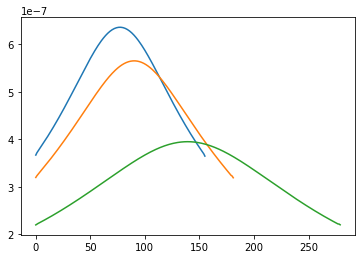

In [109]:
plot(sim.xcs[3].F_xc)
plot(sim.xcs[4].F_xc)
plot(sim.xcs[25].F_xc)
len(sim.xcs)

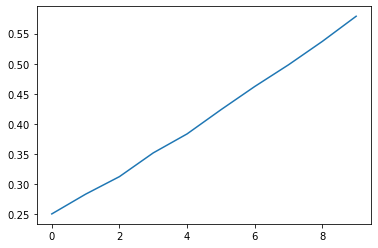

In [5]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr
total_dz = total_dz #- total_dz[0]
plot(total_dz)

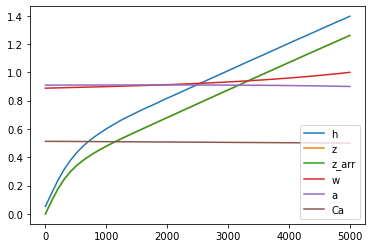

In [110]:
x = linspace(0,5000,n)
#z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])


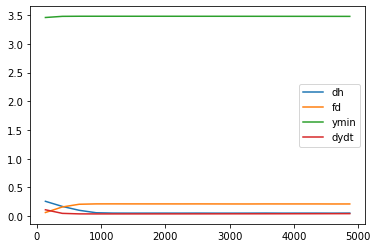

In [101]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

slopes= [0.00097658 0.00027617 0.0002066  0.00020018 0.00019972 0.00019968
 0.00019967 0.00019965 0.00019962 0.00019956 0.00019955 0.00019951
 0.00019944 0.00019937 0.00019929 0.00019919 0.00019909 0.00019895
 0.00019881]
eslopes= [0.0009807851801424336, 0.0006415803221389913, 0.00038518645413305883, 0.00022358916134555804, 0.00020102612061246623, 0.0001985476452449326, 0.0001990647788831888, 0.0001997068665381011, 0.00019854362909683203, 0.00020090326648677739, 0.00019776974655348292, 0.00019742542861774442, 0.0001987787973914807, 0.00020253237408913668, 0.00019825330669431576, 0.0001989709271733018, 0.000199430520388091, 0.0001962105830342532, 0.00020012777251155332]


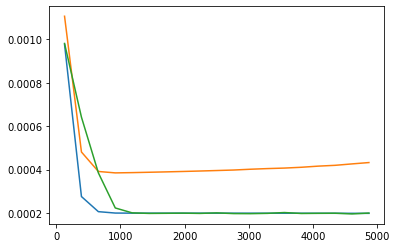

In [102]:
plot(xmid,sim.slopes)
print('slopes=',sim.slopes)
plot(xmid, abs(sim.dz))
#plot(xmid, sim.fd_mids/500)

T_bs = []
As = []
ws = []
eslopes = []
for i in arange(n-1):
    #T_bs.append(sim.xcs[i].calcT_b())
    As.append(sim.xcs[i].calcA(wantidx=sim.xcs[i].wetidx))
    L,R = sim.xcs[i].findLR(sim.fd_mids[i])
    ws.append(sim.xcs[i].x[R] - sim.xcs[i].x[L] )
    eslopes.append((sim.h[i+1] - sim.h[i])/sim.L_arr[i-1])
#plot(xmid,array(As)/200.)
#plot(xmid,array(ws)/400.)
plot(xmid,eslopes)
#ylim([0,0.002])
print('eslopes=',eslopes)

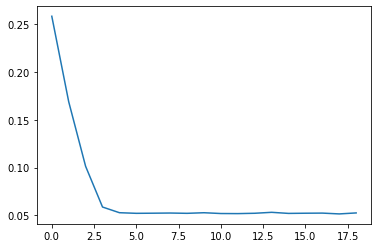

In [103]:
plot(sim.h[1:] - sim.h[:-1])


In [21]:
sim.flow_type

array(['norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm'], dtype=object)

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

Q residual for 0.19315045641282927  = 1.7963178997049134e-07
norm_fd= -0.3236516520186302
crit fd, y= -0.5117258612631144


0.05

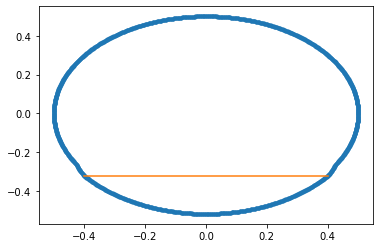

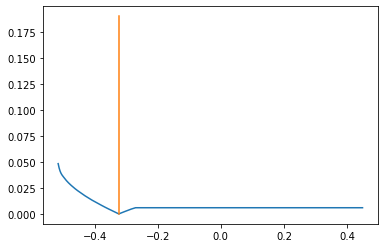

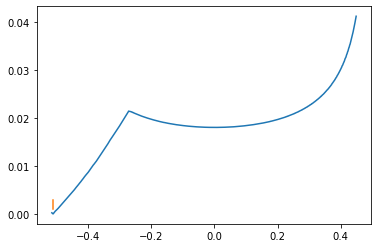

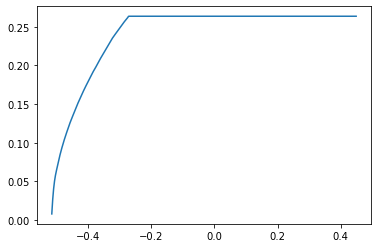

In [49]:
from scipy.signal import savgol_filter

i=4

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
#ylim([-1.4,-1.35])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.95,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
figure()
plot(fds+y.min(),res2)
crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
print('crit fd, y=',crit_fd_y)
plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)